# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [67]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [37]:
# Your code here!
df = pd.read_csv('GermanCredit.csv.zip')
print(df.describe())
#print(df.columns)
#df.head()

          Duration        Amount  InstallmentRatePercentage  \
count  1000.000000   1000.000000                1000.000000   
mean     20.903000   3271.258000                   2.973000   
std      12.058814   2822.736876                   1.118715   
min       4.000000    250.000000                   1.000000   
25%      12.000000   1365.500000                   2.000000   
50%      18.000000   2319.500000                   3.000000   
75%      24.000000   3972.250000                   4.000000   
max      72.000000  18424.000000                   4.000000   

       ResidenceDuration          Age  NumberExistingCredits  \
count        1000.000000  1000.000000            1000.000000   
mean            2.845000    35.546000               1.407000   
std             1.103718    11.375469               0.577654   
min             1.000000    19.000000               1.000000   
25%             2.000000    27.000000               1.000000   
50%             3.000000    33.000000           

In [61]:
df['Class'] = df['Class'].replace('Good',1)
df['Class'] = df['Class'].replace('Bad',0)
df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,1,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,0,1,0,0,1,0,0,1,0


1    700
0    300
Name: Class, dtype: int64


<AxesSubplot: xlabel='Class', ylabel='count'>

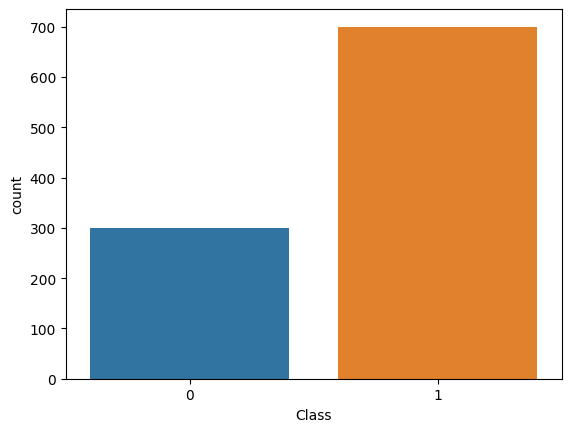

In [65]:
# Is this dataset unbalanced?
print(df['Class'].value_counts())
sns.countplot(x=df['Class'])

<AxesSubplot: ylabel='count'>

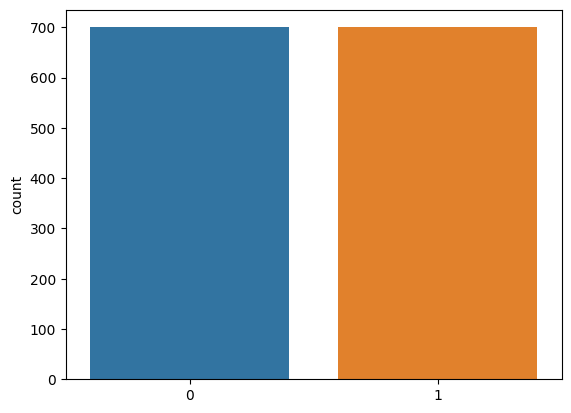

In [70]:
#use SMOTE to unbalance dataset
smote = SMOTE()

X = df.drop('Class',axis=1).values
y = df.Class.values

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

sns.countplot(x = y_smote)

In [71]:
# Split the data into a training and test set.
Xtrain, Xtest, ytrain, ytest = train_test_split(X_smote, y_smote, test_size=0.3, 
                                                random_state=11)

In [72]:
#quick benchmark model
clf = DecisionTreeClassifier().fit(Xtrain,ytrain)

print('Quick benchmark model: \n')
acc_train=clf.score(Xtrain, ytrain)
print('Accuracy on training samples:',acc_train,'\n')
acc_test=clf.score(Xtest, ytest)
print('Accuracy on testing samples:',acc_test,'\n')

#That's pretty bad. Let's see whether we can better that score

Quick benchmark model: 

Accuracy on training samples: 1.0 

Accuracy on testing samples: 0.7476190476190476 



In [73]:
dtc = DecisionTreeClassifier()
params = {'criterion':  ['gini','entropy','log_loss'],
          'splitter': ['best','random'], 
          'max_depth':[3,4,5,6,7,8],
          'min_samples_split': [2,3,4],
          'min_samples_leaf': [1,2,3,4,5]
         }
model = GridSearchCV(dtc, param_grid=params, cv=5, scoring="accuracy")
model.fit(Xtrain,ytrain)

print('Model using GridsearchCV \n')
print('Best params:', model.best_params_, '\n')
#print(model.best_score_)

acc_train=model.score(Xtrain, ytrain)
print('Accuracy on training samples:',acc_train,'\n')
acc_test=model.score(Xtest, ytest)
print('Accuracy on testing samples:',acc_test,'\n')

pd.DataFrame.from_dict(model.cv_results_)[['params','mean_test_score']].sort_values('mean_test_score', ascending=False)[0:5]

#This hasn't actually helped at all with performance

Model using GridsearchCV 

Best params: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'} 

Accuracy on training samples: 0.8540816326530613 

Accuracy on testing samples: 0.7452380952380953 



,params,mean_test_score
133,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.762245
176,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.757143
174,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.757143
295,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.756122
146,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.756122


In [74]:
best_tree = model.best_estimator_.fit(Xtrain,ytrain)

### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [42]:
#! pip install dtreeviz
# didn't work for some reason

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [43]:
# First let's visualize using sklearn, not good
#from sklearn.tree import plot_tree
#plot_tree(best_tree)

In [44]:
#viz = dtreeviz(best_tree, Xtrain, ytrain, 
#               target_name='Class', feature_names=df.drop('Class',axis=1).columns)

In [75]:
from sklearn import tree
from io import StringIO  
from IPython.display import Image  
import pydotplus

In [76]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(best_tree, out_file=dot_data, filled=True, rounded=True, 
                    special_characters=True, feature_names=df.drop('Class',axis=1).columns, 
                    class_names=["NO","YES"]) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png("best_tree.png")

True

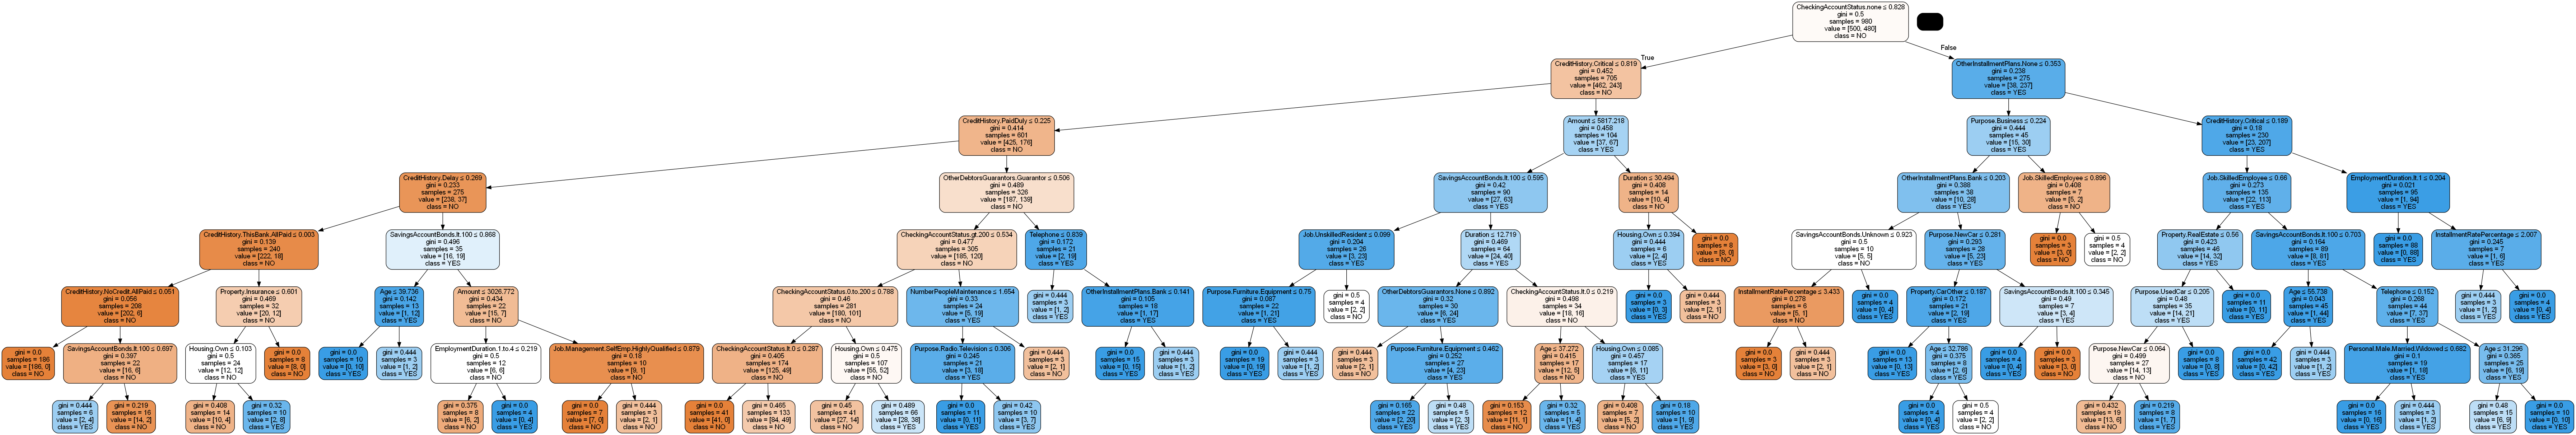

In [77]:
# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc = RandomForestClassifier(random_state=11)
param_grid = { 
    'n_estimators': [100,200,400],
    'max_depth' : [3,5,8,10],
    'criterion' :['gini', 'entropy','log_loss'],
    'min_samples_leaf': [1,2,4,6]
}

model_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
model_rfc.fit(Xtrain, ytrain)
print(model_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 400}


In [80]:
acc_train=model_rfc.score(Xtrain, ytrain)
print('Accuracy on training samples:',acc_train,'\n')
acc_test=model_rfc.score(Xtest, ytest)
print('Accuracy on testing samples:',acc_test,'\n')

Accuracy on training samples: 0.9897959183673469 

Accuracy on testing samples: 0.8047619047619048 



As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

In [81]:
#your code
import numpy as np
best_rfc_model = model_rfc.best_estimator_.fit(Xtrain,ytrain)
#len=61
importances = best_rfc_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rfc_model.estimators_], axis=0)

In [82]:
feature_names = df.drop('Class',axis=1).columns
forest_importances = pd.Series(importances, index=feature_names)
forest_importances_sorted = forest_importances.sort_values(ascending=False)
print(forest_importances_sorted)

CheckingAccountStatus.none    0.110370
Amount                        0.073546
Duration                      0.070650
Age                           0.053338
CreditHistory.Critical        0.043643
                                ...   
Purpose.Retraining            0.001325
Purpose.Other                 0.000977
Purpose.DomesticAppliance     0.000893
Purpose.Vacation              0.000000
Personal.Female.Single        0.000000
Length: 61, dtype: float64


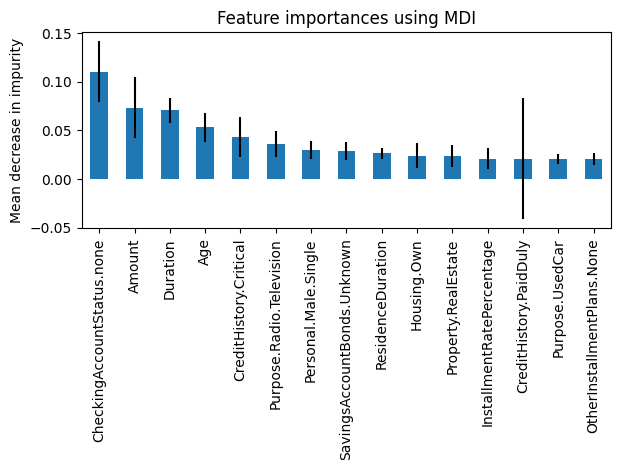

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots()
forest_importances_sorted[0:15].plot.bar(yerr=std[0:15], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [ ]:
#! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [ ]:
# Your code here!

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [ ]:
#! conda install -c anaconda py-xgboost

In [38]:
#! conda install -c conda-forge catboost

^C


In [ ]:
#! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [84]:
#! pip install xgboost

In [85]:
#! pip install catboost

In [86]:
#! pip install lightgbm

In [102]:
from xgboost import XGBClassifier

#xgboost_classifier = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic',random_state=0)
# fit model
#xgboost_classifier.fit(Xtrain, ytrain)
# make predictions
#y_test = xgboost_classifier.predict(X_test)

xgboost_classifier = XGBClassifier(random_state=0)
param_grid = { 
    'n_estimators': [20,50,100,200],
    'max_depth' : [3,5,8,10,15,20],
    'learning_rate' :[0.01, 0.1,1],
}

model_xgboost = GridSearchCV(estimator=xgboost_classifier, param_grid=param_grid, cv= 5)
model_xgboost.fit(Xtrain, ytrain)
print(model_xgboost.best_params_)

{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}


In [103]:
xgboost_acc_train=model_xgboost.score(Xtrain, ytrain)
print('xgboost accuracy on training samples:',xgboost_acc_train,'\n')
xgboost_acc_test=model_xgboost.score(Xtest, ytest)
print('xgboost accuracy on testing samples:',xgboost_acc_test,'\n')

xgboost accuracy on training samples: 1.0 

xgboost accuracy on testing samples: 0.8071428571428572 



In [109]:
from catboost import CatBoostClassifier

catboost_classifier = CatBoostClassifier(random_state=0)
param_grid = { 
    #'iterations': [50,100],
    'depth' : [5,10,15],
    'learning_rate' :[0.1, 1],
}

model_catboost = GridSearchCV(estimator=catboost_classifier, param_grid=param_grid, cv= 5)
model_catboost.fit(Xtrain, ytrain)
print(model_catboost.best_params_)

0:	learn: 0.6520792	total: 3.79ms	remaining: 3.78s
1:	learn: 0.6169473	total: 7.66ms	remaining: 3.82s
2:	learn: 0.5866347	total: 10.4ms	remaining: 3.47s
3:	learn: 0.5632790	total: 12.4ms	remaining: 3.1s
4:	learn: 0.5414371	total: 14.6ms	remaining: 2.91s
5:	learn: 0.5307919	total: 17.1ms	remaining: 2.84s
6:	learn: 0.5116754	total: 20.2ms	remaining: 2.87s
7:	learn: 0.4967390	total: 22.9ms	remaining: 2.83s
8:	learn: 0.4834905	total: 25.1ms	remaining: 2.77s
9:	learn: 0.4681952	total: 28.3ms	remaining: 2.8s
10:	learn: 0.4570864	total: 31.3ms	remaining: 2.81s
11:	learn: 0.4465752	total: 33.6ms	remaining: 2.77s
12:	learn: 0.4407388	total: 36.9ms	remaining: 2.8s
13:	learn: 0.4338516	total: 39.5ms	remaining: 2.78s
14:	learn: 0.4260828	total: 41.9ms	remaining: 2.75s
15:	learn: 0.4161626	total: 44.1ms	remaining: 2.71s
16:	learn: 0.4089760	total: 47.6ms	remaining: 2.75s
17:	learn: 0.4041459	total: 51.1ms	remaining: 2.79s
18:	learn: 0.3933702	total: 54.4ms	remaining: 2.81s
19:	learn: 0.3869773	tota

175:	learn: 0.0868782	total: 396ms	remaining: 1.85s
176:	learn: 0.0861592	total: 399ms	remaining: 1.85s
177:	learn: 0.0855243	total: 402ms	remaining: 1.85s
178:	learn: 0.0850767	total: 405ms	remaining: 1.86s
179:	learn: 0.0840836	total: 408ms	remaining: 1.86s
180:	learn: 0.0834875	total: 411ms	remaining: 1.86s
181:	learn: 0.0827347	total: 414ms	remaining: 1.86s
182:	learn: 0.0823815	total: 416ms	remaining: 1.86s
183:	learn: 0.0817130	total: 419ms	remaining: 1.86s
184:	learn: 0.0809544	total: 422ms	remaining: 1.86s
185:	learn: 0.0804103	total: 424ms	remaining: 1.85s
186:	learn: 0.0801640	total: 427ms	remaining: 1.85s
187:	learn: 0.0794736	total: 430ms	remaining: 1.85s
188:	learn: 0.0785444	total: 432ms	remaining: 1.85s
189:	learn: 0.0779206	total: 434ms	remaining: 1.85s
190:	learn: 0.0772486	total: 437ms	remaining: 1.85s
191:	learn: 0.0768768	total: 439ms	remaining: 1.85s
192:	learn: 0.0761932	total: 442ms	remaining: 1.85s
193:	learn: 0.0758964	total: 444ms	remaining: 1.84s
194:	learn: 

379:	learn: 0.0263904	total: 1s	remaining: 1.64s
380:	learn: 0.0262679	total: 1s	remaining: 1.63s
381:	learn: 0.0261284	total: 1.01s	remaining: 1.63s
382:	learn: 0.0260172	total: 1.01s	remaining: 1.63s
383:	learn: 0.0257814	total: 1.02s	remaining: 1.63s
384:	learn: 0.0256942	total: 1.02s	remaining: 1.63s
385:	learn: 0.0256092	total: 1.02s	remaining: 1.63s
386:	learn: 0.0254661	total: 1.03s	remaining: 1.63s
387:	learn: 0.0253549	total: 1.03s	remaining: 1.62s
388:	learn: 0.0252036	total: 1.03s	remaining: 1.62s
389:	learn: 0.0251234	total: 1.03s	remaining: 1.62s
390:	learn: 0.0249875	total: 1.04s	remaining: 1.61s
391:	learn: 0.0249495	total: 1.04s	remaining: 1.61s
392:	learn: 0.0248691	total: 1.04s	remaining: 1.61s
393:	learn: 0.0247084	total: 1.04s	remaining: 1.6s
394:	learn: 0.0245979	total: 1.04s	remaining: 1.6s
395:	learn: 0.0244318	total: 1.05s	remaining: 1.6s
396:	learn: 0.0242951	total: 1.05s	remaining: 1.59s
397:	learn: 0.0242775	total: 1.05s	remaining: 1.59s
398:	learn: 0.0242055

579:	learn: 0.0131861	total: 1.82s	remaining: 1.32s
580:	learn: 0.0131662	total: 1.82s	remaining: 1.31s
581:	learn: 0.0131216	total: 1.82s	remaining: 1.31s
582:	learn: 0.0131055	total: 1.83s	remaining: 1.31s
583:	learn: 0.0130713	total: 1.83s	remaining: 1.3s
584:	learn: 0.0129990	total: 1.83s	remaining: 1.3s
585:	learn: 0.0129632	total: 1.84s	remaining: 1.3s
586:	learn: 0.0129125	total: 1.84s	remaining: 1.29s
587:	learn: 0.0128707	total: 1.84s	remaining: 1.29s
588:	learn: 0.0128421	total: 1.85s	remaining: 1.29s
589:	learn: 0.0128305	total: 1.85s	remaining: 1.28s
590:	learn: 0.0127983	total: 1.85s	remaining: 1.28s
591:	learn: 0.0127752	total: 1.85s	remaining: 1.28s
592:	learn: 0.0127594	total: 1.86s	remaining: 1.27s
593:	learn: 0.0127125	total: 1.86s	remaining: 1.27s
594:	learn: 0.0126768	total: 1.86s	remaining: 1.27s
595:	learn: 0.0126380	total: 1.86s	remaining: 1.26s
596:	learn: 0.0126019	total: 1.87s	remaining: 1.26s
597:	learn: 0.0125732	total: 1.87s	remaining: 1.26s
598:	learn: 0.0

763:	learn: 0.0086476	total: 2.21s	remaining: 682ms
764:	learn: 0.0086476	total: 2.21s	remaining: 679ms
765:	learn: 0.0086314	total: 2.21s	remaining: 676ms
766:	learn: 0.0086025	total: 2.21s	remaining: 673ms
767:	learn: 0.0086025	total: 2.22s	remaining: 670ms
768:	learn: 0.0085955	total: 2.22s	remaining: 667ms
769:	learn: 0.0085850	total: 2.22s	remaining: 664ms
770:	learn: 0.0085850	total: 2.22s	remaining: 661ms
771:	learn: 0.0085566	total: 2.23s	remaining: 657ms
772:	learn: 0.0085566	total: 2.23s	remaining: 654ms
773:	learn: 0.0085444	total: 2.23s	remaining: 651ms
774:	learn: 0.0085401	total: 2.23s	remaining: 648ms
775:	learn: 0.0085401	total: 2.23s	remaining: 645ms
776:	learn: 0.0085400	total: 2.23s	remaining: 642ms
777:	learn: 0.0085272	total: 2.24s	remaining: 639ms
778:	learn: 0.0085272	total: 2.24s	remaining: 635ms
779:	learn: 0.0085101	total: 2.24s	remaining: 632ms
780:	learn: 0.0084896	total: 2.24s	remaining: 629ms
781:	learn: 0.0084651	total: 2.25s	remaining: 626ms
782:	learn: 

954:	learn: 0.0071478	total: 2.8s	remaining: 132ms
955:	learn: 0.0071478	total: 2.81s	remaining: 129ms
956:	learn: 0.0071478	total: 2.81s	remaining: 126ms
957:	learn: 0.0071378	total: 2.82s	remaining: 123ms
958:	learn: 0.0071378	total: 2.82s	remaining: 121ms
959:	learn: 0.0071378	total: 2.83s	remaining: 118ms
960:	learn: 0.0071378	total: 2.83s	remaining: 115ms
961:	learn: 0.0071377	total: 2.83s	remaining: 112ms
962:	learn: 0.0071252	total: 2.84s	remaining: 109ms
963:	learn: 0.0071252	total: 2.84s	remaining: 106ms
964:	learn: 0.0071251	total: 2.85s	remaining: 103ms
965:	learn: 0.0071123	total: 2.85s	remaining: 100ms
966:	learn: 0.0071123	total: 2.85s	remaining: 97.4ms
967:	learn: 0.0071123	total: 2.86s	remaining: 94.5ms
968:	learn: 0.0071123	total: 2.86s	remaining: 91.6ms
969:	learn: 0.0071035	total: 2.87s	remaining: 88.6ms
970:	learn: 0.0071033	total: 2.87s	remaining: 85.7ms
971:	learn: 0.0071034	total: 2.87s	remaining: 82.7ms
972:	learn: 0.0070860	total: 2.88s	remaining: 79.8ms
973:	l

152:	learn: 0.1007557	total: 596ms	remaining: 3.3s
153:	learn: 0.0998487	total: 602ms	remaining: 3.31s
154:	learn: 0.0989762	total: 607ms	remaining: 3.31s
155:	learn: 0.0982569	total: 611ms	remaining: 3.3s
156:	learn: 0.0977268	total: 615ms	remaining: 3.3s
157:	learn: 0.0971133	total: 618ms	remaining: 3.29s
158:	learn: 0.0962724	total: 627ms	remaining: 3.32s
159:	learn: 0.0954690	total: 631ms	remaining: 3.31s
160:	learn: 0.0948594	total: 639ms	remaining: 3.33s
161:	learn: 0.0943894	total: 642ms	remaining: 3.32s
162:	learn: 0.0937655	total: 644ms	remaining: 3.31s
163:	learn: 0.0926463	total: 647ms	remaining: 3.3s
164:	learn: 0.0922119	total: 649ms	remaining: 3.28s
165:	learn: 0.0915367	total: 652ms	remaining: 3.27s
166:	learn: 0.0907189	total: 655ms	remaining: 3.27s
167:	learn: 0.0901828	total: 658ms	remaining: 3.26s
168:	learn: 0.0894540	total: 660ms	remaining: 3.25s
169:	learn: 0.0885239	total: 663ms	remaining: 3.24s
170:	learn: 0.0879424	total: 667ms	remaining: 3.23s
171:	learn: 0.08

329:	learn: 0.0321945	total: 992ms	remaining: 2.01s
330:	learn: 0.0320617	total: 995ms	remaining: 2.01s
331:	learn: 0.0318818	total: 997ms	remaining: 2s
332:	learn: 0.0316549	total: 999ms	remaining: 2s
333:	learn: 0.0315450	total: 1s	remaining: 2s
334:	learn: 0.0313364	total: 1s	remaining: 1.99s
335:	learn: 0.0311050	total: 1s	remaining: 1.99s
336:	learn: 0.0309056	total: 1.01s	remaining: 1.98s
337:	learn: 0.0307717	total: 1.01s	remaining: 1.98s
338:	learn: 0.0306534	total: 1.01s	remaining: 1.97s
339:	learn: 0.0304488	total: 1.01s	remaining: 1.97s
340:	learn: 0.0303343	total: 1.01s	remaining: 1.96s
341:	learn: 0.0302470	total: 1.02s	remaining: 1.96s
342:	learn: 0.0301821	total: 1.02s	remaining: 1.95s
343:	learn: 0.0300841	total: 1.02s	remaining: 1.95s
344:	learn: 0.0299613	total: 1.02s	remaining: 1.94s
345:	learn: 0.0297208	total: 1.02s	remaining: 1.94s
346:	learn: 0.0296332	total: 1.03s	remaining: 1.93s
347:	learn: 0.0294629	total: 1.03s	remaining: 1.93s
348:	learn: 0.0294189	total: 1

529:	learn: 0.0148858	total: 1.38s	remaining: 1.22s
530:	learn: 0.0148494	total: 1.38s	remaining: 1.22s
531:	learn: 0.0147958	total: 1.38s	remaining: 1.21s
532:	learn: 0.0147717	total: 1.38s	remaining: 1.21s
533:	learn: 0.0147208	total: 1.38s	remaining: 1.21s
534:	learn: 0.0146820	total: 1.39s	remaining: 1.21s
535:	learn: 0.0146245	total: 1.39s	remaining: 1.2s
536:	learn: 0.0145694	total: 1.39s	remaining: 1.2s
537:	learn: 0.0145105	total: 1.39s	remaining: 1.2s
538:	learn: 0.0144689	total: 1.39s	remaining: 1.19s
539:	learn: 0.0144093	total: 1.4s	remaining: 1.19s
540:	learn: 0.0143839	total: 1.4s	remaining: 1.19s
541:	learn: 0.0143670	total: 1.4s	remaining: 1.18s
542:	learn: 0.0143556	total: 1.4s	remaining: 1.18s
543:	learn: 0.0142989	total: 1.4s	remaining: 1.18s
544:	learn: 0.0142180	total: 1.41s	remaining: 1.17s
545:	learn: 0.0141726	total: 1.41s	remaining: 1.17s
546:	learn: 0.0141491	total: 1.41s	remaining: 1.17s
547:	learn: 0.0140999	total: 1.41s	remaining: 1.16s
548:	learn: 0.014072

747:	learn: 0.0089473	total: 1.77s	remaining: 597ms
748:	learn: 0.0089252	total: 1.77s	remaining: 595ms
749:	learn: 0.0089085	total: 1.78s	remaining: 592ms
750:	learn: 0.0089085	total: 1.78s	remaining: 590ms
751:	learn: 0.0088826	total: 1.78s	remaining: 587ms
752:	learn: 0.0088803	total: 1.78s	remaining: 585ms
753:	learn: 0.0088646	total: 1.78s	remaining: 582ms
754:	learn: 0.0088527	total: 1.78s	remaining: 579ms
755:	learn: 0.0088288	total: 1.79s	remaining: 577ms
756:	learn: 0.0088008	total: 1.79s	remaining: 574ms
757:	learn: 0.0087913	total: 1.79s	remaining: 572ms
758:	learn: 0.0087665	total: 1.79s	remaining: 569ms
759:	learn: 0.0087664	total: 1.79s	remaining: 567ms
760:	learn: 0.0087521	total: 1.8s	remaining: 564ms
761:	learn: 0.0087299	total: 1.8s	remaining: 562ms
762:	learn: 0.0087009	total: 1.8s	remaining: 559ms
763:	learn: 0.0086774	total: 1.8s	remaining: 557ms
764:	learn: 0.0086531	total: 1.8s	remaining: 554ms
765:	learn: 0.0086344	total: 1.81s	remaining: 552ms
766:	learn: 0.008

949:	learn: 0.0069073	total: 2.35s	remaining: 124ms
950:	learn: 0.0069073	total: 2.36s	remaining: 122ms
951:	learn: 0.0069073	total: 2.36s	remaining: 119ms
952:	learn: 0.0069072	total: 2.37s	remaining: 117ms
953:	learn: 0.0069036	total: 2.37s	remaining: 114ms
954:	learn: 0.0069035	total: 2.37s	remaining: 112ms
955:	learn: 0.0069035	total: 2.38s	remaining: 109ms
956:	learn: 0.0069035	total: 2.38s	remaining: 107ms
957:	learn: 0.0069036	total: 2.38s	remaining: 104ms
958:	learn: 0.0068901	total: 2.38s	remaining: 102ms
959:	learn: 0.0068901	total: 2.39s	remaining: 99.4ms
960:	learn: 0.0068901	total: 2.39s	remaining: 96.9ms
961:	learn: 0.0068901	total: 2.39s	remaining: 94.5ms
962:	learn: 0.0068901	total: 2.39s	remaining: 92ms
963:	learn: 0.0068901	total: 2.4s	remaining: 89.5ms
964:	learn: 0.0068901	total: 2.4s	remaining: 87ms
965:	learn: 0.0068825	total: 2.4s	remaining: 84.5ms
966:	learn: 0.0068824	total: 2.4s	remaining: 82ms
967:	learn: 0.0068825	total: 2.41s	remaining: 79.5ms
968:	learn: 0

150:	learn: 0.1067619	total: 619ms	remaining: 3.48s
151:	learn: 0.1056589	total: 623ms	remaining: 3.48s
152:	learn: 0.1048358	total: 627ms	remaining: 3.47s
153:	learn: 0.1040423	total: 633ms	remaining: 3.48s
154:	learn: 0.1032727	total: 637ms	remaining: 3.47s
155:	learn: 0.1024248	total: 641ms	remaining: 3.47s
156:	learn: 0.1016673	total: 645ms	remaining: 3.46s
157:	learn: 0.1004307	total: 650ms	remaining: 3.46s
158:	learn: 0.0994913	total: 654ms	remaining: 3.46s
159:	learn: 0.0985929	total: 658ms	remaining: 3.45s
160:	learn: 0.0976080	total: 662ms	remaining: 3.45s
161:	learn: 0.0967673	total: 666ms	remaining: 3.45s
162:	learn: 0.0964385	total: 670ms	remaining: 3.44s
163:	learn: 0.0958099	total: 674ms	remaining: 3.44s
164:	learn: 0.0948613	total: 679ms	remaining: 3.43s
165:	learn: 0.0943582	total: 684ms	remaining: 3.44s
166:	learn: 0.0939489	total: 688ms	remaining: 3.43s
167:	learn: 0.0932960	total: 693ms	remaining: 3.43s
168:	learn: 0.0924913	total: 698ms	remaining: 3.43s
169:	learn: 

342:	learn: 0.0329835	total: 1.24s	remaining: 2.37s
343:	learn: 0.0328185	total: 1.24s	remaining: 2.36s
344:	learn: 0.0326321	total: 1.24s	remaining: 2.36s
345:	learn: 0.0324571	total: 1.24s	remaining: 2.35s
346:	learn: 0.0323652	total: 1.24s	remaining: 2.34s
347:	learn: 0.0322055	total: 1.25s	remaining: 2.33s
348:	learn: 0.0320541	total: 1.25s	remaining: 2.33s
349:	learn: 0.0319490	total: 1.25s	remaining: 2.32s
350:	learn: 0.0318252	total: 1.25s	remaining: 2.31s
351:	learn: 0.0316786	total: 1.25s	remaining: 2.31s
352:	learn: 0.0314497	total: 1.25s	remaining: 2.3s
353:	learn: 0.0313195	total: 1.26s	remaining: 2.29s
354:	learn: 0.0311821	total: 1.26s	remaining: 2.29s
355:	learn: 0.0309950	total: 1.26s	remaining: 2.28s
356:	learn: 0.0308821	total: 1.26s	remaining: 2.27s
357:	learn: 0.0307005	total: 1.26s	remaining: 2.27s
358:	learn: 0.0305366	total: 1.27s	remaining: 2.26s
359:	learn: 0.0304064	total: 1.27s	remaining: 2.26s
360:	learn: 0.0302975	total: 1.27s	remaining: 2.25s
361:	learn: 0

547:	learn: 0.0153841	total: 1.63s	remaining: 1.34s
548:	learn: 0.0153168	total: 1.63s	remaining: 1.34s
549:	learn: 0.0152719	total: 1.63s	remaining: 1.33s
550:	learn: 0.0152519	total: 1.63s	remaining: 1.33s
551:	learn: 0.0152073	total: 1.64s	remaining: 1.33s
552:	learn: 0.0151682	total: 1.64s	remaining: 1.32s
553:	learn: 0.0151431	total: 1.64s	remaining: 1.32s
554:	learn: 0.0151114	total: 1.64s	remaining: 1.32s
555:	learn: 0.0150681	total: 1.64s	remaining: 1.31s
556:	learn: 0.0150336	total: 1.65s	remaining: 1.31s
557:	learn: 0.0149906	total: 1.65s	remaining: 1.3s
558:	learn: 0.0149213	total: 1.65s	remaining: 1.3s
559:	learn: 0.0148561	total: 1.65s	remaining: 1.3s
560:	learn: 0.0148016	total: 1.65s	remaining: 1.29s
561:	learn: 0.0147750	total: 1.66s	remaining: 1.29s
562:	learn: 0.0147415	total: 1.66s	remaining: 1.29s
563:	learn: 0.0146923	total: 1.66s	remaining: 1.28s
564:	learn: 0.0146323	total: 1.66s	remaining: 1.28s
565:	learn: 0.0145826	total: 1.66s	remaining: 1.28s
566:	learn: 0.0

745:	learn: 0.0092027	total: 2.23s	remaining: 761ms
746:	learn: 0.0092025	total: 2.24s	remaining: 758ms
747:	learn: 0.0091772	total: 2.24s	remaining: 756ms
748:	learn: 0.0091773	total: 2.25s	remaining: 753ms
749:	learn: 0.0091550	total: 2.25s	remaining: 750ms
750:	learn: 0.0091364	total: 2.25s	remaining: 748ms
751:	learn: 0.0091190	total: 2.26s	remaining: 745ms
752:	learn: 0.0090964	total: 2.26s	remaining: 743ms
753:	learn: 0.0090786	total: 2.27s	remaining: 740ms
754:	learn: 0.0090787	total: 2.27s	remaining: 737ms
755:	learn: 0.0090687	total: 2.27s	remaining: 734ms
756:	learn: 0.0090464	total: 2.28s	remaining: 732ms
757:	learn: 0.0090402	total: 2.28s	remaining: 729ms
758:	learn: 0.0090182	total: 2.29s	remaining: 727ms
759:	learn: 0.0089952	total: 2.29s	remaining: 724ms
760:	learn: 0.0089788	total: 2.3s	remaining: 721ms
761:	learn: 0.0089787	total: 2.3s	remaining: 719ms
762:	learn: 0.0089631	total: 2.31s	remaining: 716ms
763:	learn: 0.0089484	total: 2.31s	remaining: 714ms
764:	learn: 0.

928:	learn: 0.0068946	total: 3.04s	remaining: 232ms
929:	learn: 0.0068946	total: 3.04s	remaining: 229ms
930:	learn: 0.0068821	total: 3.04s	remaining: 226ms
931:	learn: 0.0068821	total: 3.05s	remaining: 223ms
932:	learn: 0.0068821	total: 3.05s	remaining: 219ms
933:	learn: 0.0068731	total: 3.06s	remaining: 216ms
934:	learn: 0.0068731	total: 3.06s	remaining: 213ms
935:	learn: 0.0068645	total: 3.07s	remaining: 210ms
936:	learn: 0.0068496	total: 3.07s	remaining: 207ms
937:	learn: 0.0068207	total: 3.08s	remaining: 204ms
938:	learn: 0.0068207	total: 3.08s	remaining: 200ms
939:	learn: 0.0068206	total: 3.09s	remaining: 197ms
940:	learn: 0.0068082	total: 3.09s	remaining: 194ms
941:	learn: 0.0067961	total: 3.1s	remaining: 191ms
942:	learn: 0.0067835	total: 3.1s	remaining: 187ms
943:	learn: 0.0067835	total: 3.1s	remaining: 184ms
944:	learn: 0.0067772	total: 3.11s	remaining: 181ms
945:	learn: 0.0067593	total: 3.11s	remaining: 178ms
946:	learn: 0.0067593	total: 3.12s	remaining: 175ms
947:	learn: 0.0

88:	learn: 0.1808157	total: 410ms	remaining: 4.2s
89:	learn: 0.1788109	total: 415ms	remaining: 4.2s
90:	learn: 0.1773987	total: 419ms	remaining: 4.19s
91:	learn: 0.1757878	total: 424ms	remaining: 4.18s
92:	learn: 0.1735356	total: 428ms	remaining: 4.18s
93:	learn: 0.1732490	total: 433ms	remaining: 4.17s
94:	learn: 0.1713826	total: 438ms	remaining: 4.17s
95:	learn: 0.1699155	total: 443ms	remaining: 4.17s
96:	learn: 0.1685946	total: 447ms	remaining: 4.16s
97:	learn: 0.1667568	total: 451ms	remaining: 4.15s
98:	learn: 0.1651507	total: 455ms	remaining: 4.14s
99:	learn: 0.1633177	total: 460ms	remaining: 4.14s
100:	learn: 0.1616375	total: 464ms	remaining: 4.13s
101:	learn: 0.1601155	total: 468ms	remaining: 4.12s
102:	learn: 0.1576226	total: 472ms	remaining: 4.11s
103:	learn: 0.1556802	total: 476ms	remaining: 4.1s
104:	learn: 0.1538630	total: 480ms	remaining: 4.09s
105:	learn: 0.1519355	total: 484ms	remaining: 4.08s
106:	learn: 0.1504218	total: 489ms	remaining: 4.08s
107:	learn: 0.1484506	total

301:	learn: 0.0352203	total: 1.01s	remaining: 2.33s
302:	learn: 0.0352172	total: 1.01s	remaining: 2.32s
303:	learn: 0.0350868	total: 1.01s	remaining: 2.31s
304:	learn: 0.0348769	total: 1.01s	remaining: 2.31s
305:	learn: 0.0347353	total: 1.01s	remaining: 2.3s
306:	learn: 0.0345813	total: 1.02s	remaining: 2.29s
307:	learn: 0.0343993	total: 1.02s	remaining: 2.29s
308:	learn: 0.0342755	total: 1.02s	remaining: 2.28s
309:	learn: 0.0341168	total: 1.02s	remaining: 2.27s
310:	learn: 0.0338739	total: 1.02s	remaining: 2.27s
311:	learn: 0.0336135	total: 1.02s	remaining: 2.26s
312:	learn: 0.0335533	total: 1.03s	remaining: 2.25s
313:	learn: 0.0333672	total: 1.03s	remaining: 2.25s
314:	learn: 0.0331590	total: 1.03s	remaining: 2.24s
315:	learn: 0.0329871	total: 1.03s	remaining: 2.23s
316:	learn: 0.0327880	total: 1.03s	remaining: 2.23s
317:	learn: 0.0324545	total: 1.04s	remaining: 2.22s
318:	learn: 0.0323506	total: 1.04s	remaining: 2.21s
319:	learn: 0.0322368	total: 1.04s	remaining: 2.21s
320:	learn: 0

516:	learn: 0.0144231	total: 1.39s	remaining: 1.3s
517:	learn: 0.0143970	total: 1.4s	remaining: 1.3s
518:	learn: 0.0143849	total: 1.4s	remaining: 1.29s
519:	learn: 0.0143374	total: 1.4s	remaining: 1.29s
520:	learn: 0.0142829	total: 1.4s	remaining: 1.29s
521:	learn: 0.0142611	total: 1.4s	remaining: 1.28s
522:	learn: 0.0142127	total: 1.41s	remaining: 1.28s
523:	learn: 0.0141371	total: 1.41s	remaining: 1.28s
524:	learn: 0.0141140	total: 1.41s	remaining: 1.27s
525:	learn: 0.0140727	total: 1.41s	remaining: 1.27s
526:	learn: 0.0140401	total: 1.41s	remaining: 1.27s
527:	learn: 0.0140090	total: 1.41s	remaining: 1.26s
528:	learn: 0.0139757	total: 1.42s	remaining: 1.26s
529:	learn: 0.0139490	total: 1.42s	remaining: 1.26s
530:	learn: 0.0138995	total: 1.42s	remaining: 1.25s
531:	learn: 0.0138614	total: 1.42s	remaining: 1.25s
532:	learn: 0.0138272	total: 1.42s	remaining: 1.25s
533:	learn: 0.0137922	total: 1.43s	remaining: 1.24s
534:	learn: 0.0137750	total: 1.43s	remaining: 1.24s
535:	learn: 0.01372

714:	learn: 0.0087526	total: 1.78s	remaining: 710ms
715:	learn: 0.0087432	total: 1.78s	remaining: 708ms
716:	learn: 0.0087259	total: 1.79s	remaining: 705ms
717:	learn: 0.0087150	total: 1.79s	remaining: 702ms
718:	learn: 0.0086800	total: 1.79s	remaining: 700ms
719:	learn: 0.0086663	total: 1.79s	remaining: 697ms
720:	learn: 0.0086516	total: 1.79s	remaining: 694ms
721:	learn: 0.0086398	total: 1.79s	remaining: 691ms
722:	learn: 0.0086254	total: 1.8s	remaining: 689ms
723:	learn: 0.0086031	total: 1.8s	remaining: 686ms
724:	learn: 0.0085894	total: 1.8s	remaining: 683ms
725:	learn: 0.0085635	total: 1.8s	remaining: 680ms
726:	learn: 0.0085463	total: 1.8s	remaining: 678ms
727:	learn: 0.0085272	total: 1.81s	remaining: 675ms
728:	learn: 0.0085057	total: 1.81s	remaining: 673ms
729:	learn: 0.0084768	total: 1.81s	remaining: 670ms
730:	learn: 0.0084668	total: 1.81s	remaining: 667ms
731:	learn: 0.0084626	total: 1.81s	remaining: 664ms
732:	learn: 0.0084593	total: 1.82s	remaining: 662ms
733:	learn: 0.008

890:	learn: 0.0065830	total: 2.18s	remaining: 267ms
891:	learn: 0.0065762	total: 2.19s	remaining: 265ms
892:	learn: 0.0065650	total: 2.19s	remaining: 262ms
893:	learn: 0.0065493	total: 2.19s	remaining: 260ms
894:	learn: 0.0065355	total: 2.2s	remaining: 258ms
895:	learn: 0.0065231	total: 2.2s	remaining: 256ms
896:	learn: 0.0065081	total: 2.21s	remaining: 253ms
897:	learn: 0.0064985	total: 2.21s	remaining: 251ms
898:	learn: 0.0064909	total: 2.21s	remaining: 249ms
899:	learn: 0.0064908	total: 2.22s	remaining: 247ms
900:	learn: 0.0064890	total: 2.23s	remaining: 245ms
901:	learn: 0.0064722	total: 2.23s	remaining: 242ms
902:	learn: 0.0064722	total: 2.23s	remaining: 240ms
903:	learn: 0.0064475	total: 2.24s	remaining: 238ms
904:	learn: 0.0064411	total: 2.24s	remaining: 235ms
905:	learn: 0.0064411	total: 2.25s	remaining: 233ms
906:	learn: 0.0064411	total: 2.25s	remaining: 231ms
907:	learn: 0.0064411	total: 2.25s	remaining: 228ms
908:	learn: 0.0064411	total: 2.26s	remaining: 226ms
909:	learn: 0.

88:	learn: 0.1889360	total: 400ms	remaining: 4.09s
89:	learn: 0.1868052	total: 406ms	remaining: 4.11s
90:	learn: 0.1846012	total: 411ms	remaining: 4.1s
91:	learn: 0.1823414	total: 415ms	remaining: 4.09s
92:	learn: 0.1805814	total: 419ms	remaining: 4.09s
93:	learn: 0.1792828	total: 424ms	remaining: 4.09s
94:	learn: 0.1775934	total: 429ms	remaining: 4.08s
95:	learn: 0.1753884	total: 433ms	remaining: 4.08s
96:	learn: 0.1740510	total: 437ms	remaining: 4.07s
97:	learn: 0.1723284	total: 441ms	remaining: 4.06s
98:	learn: 0.1707787	total: 446ms	remaining: 4.06s
99:	learn: 0.1693722	total: 451ms	remaining: 4.06s
100:	learn: 0.1679431	total: 456ms	remaining: 4.05s
101:	learn: 0.1662319	total: 460ms	remaining: 4.04s
102:	learn: 0.1648653	total: 464ms	remaining: 4.04s
103:	learn: 0.1640984	total: 467ms	remaining: 4.03s
104:	learn: 0.1619908	total: 472ms	remaining: 4.03s
105:	learn: 0.1605770	total: 477ms	remaining: 4.02s
106:	learn: 0.1585930	total: 480ms	remaining: 4.01s
107:	learn: 0.1572447	tot

265:	learn: 0.0481051	total: 1.19s	remaining: 3.27s
266:	learn: 0.0476531	total: 1.19s	remaining: 3.27s
267:	learn: 0.0473792	total: 1.2s	remaining: 3.27s
268:	learn: 0.0471151	total: 1.2s	remaining: 3.26s
269:	learn: 0.0468533	total: 1.2s	remaining: 3.26s
270:	learn: 0.0465496	total: 1.21s	remaining: 3.25s
271:	learn: 0.0462624	total: 1.21s	remaining: 3.25s
272:	learn: 0.0460050	total: 1.22s	remaining: 3.24s
273:	learn: 0.0457946	total: 1.22s	remaining: 3.24s
274:	learn: 0.0453702	total: 1.23s	remaining: 3.23s
275:	learn: 0.0450760	total: 1.23s	remaining: 3.23s
276:	learn: 0.0447293	total: 1.24s	remaining: 3.23s
277:	learn: 0.0445490	total: 1.24s	remaining: 3.22s
278:	learn: 0.0443433	total: 1.24s	remaining: 3.21s
279:	learn: 0.0438652	total: 1.25s	remaining: 3.21s
280:	learn: 0.0434726	total: 1.25s	remaining: 3.2s
281:	learn: 0.0431875	total: 1.25s	remaining: 3.19s
282:	learn: 0.0430177	total: 1.25s	remaining: 3.18s
283:	learn: 0.0427952	total: 1.26s	remaining: 3.17s
284:	learn: 0.04

458:	learn: 0.0188602	total: 1.97s	remaining: 2.32s
459:	learn: 0.0188087	total: 1.98s	remaining: 2.32s
460:	learn: 0.0187639	total: 1.98s	remaining: 2.31s
461:	learn: 0.0186171	total: 1.98s	remaining: 2.31s
462:	learn: 0.0185631	total: 1.99s	remaining: 2.31s
463:	learn: 0.0184893	total: 1.99s	remaining: 2.3s
464:	learn: 0.0184453	total: 2s	remaining: 2.3s
465:	learn: 0.0184049	total: 2s	remaining: 2.29s
466:	learn: 0.0183588	total: 2.01s	remaining: 2.29s
467:	learn: 0.0183120	total: 2.01s	remaining: 2.29s
468:	learn: 0.0182730	total: 2.02s	remaining: 2.28s
469:	learn: 0.0182186	total: 2.02s	remaining: 2.28s
470:	learn: 0.0181216	total: 2.02s	remaining: 2.27s
471:	learn: 0.0180597	total: 2.03s	remaining: 2.27s
472:	learn: 0.0179812	total: 2.03s	remaining: 2.27s
473:	learn: 0.0178754	total: 2.04s	remaining: 2.26s
474:	learn: 0.0178192	total: 2.04s	remaining: 2.26s
475:	learn: 0.0177844	total: 2.04s	remaining: 2.25s
476:	learn: 0.0177126	total: 2.05s	remaining: 2.25s
477:	learn: 0.017657

706:	learn: 0.0095402	total: 2.58s	remaining: 1.07s
707:	learn: 0.0095214	total: 2.58s	remaining: 1.06s
708:	learn: 0.0095029	total: 2.58s	remaining: 1.06s
709:	learn: 0.0094923	total: 2.58s	remaining: 1.05s
710:	learn: 0.0094824	total: 2.58s	remaining: 1.05s
711:	learn: 0.0094531	total: 2.58s	remaining: 1.04s
712:	learn: 0.0094369	total: 2.59s	remaining: 1.04s
713:	learn: 0.0093926	total: 2.59s	remaining: 1.04s
714:	learn: 0.0093921	total: 2.59s	remaining: 1.03s
715:	learn: 0.0093876	total: 2.59s	remaining: 1.03s
716:	learn: 0.0093738	total: 2.59s	remaining: 1.02s
717:	learn: 0.0093581	total: 2.6s	remaining: 1.02s
718:	learn: 0.0093462	total: 2.6s	remaining: 1.01s
719:	learn: 0.0093211	total: 2.6s	remaining: 1.01s
720:	learn: 0.0093070	total: 2.6s	remaining: 1.01s
721:	learn: 0.0092818	total: 2.6s	remaining: 1s
722:	learn: 0.0092628	total: 2.6s	remaining: 998ms
723:	learn: 0.0092395	total: 2.61s	remaining: 994ms
724:	learn: 0.0092293	total: 2.61s	remaining: 990ms
725:	learn: 0.0092137

926:	learn: 0.0066712	total: 2.96s	remaining: 233ms
927:	learn: 0.0066712	total: 2.97s	remaining: 230ms
928:	learn: 0.0066712	total: 2.97s	remaining: 227ms
929:	learn: 0.0066712	total: 2.97s	remaining: 224ms
930:	learn: 0.0066523	total: 2.97s	remaining: 220ms
931:	learn: 0.0066352	total: 2.98s	remaining: 217ms
932:	learn: 0.0066130	total: 2.98s	remaining: 214ms
933:	learn: 0.0066030	total: 2.98s	remaining: 211ms
934:	learn: 0.0065995	total: 2.98s	remaining: 207ms
935:	learn: 0.0065943	total: 2.98s	remaining: 204ms
936:	learn: 0.0065942	total: 2.99s	remaining: 201ms
937:	learn: 0.0065916	total: 2.99s	remaining: 198ms
938:	learn: 0.0065871	total: 2.99s	remaining: 194ms
939:	learn: 0.0065781	total: 2.99s	remaining: 191ms
940:	learn: 0.0065717	total: 2.99s	remaining: 188ms
941:	learn: 0.0065554	total: 3s	remaining: 184ms
942:	learn: 0.0065554	total: 3s	remaining: 181ms
943:	learn: 0.0065539	total: 3s	remaining: 178ms
944:	learn: 0.0065538	total: 3s	remaining: 175ms
945:	learn: 0.0065538	to

99:	learn: 0.0060185	total: 453ms	remaining: 4.08s
100:	learn: 0.0060179	total: 458ms	remaining: 4.08s
101:	learn: 0.0060179	total: 461ms	remaining: 4.06s
102:	learn: 0.0060179	total: 466ms	remaining: 4.05s
103:	learn: 0.0060176	total: 470ms	remaining: 4.05s
104:	learn: 0.0060177	total: 475ms	remaining: 4.05s
105:	learn: 0.0060176	total: 478ms	remaining: 4.04s
106:	learn: 0.0060176	total: 482ms	remaining: 4.02s
107:	learn: 0.0060172	total: 486ms	remaining: 4.02s
108:	learn: 0.0060172	total: 490ms	remaining: 4.01s
109:	learn: 0.0060172	total: 494ms	remaining: 3.99s
110:	learn: 0.0060170	total: 497ms	remaining: 3.98s
111:	learn: 0.0060162	total: 502ms	remaining: 3.98s
112:	learn: 0.0060160	total: 506ms	remaining: 3.97s
113:	learn: 0.0060158	total: 509ms	remaining: 3.96s
114:	learn: 0.0059617	total: 513ms	remaining: 3.95s
115:	learn: 0.0057937	total: 518ms	remaining: 3.95s
116:	learn: 0.0056345	total: 522ms	remaining: 3.94s
117:	learn: 0.0054794	total: 526ms	remaining: 3.93s
118:	learn: 0

297:	learn: 0.0040870	total: 1.24s	remaining: 2.92s
298:	learn: 0.0040494	total: 1.25s	remaining: 2.92s
299:	learn: 0.0040493	total: 1.25s	remaining: 2.92s
300:	learn: 0.0040490	total: 1.25s	remaining: 2.91s
301:	learn: 0.0040489	total: 1.26s	remaining: 2.91s
302:	learn: 0.0040482	total: 1.26s	remaining: 2.9s
303:	learn: 0.0040479	total: 1.26s	remaining: 2.9s
304:	learn: 0.0040478	total: 1.27s	remaining: 2.89s
305:	learn: 0.0040477	total: 1.27s	remaining: 2.89s
306:	learn: 0.0040474	total: 1.28s	remaining: 2.88s
307:	learn: 0.0040474	total: 1.28s	remaining: 2.88s
308:	learn: 0.0040472	total: 1.28s	remaining: 2.87s
309:	learn: 0.0040468	total: 1.29s	remaining: 2.87s
310:	learn: 0.0040463	total: 1.29s	remaining: 2.86s
311:	learn: 0.0040458	total: 1.29s	remaining: 2.85s
312:	learn: 0.0040458	total: 1.3s	remaining: 2.85s
313:	learn: 0.0040456	total: 1.3s	remaining: 2.84s
314:	learn: 0.0040454	total: 1.3s	remaining: 2.84s
315:	learn: 0.0040455	total: 1.31s	remaining: 2.83s
316:	learn: 0.004

500:	learn: 0.0038617	total: 2.04s	remaining: 2.03s
501:	learn: 0.0038589	total: 2.05s	remaining: 2.03s
502:	learn: 0.0038588	total: 2.05s	remaining: 2.03s
503:	learn: 0.0038587	total: 2.05s	remaining: 2.02s
504:	learn: 0.0038586	total: 2.06s	remaining: 2.02s
505:	learn: 0.0038583	total: 2.06s	remaining: 2.01s
506:	learn: 0.0038581	total: 2.07s	remaining: 2.01s
507:	learn: 0.0038579	total: 2.07s	remaining: 2s
508:	learn: 0.0038578	total: 2.07s	remaining: 2s
509:	learn: 0.0038576	total: 2.08s	remaining: 2s
510:	learn: 0.0038575	total: 2.08s	remaining: 1.99s
511:	learn: 0.0038575	total: 2.08s	remaining: 1.99s
512:	learn: 0.0038499	total: 2.09s	remaining: 1.98s
513:	learn: 0.0038498	total: 2.09s	remaining: 1.98s
514:	learn: 0.0038498	total: 2.09s	remaining: 1.97s
515:	learn: 0.0038499	total: 2.1s	remaining: 1.97s
516:	learn: 0.0038494	total: 2.1s	remaining: 1.96s
517:	learn: 0.0038494	total: 2.1s	remaining: 1.95s
518:	learn: 0.0038493	total: 2.1s	remaining: 1.95s
519:	learn: 0.0038492	tot

681:	learn: 0.0036494	total: 2.65s	remaining: 1.24s
682:	learn: 0.0036494	total: 2.66s	remaining: 1.23s
683:	learn: 0.0036487	total: 2.66s	remaining: 1.23s
684:	learn: 0.0036486	total: 2.67s	remaining: 1.23s
685:	learn: 0.0036486	total: 2.67s	remaining: 1.22s
686:	learn: 0.0036486	total: 2.67s	remaining: 1.22s
687:	learn: 0.0036486	total: 2.68s	remaining: 1.21s
688:	learn: 0.0036483	total: 2.68s	remaining: 1.21s
689:	learn: 0.0036482	total: 2.69s	remaining: 1.21s
690:	learn: 0.0036480	total: 2.69s	remaining: 1.2s
691:	learn: 0.0036480	total: 2.69s	remaining: 1.2s
692:	learn: 0.0036479	total: 2.7s	remaining: 1.19s
693:	learn: 0.0036476	total: 2.7s	remaining: 1.19s
694:	learn: 0.0036475	total: 2.7s	remaining: 1.19s
695:	learn: 0.0036473	total: 2.71s	remaining: 1.18s
696:	learn: 0.0036473	total: 2.71s	remaining: 1.18s
697:	learn: 0.0036472	total: 2.72s	remaining: 1.18s
698:	learn: 0.0036470	total: 2.72s	remaining: 1.17s
699:	learn: 0.0036469	total: 2.73s	remaining: 1.17s
700:	learn: 0.003

867:	learn: 0.0032623	total: 3.45s	remaining: 524ms
868:	learn: 0.0032622	total: 3.45s	remaining: 521ms
869:	learn: 0.0032621	total: 3.46s	remaining: 517ms
870:	learn: 0.0032621	total: 3.46s	remaining: 513ms
871:	learn: 0.0032620	total: 3.46s	remaining: 509ms
872:	learn: 0.0032619	total: 3.47s	remaining: 505ms
873:	learn: 0.0032620	total: 3.47s	remaining: 501ms
874:	learn: 0.0032618	total: 3.48s	remaining: 497ms
875:	learn: 0.0032617	total: 3.48s	remaining: 493ms
876:	learn: 0.0032617	total: 3.48s	remaining: 489ms
877:	learn: 0.0032616	total: 3.49s	remaining: 485ms
878:	learn: 0.0032616	total: 3.49s	remaining: 481ms
879:	learn: 0.0032615	total: 3.5s	remaining: 477ms
880:	learn: 0.0032616	total: 3.5s	remaining: 473ms
881:	learn: 0.0032616	total: 3.51s	remaining: 469ms
882:	learn: 0.0032614	total: 3.51s	remaining: 465ms
883:	learn: 0.0032611	total: 3.51s	remaining: 461ms
884:	learn: 0.0032612	total: 3.52s	remaining: 457ms
885:	learn: 0.0032611	total: 3.52s	remaining: 453ms
886:	learn: 0.

45:	learn: 0.0196744	total: 206ms	remaining: 4.27s
46:	learn: 0.0188256	total: 211ms	remaining: 4.28s
47:	learn: 0.0181180	total: 215ms	remaining: 4.26s
48:	learn: 0.0174507	total: 219ms	remaining: 4.25s
49:	learn: 0.0168941	total: 222ms	remaining: 4.22s
50:	learn: 0.0157506	total: 226ms	remaining: 4.21s
51:	learn: 0.0152028	total: 230ms	remaining: 4.19s
52:	learn: 0.0148966	total: 235ms	remaining: 4.19s
53:	learn: 0.0144284	total: 239ms	remaining: 4.18s
54:	learn: 0.0134781	total: 243ms	remaining: 4.17s
55:	learn: 0.0125118	total: 247ms	remaining: 4.16s
56:	learn: 0.0121941	total: 251ms	remaining: 4.16s
57:	learn: 0.0117881	total: 255ms	remaining: 4.14s
58:	learn: 0.0113294	total: 260ms	remaining: 4.14s
59:	learn: 0.0112491	total: 264ms	remaining: 4.13s
60:	learn: 0.0108013	total: 268ms	remaining: 4.12s
61:	learn: 0.0108011	total: 270ms	remaining: 4.08s
62:	learn: 0.0107473	total: 274ms	remaining: 4.07s
63:	learn: 0.0106224	total: 278ms	remaining: 4.06s
64:	learn: 0.0101733	total: 281

254:	learn: 0.0036892	total: 973ms	remaining: 2.84s
255:	learn: 0.0036891	total: 977ms	remaining: 2.84s
256:	learn: 0.0036801	total: 981ms	remaining: 2.83s
257:	learn: 0.0036801	total: 984ms	remaining: 2.83s
258:	learn: 0.0036801	total: 989ms	remaining: 2.83s
259:	learn: 0.0036801	total: 993ms	remaining: 2.83s
260:	learn: 0.0036791	total: 997ms	remaining: 2.82s
261:	learn: 0.0036791	total: 1s	remaining: 2.82s
262:	learn: 0.0036791	total: 1s	remaining: 2.81s
263:	learn: 0.0036789	total: 1.01s	remaining: 2.81s
264:	learn: 0.0036789	total: 1.01s	remaining: 2.81s
265:	learn: 0.0036789	total: 1.01s	remaining: 2.8s
266:	learn: 0.0036789	total: 1.02s	remaining: 2.8s
267:	learn: 0.0036788	total: 1.02s	remaining: 2.79s
268:	learn: 0.0036789	total: 1.03s	remaining: 2.79s
269:	learn: 0.0036775	total: 1.03s	remaining: 2.79s
270:	learn: 0.0036775	total: 1.03s	remaining: 2.78s
271:	learn: 0.0036774	total: 1.04s	remaining: 2.78s
272:	learn: 0.0036773	total: 1.04s	remaining: 2.77s
273:	learn: 0.003677

458:	learn: 0.0032368	total: 1.75s	remaining: 2.07s
459:	learn: 0.0032368	total: 1.76s	remaining: 2.07s
460:	learn: 0.0032365	total: 1.77s	remaining: 2.06s
461:	learn: 0.0032365	total: 1.77s	remaining: 2.06s
462:	learn: 0.0032364	total: 1.77s	remaining: 2.06s
463:	learn: 0.0032363	total: 1.78s	remaining: 2.05s
464:	learn: 0.0032361	total: 1.78s	remaining: 2.05s
465:	learn: 0.0032361	total: 1.79s	remaining: 2.05s
466:	learn: 0.0032358	total: 1.79s	remaining: 2.04s
467:	learn: 0.0032358	total: 1.8s	remaining: 2.04s
468:	learn: 0.0032357	total: 1.8s	remaining: 2.04s
469:	learn: 0.0032351	total: 1.81s	remaining: 2.04s
470:	learn: 0.0032349	total: 1.81s	remaining: 2.03s
471:	learn: 0.0032349	total: 1.81s	remaining: 2.03s
472:	learn: 0.0032349	total: 1.82s	remaining: 2.03s
473:	learn: 0.0032346	total: 1.82s	remaining: 2.02s
474:	learn: 0.0032343	total: 1.83s	remaining: 2.02s
475:	learn: 0.0032341	total: 1.83s	remaining: 2.02s
476:	learn: 0.0032341	total: 1.83s	remaining: 2.01s
477:	learn: 0.

655:	learn: 0.0030396	total: 2.54s	remaining: 1.33s
656:	learn: 0.0030388	total: 2.54s	remaining: 1.33s
657:	learn: 0.0030386	total: 2.54s	remaining: 1.32s
658:	learn: 0.0030385	total: 2.55s	remaining: 1.32s
659:	learn: 0.0030384	total: 2.55s	remaining: 1.31s
660:	learn: 0.0030383	total: 2.55s	remaining: 1.31s
661:	learn: 0.0030383	total: 2.56s	remaining: 1.31s
662:	learn: 0.0030380	total: 2.56s	remaining: 1.3s
663:	learn: 0.0030381	total: 2.56s	remaining: 1.3s
664:	learn: 0.0029934	total: 2.57s	remaining: 1.29s
665:	learn: 0.0029934	total: 2.57s	remaining: 1.29s
666:	learn: 0.0029934	total: 2.58s	remaining: 1.29s
667:	learn: 0.0029933	total: 2.58s	remaining: 1.28s
668:	learn: 0.0029932	total: 2.58s	remaining: 1.28s
669:	learn: 0.0029931	total: 2.59s	remaining: 1.27s
670:	learn: 0.0029930	total: 2.59s	remaining: 1.27s
671:	learn: 0.0029930	total: 2.6s	remaining: 1.27s
672:	learn: 0.0029929	total: 2.6s	remaining: 1.26s
673:	learn: 0.0029929	total: 2.6s	remaining: 1.26s
674:	learn: 0.002

851:	learn: 0.0028713	total: 3.31s	remaining: 576ms
852:	learn: 0.0028712	total: 3.32s	remaining: 572ms
853:	learn: 0.0028711	total: 3.32s	remaining: 568ms
854:	learn: 0.0028711	total: 3.33s	remaining: 564ms
855:	learn: 0.0028710	total: 3.33s	remaining: 560ms
856:	learn: 0.0028709	total: 3.33s	remaining: 556ms
857:	learn: 0.0028708	total: 3.34s	remaining: 552ms
858:	learn: 0.0028706	total: 3.34s	remaining: 549ms
859:	learn: 0.0028706	total: 3.35s	remaining: 545ms
860:	learn: 0.0028702	total: 3.35s	remaining: 541ms
861:	learn: 0.0028701	total: 3.35s	remaining: 537ms
862:	learn: 0.0028700	total: 3.36s	remaining: 533ms
863:	learn: 0.0028694	total: 3.36s	remaining: 529ms
864:	learn: 0.0028694	total: 3.36s	remaining: 525ms
865:	learn: 0.0028692	total: 3.37s	remaining: 521ms
866:	learn: 0.0028691	total: 3.37s	remaining: 517ms
867:	learn: 0.0028691	total: 3.38s	remaining: 514ms
868:	learn: 0.0028687	total: 3.38s	remaining: 510ms
869:	learn: 0.0028685	total: 3.38s	remaining: 506ms
870:	learn: 

16:	learn: 0.1138257	total: 80.7ms	remaining: 4.67s
17:	learn: 0.1012220	total: 86.1ms	remaining: 4.7s
18:	learn: 0.0960551	total: 90.3ms	remaining: 4.66s
19:	learn: 0.0880389	total: 94.4ms	remaining: 4.63s
20:	learn: 0.0811130	total: 99.5ms	remaining: 4.64s
21:	learn: 0.0745404	total: 104ms	remaining: 4.61s
22:	learn: 0.0702831	total: 108ms	remaining: 4.58s
23:	learn: 0.0651735	total: 112ms	remaining: 4.55s
24:	learn: 0.0591034	total: 118ms	remaining: 4.59s
25:	learn: 0.0548269	total: 122ms	remaining: 4.57s
26:	learn: 0.0500555	total: 126ms	remaining: 4.55s
27:	learn: 0.0471800	total: 131ms	remaining: 4.54s
28:	learn: 0.0428053	total: 135ms	remaining: 4.51s
29:	learn: 0.0410019	total: 139ms	remaining: 4.48s
30:	learn: 0.0385983	total: 143ms	remaining: 4.47s
31:	learn: 0.0384036	total: 147ms	remaining: 4.46s
32:	learn: 0.0360934	total: 152ms	remaining: 4.44s
33:	learn: 0.0348936	total: 156ms	remaining: 4.43s
34:	learn: 0.0320640	total: 161ms	remaining: 4.43s
35:	learn: 0.0305287	total:

206:	learn: 0.0036771	total: 854ms	remaining: 3.27s
207:	learn: 0.0036768	total: 859ms	remaining: 3.27s
208:	learn: 0.0036767	total: 862ms	remaining: 3.26s
209:	learn: 0.0036767	total: 866ms	remaining: 3.26s
210:	learn: 0.0036765	total: 869ms	remaining: 3.25s
211:	learn: 0.0036764	total: 874ms	remaining: 3.25s
212:	learn: 0.0036763	total: 878ms	remaining: 3.24s
213:	learn: 0.0036761	total: 882ms	remaining: 3.24s
214:	learn: 0.0036760	total: 885ms	remaining: 3.23s
215:	learn: 0.0036761	total: 889ms	remaining: 3.23s
216:	learn: 0.0036756	total: 893ms	remaining: 3.22s
217:	learn: 0.0036755	total: 897ms	remaining: 3.22s
218:	learn: 0.0036753	total: 901ms	remaining: 3.21s
219:	learn: 0.0036752	total: 905ms	remaining: 3.21s
220:	learn: 0.0036752	total: 908ms	remaining: 3.2s
221:	learn: 0.0036749	total: 912ms	remaining: 3.19s
222:	learn: 0.0036749	total: 915ms	remaining: 3.19s
223:	learn: 0.0036748	total: 919ms	remaining: 3.18s
224:	learn: 0.0036352	total: 923ms	remaining: 3.18s
225:	learn: 0

406:	learn: 0.0032599	total: 1.63s	remaining: 2.38s
407:	learn: 0.0032599	total: 1.64s	remaining: 2.37s
408:	learn: 0.0032598	total: 1.64s	remaining: 2.37s
409:	learn: 0.0032598	total: 1.64s	remaining: 2.37s
410:	learn: 0.0032596	total: 1.65s	remaining: 2.36s
411:	learn: 0.0032596	total: 1.65s	remaining: 2.36s
412:	learn: 0.0032593	total: 1.65s	remaining: 2.35s
413:	learn: 0.0032562	total: 1.66s	remaining: 2.35s
414:	learn: 0.0032562	total: 1.66s	remaining: 2.34s
415:	learn: 0.0032562	total: 1.67s	remaining: 2.34s
416:	learn: 0.0032561	total: 1.67s	remaining: 2.34s
417:	learn: 0.0032561	total: 1.68s	remaining: 2.33s
418:	learn: 0.0032560	total: 1.68s	remaining: 2.33s
419:	learn: 0.0032557	total: 1.68s	remaining: 2.33s
420:	learn: 0.0032554	total: 1.69s	remaining: 2.32s
421:	learn: 0.0032552	total: 1.69s	remaining: 2.32s
422:	learn: 0.0032552	total: 1.7s	remaining: 2.31s
423:	learn: 0.0032551	total: 1.7s	remaining: 2.31s
424:	learn: 0.0032549	total: 1.7s	remaining: 2.3s
425:	learn: 0.00

608:	learn: 0.0031468	total: 2.42s	remaining: 1.55s
609:	learn: 0.0031468	total: 2.42s	remaining: 1.55s
610:	learn: 0.0031466	total: 2.42s	remaining: 1.54s
611:	learn: 0.0031464	total: 2.43s	remaining: 1.54s
612:	learn: 0.0031463	total: 2.43s	remaining: 1.53s
613:	learn: 0.0031461	total: 2.44s	remaining: 1.53s
614:	learn: 0.0031460	total: 2.44s	remaining: 1.53s
615:	learn: 0.0031460	total: 2.44s	remaining: 1.52s
616:	learn: 0.0031458	total: 2.45s	remaining: 1.52s
617:	learn: 0.0031456	total: 2.45s	remaining: 1.51s
618:	learn: 0.0031456	total: 2.45s	remaining: 1.51s
619:	learn: 0.0031456	total: 2.46s	remaining: 1.51s
620:	learn: 0.0031455	total: 2.46s	remaining: 1.5s
621:	learn: 0.0031455	total: 2.46s	remaining: 1.5s
622:	learn: 0.0031455	total: 2.47s	remaining: 1.49s
623:	learn: 0.0031451	total: 2.47s	remaining: 1.49s
624:	learn: 0.0031450	total: 2.48s	remaining: 1.49s
625:	learn: 0.0031449	total: 2.48s	remaining: 1.48s
626:	learn: 0.0031449	total: 2.48s	remaining: 1.48s
627:	learn: 0.

812:	learn: 0.0028163	total: 3.21s	remaining: 739ms
813:	learn: 0.0028163	total: 3.23s	remaining: 738ms
814:	learn: 0.0028162	total: 3.23s	remaining: 733ms
815:	learn: 0.0028163	total: 3.23s	remaining: 730ms
816:	learn: 0.0028162	total: 3.24s	remaining: 726ms
817:	learn: 0.0028159	total: 3.24s	remaining: 722ms
818:	learn: 0.0028154	total: 3.25s	remaining: 718ms
819:	learn: 0.0028154	total: 3.25s	remaining: 714ms
820:	learn: 0.0028153	total: 3.25s	remaining: 710ms
821:	learn: 0.0028152	total: 3.26s	remaining: 706ms
822:	learn: 0.0028151	total: 3.26s	remaining: 702ms
823:	learn: 0.0028151	total: 3.27s	remaining: 698ms
824:	learn: 0.0028151	total: 3.27s	remaining: 694ms
825:	learn: 0.0028151	total: 3.27s	remaining: 690ms
826:	learn: 0.0028149	total: 3.28s	remaining: 685ms
827:	learn: 0.0028148	total: 3.28s	remaining: 682ms
828:	learn: 0.0028148	total: 3.28s	remaining: 678ms
829:	learn: 0.0028147	total: 3.29s	remaining: 674ms
830:	learn: 0.0028147	total: 3.29s	remaining: 670ms
831:	learn: 

0:	learn: 0.5126596	total: 4.96ms	remaining: 4.95s
1:	learn: 0.4202854	total: 10.4ms	remaining: 5.21s
2:	learn: 0.3739641	total: 15.3ms	remaining: 5.07s
3:	learn: 0.3297166	total: 19.5ms	remaining: 4.86s
4:	learn: 0.3012467	total: 24ms	remaining: 4.77s
5:	learn: 0.2862213	total: 28.4ms	remaining: 4.71s
6:	learn: 0.2595644	total: 32.8ms	remaining: 4.66s
7:	learn: 0.2392208	total: 37.1ms	remaining: 4.6s
8:	learn: 0.2098937	total: 41.9ms	remaining: 4.61s
9:	learn: 0.1850377	total: 46.1ms	remaining: 4.56s
10:	learn: 0.1699069	total: 50.3ms	remaining: 4.53s
11:	learn: 0.1545335	total: 54.5ms	remaining: 4.48s
12:	learn: 0.1518979	total: 58.9ms	remaining: 4.47s
13:	learn: 0.1383733	total: 63.6ms	remaining: 4.48s
14:	learn: 0.1289556	total: 68.2ms	remaining: 4.48s
15:	learn: 0.1152463	total: 72.5ms	remaining: 4.46s
16:	learn: 0.1036924	total: 76.7ms	remaining: 4.44s
17:	learn: 0.0931489	total: 80.9ms	remaining: 4.41s
18:	learn: 0.0840472	total: 85.2ms	remaining: 4.4s
19:	learn: 0.0807938	total

165:	learn: 0.0034945	total: 405ms	remaining: 2.03s
166:	learn: 0.0034862	total: 409ms	remaining: 2.04s
167:	learn: 0.0034859	total: 412ms	remaining: 2.04s
168:	learn: 0.0034639	total: 417ms	remaining: 2.05s
169:	learn: 0.0034098	total: 422ms	remaining: 2.06s
170:	learn: 0.0034098	total: 425ms	remaining: 2.06s
171:	learn: 0.0034097	total: 429ms	remaining: 2.06s
172:	learn: 0.0034095	total: 432ms	remaining: 2.07s
173:	learn: 0.0034091	total: 436ms	remaining: 2.07s
174:	learn: 0.0034086	total: 454ms	remaining: 2.14s
175:	learn: 0.0034086	total: 458ms	remaining: 2.14s
176:	learn: 0.0034074	total: 462ms	remaining: 2.15s
177:	learn: 0.0034075	total: 465ms	remaining: 2.15s
178:	learn: 0.0034071	total: 469ms	remaining: 2.15s
179:	learn: 0.0034071	total: 473ms	remaining: 2.15s
180:	learn: 0.0033378	total: 477ms	remaining: 2.16s
181:	learn: 0.0033375	total: 480ms	remaining: 2.16s
182:	learn: 0.0033219	total: 484ms	remaining: 2.16s
183:	learn: 0.0032952	total: 488ms	remaining: 2.17s
184:	learn: 

361:	learn: 0.0027370	total: 1.21s	remaining: 2.13s
362:	learn: 0.0027369	total: 1.21s	remaining: 2.12s
363:	learn: 0.0027368	total: 1.21s	remaining: 2.12s
364:	learn: 0.0027368	total: 1.22s	remaining: 2.12s
365:	learn: 0.0027368	total: 1.22s	remaining: 2.11s
366:	learn: 0.0027364	total: 1.22s	remaining: 2.11s
367:	learn: 0.0027363	total: 1.23s	remaining: 2.11s
368:	learn: 0.0027362	total: 1.23s	remaining: 2.11s
369:	learn: 0.0027362	total: 1.24s	remaining: 2.1s
370:	learn: 0.0027361	total: 1.24s	remaining: 2.1s
371:	learn: 0.0027360	total: 1.24s	remaining: 2.1s
372:	learn: 0.0027359	total: 1.25s	remaining: 2.1s
373:	learn: 0.0027350	total: 1.25s	remaining: 2.1s
374:	learn: 0.0027350	total: 1.26s	remaining: 2.09s
375:	learn: 0.0027350	total: 1.26s	remaining: 2.09s
376:	learn: 0.0027349	total: 1.26s	remaining: 2.09s
377:	learn: 0.0027349	total: 1.27s	remaining: 2.08s
378:	learn: 0.0027349	total: 1.27s	remaining: 2.08s
379:	learn: 0.0027347	total: 1.27s	remaining: 2.08s
380:	learn: 0.002

595:	learn: 0.0025866	total: 1.99s	remaining: 1.35s
596:	learn: 0.0025860	total: 1.99s	remaining: 1.34s
597:	learn: 0.0025860	total: 1.99s	remaining: 1.34s
598:	learn: 0.0025858	total: 1.99s	remaining: 1.33s
599:	learn: 0.0025857	total: 2s	remaining: 1.33s
600:	learn: 0.0025857	total: 2s	remaining: 1.33s
601:	learn: 0.0025856	total: 2s	remaining: 1.32s
602:	learn: 0.0025856	total: 2s	remaining: 1.32s
603:	learn: 0.0025856	total: 2s	remaining: 1.31s
604:	learn: 0.0025850	total: 2.01s	remaining: 1.31s
605:	learn: 0.0025850	total: 2.01s	remaining: 1.31s
606:	learn: 0.0025848	total: 2.01s	remaining: 1.3s
607:	learn: 0.0025847	total: 2.01s	remaining: 1.3s
608:	learn: 0.0025846	total: 2.02s	remaining: 1.29s
609:	learn: 0.0025846	total: 2.02s	remaining: 1.29s
610:	learn: 0.0025842	total: 2.02s	remaining: 1.29s
611:	learn: 0.0025840	total: 2.02s	remaining: 1.28s
612:	learn: 0.0025840	total: 2.02s	remaining: 1.28s
613:	learn: 0.0025839	total: 2.03s	remaining: 1.27s
614:	learn: 0.0025838	total: 

799:	learn: 0.0025378	total: 2.77s	remaining: 692ms
800:	learn: 0.0025378	total: 2.77s	remaining: 689ms
801:	learn: 0.0025377	total: 2.78s	remaining: 686ms
802:	learn: 0.0025377	total: 2.78s	remaining: 682ms
803:	learn: 0.0025375	total: 2.79s	remaining: 679ms
804:	learn: 0.0025375	total: 2.79s	remaining: 676ms
805:	learn: 0.0025373	total: 2.79s	remaining: 672ms
806:	learn: 0.0025372	total: 2.8s	remaining: 669ms
807:	learn: 0.0025372	total: 2.8s	remaining: 665ms
808:	learn: 0.0025365	total: 2.8s	remaining: 662ms
809:	learn: 0.0025365	total: 2.81s	remaining: 658ms
810:	learn: 0.0025365	total: 2.81s	remaining: 655ms
811:	learn: 0.0025365	total: 2.81s	remaining: 651ms
812:	learn: 0.0025365	total: 2.81s	remaining: 648ms
813:	learn: 0.0025362	total: 2.82s	remaining: 644ms
814:	learn: 0.0025362	total: 2.82s	remaining: 641ms
815:	learn: 0.0025361	total: 2.83s	remaining: 637ms
816:	learn: 0.0025361	total: 2.83s	remaining: 634ms
817:	learn: 0.0025361	total: 2.83s	remaining: 630ms
818:	learn: 0.0

0:	learn: 0.4949709	total: 6.17ms	remaining: 6.17s
1:	learn: 0.4097856	total: 12.8ms	remaining: 6.38s
2:	learn: 0.3645969	total: 18.2ms	remaining: 6.04s
3:	learn: 0.3275880	total: 24.4ms	remaining: 6.06s
4:	learn: 0.3073227	total: 29.2ms	remaining: 5.8s
5:	learn: 0.2716587	total: 33.4ms	remaining: 5.53s
6:	learn: 0.2456914	total: 37.4ms	remaining: 5.31s
7:	learn: 0.2171335	total: 42.3ms	remaining: 5.24s
8:	learn: 0.1881770	total: 46.7ms	remaining: 5.14s
9:	learn: 0.1829240	total: 51.5ms	remaining: 5.09s
10:	learn: 0.1634947	total: 56.1ms	remaining: 5.05s
11:	learn: 0.1522534	total: 60.4ms	remaining: 4.97s
12:	learn: 0.1394084	total: 65.1ms	remaining: 4.94s
13:	learn: 0.1262415	total: 69.1ms	remaining: 4.87s
14:	learn: 0.1162471	total: 73.8ms	remaining: 4.84s
15:	learn: 0.1089396	total: 77.8ms	remaining: 4.79s
16:	learn: 0.0980096	total: 82.5ms	remaining: 4.77s
17:	learn: 0.0923442	total: 87.2ms	remaining: 4.76s
18:	learn: 0.0838217	total: 91.5ms	remaining: 4.72s
19:	learn: 0.0800633	to

189:	learn: 0.0037703	total: 794ms	remaining: 3.39s
190:	learn: 0.0037375	total: 801ms	remaining: 3.39s
191:	learn: 0.0037372	total: 804ms	remaining: 3.38s
192:	learn: 0.0037372	total: 808ms	remaining: 3.38s
193:	learn: 0.0037372	total: 812ms	remaining: 3.37s
194:	learn: 0.0037369	total: 817ms	remaining: 3.37s
195:	learn: 0.0037367	total: 820ms	remaining: 3.37s
196:	learn: 0.0037368	total: 824ms	remaining: 3.36s
197:	learn: 0.0037367	total: 828ms	remaining: 3.35s
198:	learn: 0.0037359	total: 832ms	remaining: 3.35s
199:	learn: 0.0037359	total: 836ms	remaining: 3.34s
200:	learn: 0.0037359	total: 840ms	remaining: 3.34s
201:	learn: 0.0037354	total: 846ms	remaining: 3.34s
202:	learn: 0.0037351	total: 850ms	remaining: 3.34s
203:	learn: 0.0037347	total: 854ms	remaining: 3.33s
204:	learn: 0.0037343	total: 858ms	remaining: 3.33s
205:	learn: 0.0037341	total: 862ms	remaining: 3.32s
206:	learn: 0.0037340	total: 866ms	remaining: 3.32s
207:	learn: 0.0037340	total: 869ms	remaining: 3.31s
208:	learn: 

365:	learn: 0.0035705	total: 1.6s	remaining: 2.78s
366:	learn: 0.0035704	total: 1.61s	remaining: 2.77s
367:	learn: 0.0035435	total: 1.61s	remaining: 2.77s
368:	learn: 0.0035433	total: 1.62s	remaining: 2.77s
369:	learn: 0.0035427	total: 1.62s	remaining: 2.76s
370:	learn: 0.0035424	total: 1.63s	remaining: 2.75s
371:	learn: 0.0035423	total: 1.63s	remaining: 2.75s
372:	learn: 0.0035423	total: 1.63s	remaining: 2.75s
373:	learn: 0.0035421	total: 1.64s	remaining: 2.74s
374:	learn: 0.0035419	total: 1.64s	remaining: 2.73s
375:	learn: 0.0035418	total: 1.65s	remaining: 2.73s
376:	learn: 0.0035414	total: 1.65s	remaining: 2.73s
377:	learn: 0.0034866	total: 1.65s	remaining: 2.72s
378:	learn: 0.0034864	total: 1.66s	remaining: 2.72s
379:	learn: 0.0034864	total: 1.66s	remaining: 2.71s
380:	learn: 0.0034846	total: 1.67s	remaining: 2.71s
381:	learn: 0.0034846	total: 1.67s	remaining: 2.7s
382:	learn: 0.0034846	total: 1.67s	remaining: 2.7s
383:	learn: 0.0034836	total: 1.68s	remaining: 2.69s
384:	learn: 0.0

564:	learn: 0.0032308	total: 2.42s	remaining: 1.86s
565:	learn: 0.0032307	total: 2.42s	remaining: 1.86s
566:	learn: 0.0032307	total: 2.43s	remaining: 1.85s
567:	learn: 0.0032307	total: 2.43s	remaining: 1.85s
568:	learn: 0.0032307	total: 2.44s	remaining: 1.84s
569:	learn: 0.0032304	total: 2.44s	remaining: 1.84s
570:	learn: 0.0032304	total: 2.44s	remaining: 1.83s
571:	learn: 0.0032303	total: 2.45s	remaining: 1.83s
572:	learn: 0.0032301	total: 2.45s	remaining: 1.83s
573:	learn: 0.0032301	total: 2.46s	remaining: 1.82s
574:	learn: 0.0032300	total: 2.46s	remaining: 1.82s
575:	learn: 0.0032297	total: 2.46s	remaining: 1.81s
576:	learn: 0.0032297	total: 2.47s	remaining: 1.81s
577:	learn: 0.0032296	total: 2.47s	remaining: 1.8s
578:	learn: 0.0032296	total: 2.48s	remaining: 1.8s
579:	learn: 0.0032293	total: 2.48s	remaining: 1.79s
580:	learn: 0.0032293	total: 2.48s	remaining: 1.79s
581:	learn: 0.0032285	total: 2.49s	remaining: 1.79s
582:	learn: 0.0032284	total: 2.49s	remaining: 1.78s
583:	learn: 0.

774:	learn: 0.0032008	total: 3.23s	remaining: 936ms
775:	learn: 0.0032007	total: 3.23s	remaining: 933ms
776:	learn: 0.0032007	total: 3.24s	remaining: 929ms
777:	learn: 0.0032005	total: 3.24s	remaining: 925ms
778:	learn: 0.0032005	total: 3.25s	remaining: 921ms
779:	learn: 0.0032005	total: 3.25s	remaining: 917ms
780:	learn: 0.0032005	total: 3.25s	remaining: 913ms
781:	learn: 0.0032004	total: 3.26s	remaining: 909ms
782:	learn: 0.0032004	total: 3.26s	remaining: 904ms
783:	learn: 0.0032001	total: 3.27s	remaining: 900ms
784:	learn: 0.0032001	total: 3.27s	remaining: 896ms
785:	learn: 0.0032000	total: 3.28s	remaining: 892ms
786:	learn: 0.0032000	total: 3.28s	remaining: 888ms
787:	learn: 0.0031997	total: 3.29s	remaining: 884ms
788:	learn: 0.0031998	total: 3.29s	remaining: 880ms
789:	learn: 0.0031997	total: 3.29s	remaining: 875ms
790:	learn: 0.0031996	total: 3.3s	remaining: 871ms
791:	learn: 0.0031985	total: 3.3s	remaining: 867ms
792:	learn: 0.0031982	total: 3.3s	remaining: 863ms
793:	learn: 0.0

993:	learn: 0.0030624	total: 3.8s	remaining: 23ms
994:	learn: 0.0030609	total: 3.81s	remaining: 19.1ms
995:	learn: 0.0030606	total: 3.81s	remaining: 15.3ms
996:	learn: 0.0030605	total: 3.81s	remaining: 11.5ms
997:	learn: 0.0030604	total: 3.82s	remaining: 7.65ms
998:	learn: 0.0030602	total: 3.82s	remaining: 3.83ms
999:	learn: 0.0030601	total: 3.83s	remaining: 0us
0:	learn: 0.6254248	total: 29.4ms	remaining: 29.4s
1:	learn: 0.6023854	total: 32.5ms	remaining: 16.2s
2:	learn: 0.5536686	total: 59.5ms	remaining: 19.8s
3:	learn: 0.5133254	total: 87.7ms	remaining: 21.8s
4:	learn: 0.4833262	total: 115ms	remaining: 23s
5:	learn: 0.4485257	total: 142ms	remaining: 23.6s
6:	learn: 0.4188531	total: 168ms	remaining: 23.9s
7:	learn: 0.3967416	total: 196ms	remaining: 24.3s
8:	learn: 0.3781547	total: 222ms	remaining: 24.5s
9:	learn: 0.3613354	total: 249ms	remaining: 24.7s
10:	learn: 0.3441884	total: 279ms	remaining: 25s
11:	learn: 0.3226204	total: 307ms	remaining: 25.3s
12:	learn: 0.3113065	total: 335ms

159:	learn: 0.0186028	total: 3.99s	remaining: 21s
160:	learn: 0.0184289	total: 4.01s	remaining: 20.9s
161:	learn: 0.0182702	total: 4.03s	remaining: 20.9s
162:	learn: 0.0181183	total: 4.04s	remaining: 20.8s
163:	learn: 0.0179056	total: 4.06s	remaining: 20.7s
164:	learn: 0.0177340	total: 4.07s	remaining: 20.6s
165:	learn: 0.0175906	total: 4.08s	remaining: 20.5s
166:	learn: 0.0174166	total: 4.09s	remaining: 20.4s
167:	learn: 0.0172936	total: 4.11s	remaining: 20.3s
168:	learn: 0.0171488	total: 4.12s	remaining: 20.3s
169:	learn: 0.0170493	total: 4.13s	remaining: 20.2s
170:	learn: 0.0169002	total: 4.14s	remaining: 20.1s
171:	learn: 0.0167596	total: 4.16s	remaining: 20s
172:	learn: 0.0166194	total: 4.17s	remaining: 19.9s
173:	learn: 0.0164617	total: 4.18s	remaining: 19.8s
174:	learn: 0.0163166	total: 4.19s	remaining: 19.8s
175:	learn: 0.0161715	total: 4.21s	remaining: 19.7s
176:	learn: 0.0160272	total: 4.22s	remaining: 19.6s
177:	learn: 0.0158879	total: 4.23s	remaining: 19.6s
178:	learn: 0.01

322:	learn: 0.0068767	total: 7.05s	remaining: 14.8s
323:	learn: 0.0068462	total: 7.08s	remaining: 14.8s
324:	learn: 0.0068181	total: 7.1s	remaining: 14.7s
325:	learn: 0.0067922	total: 7.12s	remaining: 14.7s
326:	learn: 0.0067672	total: 7.15s	remaining: 14.7s
327:	learn: 0.0067436	total: 7.18s	remaining: 14.7s
328:	learn: 0.0067157	total: 7.2s	remaining: 14.7s
329:	learn: 0.0066785	total: 7.23s	remaining: 14.7s
330:	learn: 0.0066550	total: 7.26s	remaining: 14.7s
331:	learn: 0.0066320	total: 7.28s	remaining: 14.7s
332:	learn: 0.0066091	total: 7.31s	remaining: 14.6s
333:	learn: 0.0065803	total: 7.34s	remaining: 14.6s
334:	learn: 0.0065587	total: 7.37s	remaining: 14.6s
335:	learn: 0.0065339	total: 7.39s	remaining: 14.6s
336:	learn: 0.0064948	total: 7.42s	remaining: 14.6s
337:	learn: 0.0064616	total: 7.45s	remaining: 14.6s
338:	learn: 0.0064352	total: 7.48s	remaining: 14.6s
339:	learn: 0.0064107	total: 7.51s	remaining: 14.6s
340:	learn: 0.0063851	total: 7.53s	remaining: 14.6s
341:	learn: 0.

483:	learn: 0.0040981	total: 10.8s	remaining: 11.5s
484:	learn: 0.0040883	total: 10.8s	remaining: 11.5s
485:	learn: 0.0040760	total: 10.8s	remaining: 11.4s
486:	learn: 0.0040648	total: 10.9s	remaining: 11.4s
487:	learn: 0.0040562	total: 10.9s	remaining: 11.4s
488:	learn: 0.0040451	total: 10.9s	remaining: 11.4s
489:	learn: 0.0040308	total: 10.9s	remaining: 11.4s
490:	learn: 0.0040219	total: 11s	remaining: 11.4s
491:	learn: 0.0040124	total: 11s	remaining: 11.3s
492:	learn: 0.0040033	total: 11s	remaining: 11.3s
493:	learn: 0.0039965	total: 11s	remaining: 11.3s
494:	learn: 0.0039852	total: 11.1s	remaining: 11.3s
495:	learn: 0.0039756	total: 11.1s	remaining: 11.3s
496:	learn: 0.0039663	total: 11.1s	remaining: 11.3s
497:	learn: 0.0039570	total: 11.1s	remaining: 11.2s
498:	learn: 0.0039482	total: 11.2s	remaining: 11.2s
499:	learn: 0.0039393	total: 11.2s	remaining: 11.2s
500:	learn: 0.0039298	total: 11.2s	remaining: 11.2s
501:	learn: 0.0039210	total: 11.3s	remaining: 11.2s
502:	learn: 0.003910

646:	learn: 0.0029177	total: 14.9s	remaining: 8.13s
647:	learn: 0.0029113	total: 14.9s	remaining: 8.11s
648:	learn: 0.0029085	total: 15s	remaining: 8.09s
649:	learn: 0.0029021	total: 15s	remaining: 8.07s
650:	learn: 0.0028943	total: 15s	remaining: 8.05s
651:	learn: 0.0028943	total: 15s	remaining: 8.03s
652:	learn: 0.0028895	total: 15.1s	remaining: 8.01s
653:	learn: 0.0028823	total: 15.1s	remaining: 7.99s
654:	learn: 0.0028766	total: 15.1s	remaining: 7.96s
655:	learn: 0.0028718	total: 15.1s	remaining: 7.94s
656:	learn: 0.0028673	total: 15.2s	remaining: 7.92s
657:	learn: 0.0028626	total: 15.2s	remaining: 7.9s
658:	learn: 0.0028588	total: 15.2s	remaining: 7.88s
659:	learn: 0.0028530	total: 15.2s	remaining: 7.85s
660:	learn: 0.0028483	total: 15.3s	remaining: 7.83s
661:	learn: 0.0028483	total: 15.3s	remaining: 7.81s
662:	learn: 0.0028431	total: 15.3s	remaining: 7.79s
663:	learn: 0.0028368	total: 15.4s	remaining: 7.77s
664:	learn: 0.0028332	total: 15.4s	remaining: 7.75s
665:	learn: 0.0028286

807:	learn: 0.0023613	total: 18.1s	remaining: 4.3s
808:	learn: 0.0023592	total: 18.1s	remaining: 4.28s
809:	learn: 0.0023552	total: 18.1s	remaining: 4.25s
810:	learn: 0.0023552	total: 18.2s	remaining: 4.23s
811:	learn: 0.0023515	total: 18.2s	remaining: 4.21s
812:	learn: 0.0023476	total: 18.2s	remaining: 4.19s
813:	learn: 0.0023437	total: 18.2s	remaining: 4.17s
814:	learn: 0.0023400	total: 18.3s	remaining: 4.15s
815:	learn: 0.0023377	total: 18.3s	remaining: 4.13s
816:	learn: 0.0023346	total: 18.3s	remaining: 4.11s
817:	learn: 0.0023316	total: 18.4s	remaining: 4.08s
818:	learn: 0.0023296	total: 18.4s	remaining: 4.06s
819:	learn: 0.0023255	total: 18.4s	remaining: 4.04s
820:	learn: 0.0023226	total: 18.4s	remaining: 4.02s
821:	learn: 0.0023195	total: 18.5s	remaining: 4s
822:	learn: 0.0023166	total: 18.5s	remaining: 3.97s
823:	learn: 0.0023166	total: 18.5s	remaining: 3.95s
824:	learn: 0.0023126	total: 18.5s	remaining: 3.93s
825:	learn: 0.0023110	total: 18.6s	remaining: 3.91s
826:	learn: 0.00

970:	learn: 0.0020563	total: 21.6s	remaining: 646ms
971:	learn: 0.0020530	total: 21.7s	remaining: 624ms
972:	learn: 0.0020530	total: 21.7s	remaining: 602ms
973:	learn: 0.0020530	total: 21.7s	remaining: 580ms
974:	learn: 0.0020530	total: 21.7s	remaining: 558ms
975:	learn: 0.0020530	total: 21.8s	remaining: 535ms
976:	learn: 0.0020530	total: 21.8s	remaining: 513ms
977:	learn: 0.0020530	total: 21.8s	remaining: 491ms
978:	learn: 0.0020530	total: 21.8s	remaining: 469ms
979:	learn: 0.0020504	total: 21.9s	remaining: 446ms
980:	learn: 0.0020475	total: 21.9s	remaining: 424ms
981:	learn: 0.0020452	total: 21.9s	remaining: 402ms
982:	learn: 0.0020452	total: 22s	remaining: 380ms
983:	learn: 0.0020452	total: 22s	remaining: 357ms
984:	learn: 0.0020435	total: 22s	remaining: 335ms
985:	learn: 0.0020435	total: 22s	remaining: 313ms
986:	learn: 0.0020435	total: 22.1s	remaining: 291ms
987:	learn: 0.0020435	total: 22.1s	remaining: 268ms
988:	learn: 0.0020421	total: 22.1s	remaining: 246ms
989:	learn: 0.002042

135:	learn: 0.0249073	total: 3.52s	remaining: 22.3s
136:	learn: 0.0245822	total: 3.54s	remaining: 22.3s
137:	learn: 0.0243214	total: 3.57s	remaining: 22.3s
138:	learn: 0.0240161	total: 3.59s	remaining: 22.3s
139:	learn: 0.0237635	total: 3.62s	remaining: 22.2s
140:	learn: 0.0235733	total: 3.65s	remaining: 22.2s
141:	learn: 0.0232884	total: 3.67s	remaining: 22.2s
142:	learn: 0.0230637	total: 3.69s	remaining: 22.1s
143:	learn: 0.0227592	total: 3.7s	remaining: 22s
144:	learn: 0.0224551	total: 3.72s	remaining: 21.9s
145:	learn: 0.0222049	total: 3.74s	remaining: 21.9s
146:	learn: 0.0219613	total: 3.75s	remaining: 21.8s
147:	learn: 0.0217311	total: 3.77s	remaining: 21.7s
148:	learn: 0.0215044	total: 3.78s	remaining: 21.6s
149:	learn: 0.0212530	total: 3.8s	remaining: 21.5s
150:	learn: 0.0210014	total: 3.81s	remaining: 21.4s
151:	learn: 0.0208092	total: 3.82s	remaining: 21.3s
152:	learn: 0.0206468	total: 3.84s	remaining: 21.2s
153:	learn: 0.0204274	total: 3.85s	remaining: 21.2s
154:	learn: 0.02

301:	learn: 0.0077756	total: 6.75s	remaining: 15.6s
302:	learn: 0.0077382	total: 6.78s	remaining: 15.6s
303:	learn: 0.0076999	total: 6.8s	remaining: 15.6s
304:	learn: 0.0076657	total: 6.83s	remaining: 15.6s
305:	learn: 0.0076272	total: 6.86s	remaining: 15.6s
306:	learn: 0.0075993	total: 6.88s	remaining: 15.5s
307:	learn: 0.0075616	total: 6.91s	remaining: 15.5s
308:	learn: 0.0075300	total: 6.94s	remaining: 15.5s
309:	learn: 0.0075025	total: 6.96s	remaining: 15.5s
310:	learn: 0.0074813	total: 6.99s	remaining: 15.5s
311:	learn: 0.0074540	total: 7.01s	remaining: 15.5s
312:	learn: 0.0074228	total: 7.04s	remaining: 15.5s
313:	learn: 0.0073911	total: 7.07s	remaining: 15.4s
314:	learn: 0.0073669	total: 7.09s	remaining: 15.4s
315:	learn: 0.0073414	total: 7.12s	remaining: 15.4s
316:	learn: 0.0073071	total: 7.14s	remaining: 15.4s
317:	learn: 0.0072809	total: 7.17s	remaining: 15.4s
318:	learn: 0.0072485	total: 7.2s	remaining: 15.4s
319:	learn: 0.0072254	total: 7.22s	remaining: 15.3s
320:	learn: 0.

461:	learn: 0.0045398	total: 10.9s	remaining: 12.7s
462:	learn: 0.0045261	total: 10.9s	remaining: 12.7s
463:	learn: 0.0045135	total: 11s	remaining: 12.7s
464:	learn: 0.0044960	total: 11s	remaining: 12.6s
465:	learn: 0.0044828	total: 11s	remaining: 12.6s
466:	learn: 0.0044700	total: 11s	remaining: 12.6s
467:	learn: 0.0044570	total: 11.1s	remaining: 12.6s
468:	learn: 0.0044452	total: 11.1s	remaining: 12.6s
469:	learn: 0.0044347	total: 11.1s	remaining: 12.5s
470:	learn: 0.0044189	total: 11.1s	remaining: 12.5s
471:	learn: 0.0044073	total: 11.2s	remaining: 12.5s
472:	learn: 0.0043938	total: 11.2s	remaining: 12.5s
473:	learn: 0.0043844	total: 11.2s	remaining: 12.4s
474:	learn: 0.0043694	total: 11.2s	remaining: 12.4s
475:	learn: 0.0043568	total: 11.3s	remaining: 12.4s
476:	learn: 0.0043429	total: 11.3s	remaining: 12.4s
477:	learn: 0.0043331	total: 11.3s	remaining: 12.4s
478:	learn: 0.0043243	total: 11.3s	remaining: 12.3s
479:	learn: 0.0043150	total: 11.4s	remaining: 12.3s
480:	learn: 0.004304

627:	learn: 0.0031202	total: 15s	remaining: 8.9s
628:	learn: 0.0031159	total: 15.1s	remaining: 8.88s
629:	learn: 0.0031096	total: 15.1s	remaining: 8.85s
630:	learn: 0.0031046	total: 15.1s	remaining: 8.82s
631:	learn: 0.0030981	total: 15.1s	remaining: 8.8s
632:	learn: 0.0030898	total: 15.1s	remaining: 8.78s
633:	learn: 0.0030864	total: 15.2s	remaining: 8.76s
634:	learn: 0.0030795	total: 15.2s	remaining: 8.73s
635:	learn: 0.0030779	total: 15.2s	remaining: 8.71s
636:	learn: 0.0030717	total: 15.2s	remaining: 8.69s
637:	learn: 0.0030660	total: 15.3s	remaining: 8.67s
638:	learn: 0.0030660	total: 15.3s	remaining: 8.64s
639:	learn: 0.0030589	total: 15.3s	remaining: 8.62s
640:	learn: 0.0030524	total: 15.4s	remaining: 8.6s
641:	learn: 0.0030524	total: 15.4s	remaining: 8.58s
642:	learn: 0.0030476	total: 15.4s	remaining: 8.56s
643:	learn: 0.0030459	total: 15.4s	remaining: 8.54s
644:	learn: 0.0030384	total: 15.5s	remaining: 8.51s
645:	learn: 0.0030355	total: 15.5s	remaining: 8.49s
646:	learn: 0.003

790:	learn: 0.0024610	total: 19.4s	remaining: 5.13s
791:	learn: 0.0024579	total: 19.4s	remaining: 5.11s
792:	learn: 0.0024545	total: 19.5s	remaining: 5.08s
793:	learn: 0.0024513	total: 19.5s	remaining: 5.06s
794:	learn: 0.0024468	total: 19.5s	remaining: 5.04s
795:	learn: 0.0024427	total: 19.6s	remaining: 5.01s
796:	learn: 0.0024392	total: 19.6s	remaining: 4.99s
797:	learn: 0.0024354	total: 19.6s	remaining: 4.97s
798:	learn: 0.0024324	total: 19.6s	remaining: 4.94s
799:	learn: 0.0024261	total: 19.7s	remaining: 4.92s
800:	learn: 0.0024260	total: 19.7s	remaining: 4.89s
801:	learn: 0.0024225	total: 19.7s	remaining: 4.87s
802:	learn: 0.0024201	total: 19.8s	remaining: 4.85s
803:	learn: 0.0024160	total: 19.8s	remaining: 4.82s
804:	learn: 0.0024125	total: 19.8s	remaining: 4.8s
805:	learn: 0.0024100	total: 19.8s	remaining: 4.78s
806:	learn: 0.0024069	total: 19.9s	remaining: 4.75s
807:	learn: 0.0024029	total: 19.9s	remaining: 4.73s
808:	learn: 0.0024001	total: 19.9s	remaining: 4.7s
809:	learn: 0.

952:	learn: 0.0020740	total: 23.8s	remaining: 1.17s
953:	learn: 0.0020738	total: 23.8s	remaining: 1.15s
954:	learn: 0.0020723	total: 23.9s	remaining: 1.12s
955:	learn: 0.0020698	total: 23.9s	remaining: 1.1s
956:	learn: 0.0020698	total: 23.9s	remaining: 1.07s
957:	learn: 0.0020670	total: 23.9s	remaining: 1.05s
958:	learn: 0.0020670	total: 24s	remaining: 1.02s
959:	learn: 0.0020669	total: 24s	remaining: 1s
960:	learn: 0.0020657	total: 24s	remaining: 975ms
961:	learn: 0.0020628	total: 24.1s	remaining: 950ms
962:	learn: 0.0020611	total: 24.1s	remaining: 925ms
963:	learn: 0.0020586	total: 24.1s	remaining: 900ms
964:	learn: 0.0020586	total: 24.1s	remaining: 875ms
965:	learn: 0.0020543	total: 24.2s	remaining: 850ms
966:	learn: 0.0020516	total: 24.2s	remaining: 825ms
967:	learn: 0.0020495	total: 24.2s	remaining: 801ms
968:	learn: 0.0020474	total: 24.2s	remaining: 776ms
969:	learn: 0.0020447	total: 24.3s	remaining: 751ms
970:	learn: 0.0020447	total: 24.3s	remaining: 726ms
971:	learn: 0.0020447	

115:	learn: 0.0311875	total: 3.07s	remaining: 23.4s
116:	learn: 0.0308132	total: 3.1s	remaining: 23.4s
117:	learn: 0.0304167	total: 3.13s	remaining: 23.4s
118:	learn: 0.0300279	total: 3.15s	remaining: 23.3s
119:	learn: 0.0296162	total: 3.18s	remaining: 23.3s
120:	learn: 0.0292456	total: 3.21s	remaining: 23.3s
121:	learn: 0.0289069	total: 3.23s	remaining: 23.3s
122:	learn: 0.0285463	total: 3.26s	remaining: 23.2s
123:	learn: 0.0282367	total: 3.29s	remaining: 23.2s
124:	learn: 0.0278733	total: 3.31s	remaining: 23.2s
125:	learn: 0.0275135	total: 3.34s	remaining: 23.2s
126:	learn: 0.0272110	total: 3.37s	remaining: 23.1s
127:	learn: 0.0269025	total: 3.39s	remaining: 23.1s
128:	learn: 0.0265289	total: 3.42s	remaining: 23.1s
129:	learn: 0.0261952	total: 3.45s	remaining: 23.1s
130:	learn: 0.0258350	total: 3.47s	remaining: 23s
131:	learn: 0.0256530	total: 3.5s	remaining: 23s
132:	learn: 0.0253781	total: 3.52s	remaining: 23s
133:	learn: 0.0251179	total: 3.55s	remaining: 23s
134:	learn: 0.0248396	

281:	learn: 0.0087095	total: 7.47s	remaining: 19s
282:	learn: 0.0086686	total: 7.5s	remaining: 19s
283:	learn: 0.0086442	total: 7.52s	remaining: 19s
284:	learn: 0.0085981	total: 7.55s	remaining: 19s
285:	learn: 0.0085569	total: 7.58s	remaining: 18.9s
286:	learn: 0.0085225	total: 7.61s	remaining: 18.9s
287:	learn: 0.0084796	total: 7.63s	remaining: 18.9s
288:	learn: 0.0084407	total: 7.66s	remaining: 18.8s
289:	learn: 0.0083909	total: 7.68s	remaining: 18.8s
290:	learn: 0.0083484	total: 7.72s	remaining: 18.8s
291:	learn: 0.0083093	total: 7.74s	remaining: 18.8s
292:	learn: 0.0082722	total: 7.77s	remaining: 18.7s
293:	learn: 0.0082341	total: 7.8s	remaining: 18.7s
294:	learn: 0.0081993	total: 7.82s	remaining: 18.7s
295:	learn: 0.0081574	total: 7.85s	remaining: 18.7s
296:	learn: 0.0081121	total: 7.88s	remaining: 18.6s
297:	learn: 0.0080688	total: 7.9s	remaining: 18.6s
298:	learn: 0.0080281	total: 7.93s	remaining: 18.6s
299:	learn: 0.0080015	total: 7.96s	remaining: 18.6s
300:	learn: 0.0079521	t

441:	learn: 0.0048217	total: 11.9s	remaining: 15s
442:	learn: 0.0048057	total: 11.9s	remaining: 14.9s
443:	learn: 0.0047963	total: 11.9s	remaining: 14.9s
444:	learn: 0.0047784	total: 11.9s	remaining: 14.9s
445:	learn: 0.0047664	total: 12s	remaining: 14.9s
446:	learn: 0.0047525	total: 12s	remaining: 14.8s
447:	learn: 0.0047378	total: 12s	remaining: 14.8s
448:	learn: 0.0047252	total: 12s	remaining: 14.8s
449:	learn: 0.0047112	total: 12.1s	remaining: 14.7s
450:	learn: 0.0046971	total: 12.1s	remaining: 14.7s
451:	learn: 0.0046853	total: 12.1s	remaining: 14.7s
452:	learn: 0.0046724	total: 12.1s	remaining: 14.7s
453:	learn: 0.0046627	total: 12.2s	remaining: 14.6s
454:	learn: 0.0046519	total: 12.2s	remaining: 14.6s
455:	learn: 0.0046363	total: 12.2s	remaining: 14.6s
456:	learn: 0.0046224	total: 12.3s	remaining: 14.6s
457:	learn: 0.0046060	total: 12.3s	remaining: 14.5s
458:	learn: 0.0045906	total: 12.3s	remaining: 14.5s
459:	learn: 0.0045796	total: 12.3s	remaining: 14.5s
460:	learn: 0.0045674	

600:	learn: 0.0032742	total: 14.9s	remaining: 9.87s
601:	learn: 0.0032678	total: 14.9s	remaining: 9.85s
602:	learn: 0.0032626	total: 14.9s	remaining: 9.83s
603:	learn: 0.0032567	total: 15s	remaining: 9.81s
604:	learn: 0.0032509	total: 15s	remaining: 9.79s
605:	learn: 0.0032431	total: 15s	remaining: 9.76s
606:	learn: 0.0032360	total: 15s	remaining: 9.74s
607:	learn: 0.0032292	total: 15.1s	remaining: 9.72s
608:	learn: 0.0032221	total: 15.1s	remaining: 9.7s
609:	learn: 0.0032136	total: 15.1s	remaining: 9.67s
610:	learn: 0.0032067	total: 15.1s	remaining: 9.64s
611:	learn: 0.0032021	total: 15.2s	remaining: 9.61s
612:	learn: 0.0031952	total: 15.2s	remaining: 9.58s
613:	learn: 0.0031879	total: 15.2s	remaining: 9.55s
614:	learn: 0.0031832	total: 15.2s	remaining: 9.52s
615:	learn: 0.0031769	total: 15.2s	remaining: 9.48s
616:	learn: 0.0031692	total: 15.2s	remaining: 9.45s
617:	learn: 0.0031622	total: 15.2s	remaining: 9.42s
618:	learn: 0.0031567	total: 15.3s	remaining: 9.39s
619:	learn: 0.0031504

767:	learn: 0.0025245	total: 17.9s	remaining: 5.39s
768:	learn: 0.0025204	total: 17.9s	remaining: 5.37s
769:	learn: 0.0025175	total: 17.9s	remaining: 5.35s
770:	learn: 0.0025138	total: 17.9s	remaining: 5.32s
771:	learn: 0.0025106	total: 17.9s	remaining: 5.3s
772:	learn: 0.0025070	total: 18s	remaining: 5.27s
773:	learn: 0.0025029	total: 18s	remaining: 5.25s
774:	learn: 0.0024986	total: 18s	remaining: 5.22s
775:	learn: 0.0024955	total: 18s	remaining: 5.2s
776:	learn: 0.0024912	total: 18s	remaining: 5.17s
777:	learn: 0.0024894	total: 18s	remaining: 5.14s
778:	learn: 0.0024858	total: 18s	remaining: 5.12s
779:	learn: 0.0024830	total: 18.1s	remaining: 5.09s
780:	learn: 0.0024797	total: 18.1s	remaining: 5.07s
781:	learn: 0.0024797	total: 18.1s	remaining: 5.04s
782:	learn: 0.0024796	total: 18.1s	remaining: 5.02s
783:	learn: 0.0024762	total: 18.1s	remaining: 4.99s
784:	learn: 0.0024726	total: 18.1s	remaining: 4.97s
785:	learn: 0.0024689	total: 18.2s	remaining: 4.94s
786:	learn: 0.0024671	total:

929:	learn: 0.0021347	total: 20.6s	remaining: 1.55s
930:	learn: 0.0021347	total: 20.6s	remaining: 1.53s
931:	learn: 0.0021347	total: 20.6s	remaining: 1.5s
932:	learn: 0.0021326	total: 20.7s	remaining: 1.48s
933:	learn: 0.0021326	total: 20.7s	remaining: 1.46s
934:	learn: 0.0021326	total: 20.7s	remaining: 1.44s
935:	learn: 0.0021326	total: 20.7s	remaining: 1.42s
936:	learn: 0.0021322	total: 20.7s	remaining: 1.39s
937:	learn: 0.0021300	total: 20.8s	remaining: 1.37s
938:	learn: 0.0021268	total: 20.8s	remaining: 1.35s
939:	learn: 0.0021237	total: 20.8s	remaining: 1.33s
940:	learn: 0.0021237	total: 20.8s	remaining: 1.3s
941:	learn: 0.0021237	total: 20.8s	remaining: 1.28s
942:	learn: 0.0021211	total: 20.8s	remaining: 1.26s
943:	learn: 0.0021211	total: 20.8s	remaining: 1.24s
944:	learn: 0.0021205	total: 20.9s	remaining: 1.21s
945:	learn: 0.0021181	total: 20.9s	remaining: 1.19s
946:	learn: 0.0021153	total: 20.9s	remaining: 1.17s
947:	learn: 0.0021126	total: 20.9s	remaining: 1.15s
948:	learn: 0.

91:	learn: 0.0422199	total: 1.75s	remaining: 17.3s
92:	learn: 0.0415866	total: 1.78s	remaining: 17.3s
93:	learn: 0.0407756	total: 1.8s	remaining: 17.4s
94:	learn: 0.0401181	total: 1.83s	remaining: 17.4s
95:	learn: 0.0394110	total: 1.86s	remaining: 17.5s
96:	learn: 0.0388077	total: 1.88s	remaining: 17.5s
97:	learn: 0.0382236	total: 1.91s	remaining: 17.6s
98:	learn: 0.0377161	total: 1.94s	remaining: 17.6s
99:	learn: 0.0371781	total: 1.96s	remaining: 17.7s
100:	learn: 0.0366568	total: 1.99s	remaining: 17.7s
101:	learn: 0.0361875	total: 2.02s	remaining: 17.8s
102:	learn: 0.0356378	total: 2.05s	remaining: 17.8s
103:	learn: 0.0351736	total: 2.07s	remaining: 17.9s
104:	learn: 0.0346013	total: 2.1s	remaining: 17.9s
105:	learn: 0.0341394	total: 2.12s	remaining: 17.9s
106:	learn: 0.0336518	total: 2.15s	remaining: 17.9s
107:	learn: 0.0331400	total: 2.17s	remaining: 18s
108:	learn: 0.0326083	total: 2.2s	remaining: 18s
109:	learn: 0.0321958	total: 2.22s	remaining: 18s
110:	learn: 0.0317411	total: 2

255:	learn: 0.0093060	total: 6.1s	remaining: 17.7s
256:	learn: 0.0092412	total: 6.13s	remaining: 17.7s
257:	learn: 0.0091927	total: 6.16s	remaining: 17.7s
258:	learn: 0.0091469	total: 6.18s	remaining: 17.7s
259:	learn: 0.0091027	total: 6.21s	remaining: 17.7s
260:	learn: 0.0090582	total: 6.24s	remaining: 17.7s
261:	learn: 0.0090032	total: 6.26s	remaining: 17.6s
262:	learn: 0.0089525	total: 6.29s	remaining: 17.6s
263:	learn: 0.0089127	total: 6.32s	remaining: 17.6s
264:	learn: 0.0088677	total: 6.34s	remaining: 17.6s
265:	learn: 0.0088299	total: 6.37s	remaining: 17.6s
266:	learn: 0.0087769	total: 6.39s	remaining: 17.6s
267:	learn: 0.0087370	total: 6.42s	remaining: 17.5s
268:	learn: 0.0086912	total: 6.45s	remaining: 17.5s
269:	learn: 0.0086451	total: 6.47s	remaining: 17.5s
270:	learn: 0.0086093	total: 6.5s	remaining: 17.5s
271:	learn: 0.0085653	total: 6.53s	remaining: 17.5s
272:	learn: 0.0085201	total: 6.56s	remaining: 17.5s
273:	learn: 0.0084684	total: 6.58s	remaining: 17.4s
274:	learn: 0.

418:	learn: 0.0048842	total: 10.4s	remaining: 14.4s
419:	learn: 0.0048675	total: 10.4s	remaining: 14.4s
420:	learn: 0.0048533	total: 10.4s	remaining: 14.4s
421:	learn: 0.0048397	total: 10.5s	remaining: 14.3s
422:	learn: 0.0048201	total: 10.5s	remaining: 14.3s
423:	learn: 0.0048022	total: 10.5s	remaining: 14.3s
424:	learn: 0.0047896	total: 10.6s	remaining: 14.3s
425:	learn: 0.0047747	total: 10.6s	remaining: 14.3s
426:	learn: 0.0047600	total: 10.6s	remaining: 14.2s
427:	learn: 0.0047448	total: 10.6s	remaining: 14.2s
428:	learn: 0.0047328	total: 10.7s	remaining: 14.2s
429:	learn: 0.0047198	total: 10.7s	remaining: 14.2s
430:	learn: 0.0047036	total: 10.7s	remaining: 14.2s
431:	learn: 0.0046890	total: 10.7s	remaining: 14.1s
432:	learn: 0.0046732	total: 10.8s	remaining: 14.1s
433:	learn: 0.0046574	total: 10.8s	remaining: 14.1s
434:	learn: 0.0046415	total: 10.8s	remaining: 14.1s
435:	learn: 0.0046190	total: 10.9s	remaining: 14s
436:	learn: 0.0046065	total: 10.9s	remaining: 14s
437:	learn: 0.00

581:	learn: 0.0032714	total: 14.8s	remaining: 10.6s
582:	learn: 0.0032661	total: 14.8s	remaining: 10.6s
583:	learn: 0.0032603	total: 14.8s	remaining: 10.6s
584:	learn: 0.0032533	total: 14.9s	remaining: 10.5s
585:	learn: 0.0032446	total: 14.9s	remaining: 10.5s
586:	learn: 0.0032373	total: 14.9s	remaining: 10.5s
587:	learn: 0.0032326	total: 14.9s	remaining: 10.5s
588:	learn: 0.0032233	total: 15s	remaining: 10.4s
589:	learn: 0.0032166	total: 15s	remaining: 10.4s
590:	learn: 0.0032089	total: 15s	remaining: 10.4s
591:	learn: 0.0032024	total: 15s	remaining: 10.4s
592:	learn: 0.0031961	total: 15.1s	remaining: 10.3s
593:	learn: 0.0031917	total: 15.1s	remaining: 10.3s
594:	learn: 0.0031841	total: 15.1s	remaining: 10.3s
595:	learn: 0.0031788	total: 15.1s	remaining: 10.3s
596:	learn: 0.0031740	total: 15.2s	remaining: 10.2s
597:	learn: 0.0031690	total: 15.2s	remaining: 10.2s
598:	learn: 0.0031643	total: 15.2s	remaining: 10.2s
599:	learn: 0.0031549	total: 15.3s	remaining: 10.2s
600:	learn: 0.003149

745:	learn: 0.0025410	total: 19.1s	remaining: 6.51s
746:	learn: 0.0025361	total: 19.2s	remaining: 6.49s
747:	learn: 0.0025361	total: 19.2s	remaining: 6.46s
748:	learn: 0.0025320	total: 19.2s	remaining: 6.44s
749:	learn: 0.0025320	total: 19.2s	remaining: 6.41s
750:	learn: 0.0025281	total: 19.3s	remaining: 6.39s
751:	learn: 0.0025251	total: 19.3s	remaining: 6.36s
752:	learn: 0.0025213	total: 19.3s	remaining: 6.34s
753:	learn: 0.0025162	total: 19.3s	remaining: 6.31s
754:	learn: 0.0025121	total: 19.4s	remaining: 6.29s
755:	learn: 0.0025085	total: 19.4s	remaining: 6.26s
756:	learn: 0.0025054	total: 19.4s	remaining: 6.24s
757:	learn: 0.0025011	total: 19.5s	remaining: 6.21s
758:	learn: 0.0025011	total: 19.5s	remaining: 6.19s
759:	learn: 0.0024975	total: 19.5s	remaining: 6.16s
760:	learn: 0.0024975	total: 19.5s	remaining: 6.13s
761:	learn: 0.0024940	total: 19.6s	remaining: 6.11s
762:	learn: 0.0024908	total: 19.6s	remaining: 6.08s
763:	learn: 0.0024876	total: 19.6s	remaining: 6.06s
764:	learn: 

907:	learn: 0.0021930	total: 23.4s	remaining: 2.37s
908:	learn: 0.0021887	total: 23.5s	remaining: 2.35s
909:	learn: 0.0021887	total: 23.5s	remaining: 2.32s
910:	learn: 0.0021855	total: 23.5s	remaining: 2.3s
911:	learn: 0.0021825	total: 23.5s	remaining: 2.27s
912:	learn: 0.0021796	total: 23.6s	remaining: 2.24s
913:	learn: 0.0021763	total: 23.6s	remaining: 2.22s
914:	learn: 0.0021762	total: 23.6s	remaining: 2.19s
915:	learn: 0.0021758	total: 23.6s	remaining: 2.17s
916:	learn: 0.0021733	total: 23.7s	remaining: 2.14s
917:	learn: 0.0021714	total: 23.7s	remaining: 2.12s
918:	learn: 0.0021699	total: 23.7s	remaining: 2.09s
919:	learn: 0.0021699	total: 23.7s	remaining: 2.06s
920:	learn: 0.0021698	total: 23.8s	remaining: 2.04s
921:	learn: 0.0021672	total: 23.8s	remaining: 2.01s
922:	learn: 0.0021671	total: 23.8s	remaining: 1.99s
923:	learn: 0.0021646	total: 23.8s	remaining: 1.96s
924:	learn: 0.0021612	total: 23.9s	remaining: 1.94s
925:	learn: 0.0021583	total: 23.9s	remaining: 1.91s
926:	learn: 0

73:	learn: 0.0611137	total: 1.77s	remaining: 22.2s
74:	learn: 0.0600695	total: 1.8s	remaining: 22.2s
75:	learn: 0.0592278	total: 1.83s	remaining: 22.2s
76:	learn: 0.0583793	total: 1.85s	remaining: 22.2s
77:	learn: 0.0570776	total: 1.88s	remaining: 22.3s
78:	learn: 0.0559021	total: 1.91s	remaining: 22.3s
79:	learn: 0.0549909	total: 1.94s	remaining: 22.3s
80:	learn: 0.0541153	total: 1.96s	remaining: 22.3s
81:	learn: 0.0529813	total: 1.99s	remaining: 22.3s
82:	learn: 0.0521930	total: 2.02s	remaining: 22.3s
83:	learn: 0.0511935	total: 2.04s	remaining: 22.3s
84:	learn: 0.0500846	total: 2.07s	remaining: 22.3s
85:	learn: 0.0493394	total: 2.1s	remaining: 22.3s
86:	learn: 0.0484952	total: 2.13s	remaining: 22.3s
87:	learn: 0.0476608	total: 2.15s	remaining: 22.3s
88:	learn: 0.0468900	total: 2.18s	remaining: 22.3s
89:	learn: 0.0460960	total: 2.21s	remaining: 22.3s
90:	learn: 0.0451299	total: 2.23s	remaining: 22.3s
91:	learn: 0.0444678	total: 2.26s	remaining: 22.3s
92:	learn: 0.0437180	total: 2.29s

236:	learn: 0.0112490	total: 5.68s	remaining: 18.3s
237:	learn: 0.0111926	total: 5.71s	remaining: 18.3s
238:	learn: 0.0111294	total: 5.74s	remaining: 18.3s
239:	learn: 0.0110723	total: 5.76s	remaining: 18.2s
240:	learn: 0.0110036	total: 5.79s	remaining: 18.2s
241:	learn: 0.0109495	total: 5.81s	remaining: 18.2s
242:	learn: 0.0109015	total: 5.84s	remaining: 18.2s
243:	learn: 0.0108161	total: 5.87s	remaining: 18.2s
244:	learn: 0.0107554	total: 5.89s	remaining: 18.2s
245:	learn: 0.0107031	total: 5.92s	remaining: 18.1s
246:	learn: 0.0106401	total: 5.95s	remaining: 18.1s
247:	learn: 0.0105834	total: 5.97s	remaining: 18.1s
248:	learn: 0.0105363	total: 6s	remaining: 18.1s
249:	learn: 0.0104612	total: 6.03s	remaining: 18.1s
250:	learn: 0.0103964	total: 6.05s	remaining: 18.1s
251:	learn: 0.0103383	total: 6.08s	remaining: 18s
252:	learn: 0.0102720	total: 6.11s	remaining: 18s
253:	learn: 0.0102127	total: 6.13s	remaining: 18s
254:	learn: 0.0101563	total: 6.16s	remaining: 18s
255:	learn: 0.0100942	t

397:	learn: 0.0055925	total: 10s	remaining: 15.1s
398:	learn: 0.0055747	total: 10s	remaining: 15.1s
399:	learn: 0.0055576	total: 10.1s	remaining: 15.1s
400:	learn: 0.0055389	total: 10.1s	remaining: 15.1s
401:	learn: 0.0055193	total: 10.1s	remaining: 15s
402:	learn: 0.0055006	total: 10.1s	remaining: 15s
403:	learn: 0.0054861	total: 10.2s	remaining: 15s
404:	learn: 0.0054679	total: 10.2s	remaining: 15s
405:	learn: 0.0054488	total: 10.2s	remaining: 14.9s
406:	learn: 0.0054317	total: 10.2s	remaining: 14.9s
407:	learn: 0.0054173	total: 10.3s	remaining: 14.9s
408:	learn: 0.0053955	total: 10.3s	remaining: 14.9s
409:	learn: 0.0053799	total: 10.3s	remaining: 14.8s
410:	learn: 0.0053630	total: 10.3s	remaining: 14.8s
411:	learn: 0.0053450	total: 10.4s	remaining: 14.8s
412:	learn: 0.0053290	total: 10.4s	remaining: 14.8s
413:	learn: 0.0053122	total: 10.4s	remaining: 14.8s
414:	learn: 0.0052988	total: 10.5s	remaining: 14.7s
415:	learn: 0.0052845	total: 10.5s	remaining: 14.7s
416:	learn: 0.0052696	to

557:	learn: 0.0036257	total: 14.1s	remaining: 11.1s
558:	learn: 0.0036192	total: 14.1s	remaining: 11.1s
559:	learn: 0.0036131	total: 14.1s	remaining: 11.1s
560:	learn: 0.0036027	total: 14.1s	remaining: 11.1s
561:	learn: 0.0035942	total: 14.2s	remaining: 11s
562:	learn: 0.0035845	total: 14.2s	remaining: 11s
563:	learn: 0.0035810	total: 14.2s	remaining: 11s
564:	learn: 0.0035747	total: 14.2s	remaining: 11s
565:	learn: 0.0035662	total: 14.3s	remaining: 10.9s
566:	learn: 0.0035594	total: 14.3s	remaining: 10.9s
567:	learn: 0.0035537	total: 14.3s	remaining: 10.9s
568:	learn: 0.0035472	total: 14.4s	remaining: 10.9s
569:	learn: 0.0035400	total: 14.4s	remaining: 10.8s
570:	learn: 0.0035322	total: 14.4s	remaining: 10.8s
571:	learn: 0.0035250	total: 14.4s	remaining: 10.8s
572:	learn: 0.0035191	total: 14.5s	remaining: 10.8s
573:	learn: 0.0035078	total: 14.5s	remaining: 10.7s
574:	learn: 0.0035004	total: 14.5s	remaining: 10.7s
575:	learn: 0.0034932	total: 14.5s	remaining: 10.7s
576:	learn: 0.003485

720:	learn: 0.0027135	total: 18.4s	remaining: 7.13s
721:	learn: 0.0027089	total: 18.4s	remaining: 7.1s
722:	learn: 0.0027089	total: 18.5s	remaining: 7.08s
723:	learn: 0.0027047	total: 18.5s	remaining: 7.05s
724:	learn: 0.0026994	total: 18.5s	remaining: 7.03s
725:	learn: 0.0026938	total: 18.5s	remaining: 7s
726:	learn: 0.0026897	total: 18.6s	remaining: 6.97s
727:	learn: 0.0026845	total: 18.6s	remaining: 6.95s
728:	learn: 0.0026810	total: 18.6s	remaining: 6.92s
729:	learn: 0.0026740	total: 18.7s	remaining: 6.9s
730:	learn: 0.0026705	total: 18.7s	remaining: 6.88s
731:	learn: 0.0026656	total: 18.7s	remaining: 6.85s
732:	learn: 0.0026614	total: 18.7s	remaining: 6.82s
733:	learn: 0.0026571	total: 18.8s	remaining: 6.8s
734:	learn: 0.0026544	total: 18.8s	remaining: 6.77s
735:	learn: 0.0026506	total: 18.8s	remaining: 6.75s
736:	learn: 0.0026457	total: 18.8s	remaining: 6.72s
737:	learn: 0.0026403	total: 18.9s	remaining: 6.7s
738:	learn: 0.0026361	total: 18.9s	remaining: 6.67s
739:	learn: 0.00263

882:	learn: 0.0023157	total: 22.7s	remaining: 3.01s
883:	learn: 0.0023156	total: 22.8s	remaining: 2.99s
884:	learn: 0.0023146	total: 22.8s	remaining: 2.96s
885:	learn: 0.0023146	total: 22.8s	remaining: 2.94s
886:	learn: 0.0023146	total: 22.9s	remaining: 2.91s
887:	learn: 0.0023109	total: 22.9s	remaining: 2.88s
888:	learn: 0.0023079	total: 22.9s	remaining: 2.86s
889:	learn: 0.0023078	total: 22.9s	remaining: 2.83s
890:	learn: 0.0023078	total: 23s	remaining: 2.81s
891:	learn: 0.0023078	total: 23s	remaining: 2.78s
892:	learn: 0.0023078	total: 23s	remaining: 2.76s
893:	learn: 0.0023062	total: 23s	remaining: 2.73s
894:	learn: 0.0023030	total: 23.1s	remaining: 2.71s
895:	learn: 0.0023030	total: 23.1s	remaining: 2.68s
896:	learn: 0.0023029	total: 23.1s	remaining: 2.65s
897:	learn: 0.0022981	total: 23.1s	remaining: 2.63s
898:	learn: 0.0022981	total: 23.2s	remaining: 2.6s
899:	learn: 0.0022981	total: 23.2s	remaining: 2.58s
900:	learn: 0.0022981	total: 23.2s	remaining: 2.55s
901:	learn: 0.0022981

48:	learn: 0.0037415	total: 915ms	remaining: 17.8s
49:	learn: 0.0036597	total: 944ms	remaining: 17.9s
50:	learn: 0.0035853	total: 972ms	remaining: 18.1s
51:	learn: 0.0035072	total: 1s	remaining: 18.2s
52:	learn: 0.0034139	total: 1.03s	remaining: 18.4s
53:	learn: 0.0033388	total: 1.05s	remaining: 18.4s
54:	learn: 0.0032299	total: 1.08s	remaining: 18.5s
55:	learn: 0.0031488	total: 1.1s	remaining: 18.6s
56:	learn: 0.0030893	total: 1.13s	remaining: 18.7s
57:	learn: 0.0030076	total: 1.16s	remaining: 18.8s
58:	learn: 0.0029417	total: 1.19s	remaining: 18.9s
59:	learn: 0.0028754	total: 1.21s	remaining: 19s
60:	learn: 0.0028052	total: 1.24s	remaining: 19.1s
61:	learn: 0.0027601	total: 1.27s	remaining: 19.2s
62:	learn: 0.0027109	total: 1.29s	remaining: 19.3s
63:	learn: 0.0026533	total: 1.32s	remaining: 19.3s
64:	learn: 0.0026065	total: 1.35s	remaining: 19.4s
65:	learn: 0.0025405	total: 1.37s	remaining: 19.4s
66:	learn: 0.0024980	total: 1.38s	remaining: 19.3s
67:	learn: 0.0024611	total: 1.4s	rema

211:	learn: 0.0014914	total: 4.59s	remaining: 17.1s
212:	learn: 0.0014914	total: 4.62s	remaining: 17.1s
213:	learn: 0.0014904	total: 4.64s	remaining: 17.1s
214:	learn: 0.0014904	total: 4.67s	remaining: 17s
215:	learn: 0.0014903	total: 4.68s	remaining: 17s
216:	learn: 0.0014903	total: 4.7s	remaining: 17s
217:	learn: 0.0014902	total: 4.72s	remaining: 16.9s
218:	learn: 0.0014901	total: 4.74s	remaining: 16.9s
219:	learn: 0.0014899	total: 4.75s	remaining: 16.8s
220:	learn: 0.0014899	total: 4.77s	remaining: 16.8s
221:	learn: 0.0014899	total: 4.78s	remaining: 16.8s
222:	learn: 0.0014900	total: 4.8s	remaining: 16.7s
223:	learn: 0.0014899	total: 4.82s	remaining: 16.7s
224:	learn: 0.0014899	total: 4.84s	remaining: 16.7s
225:	learn: 0.0014898	total: 4.85s	remaining: 16.6s
226:	learn: 0.0014897	total: 4.87s	remaining: 16.6s
227:	learn: 0.0014897	total: 4.88s	remaining: 16.5s
228:	learn: 0.0014897	total: 4.91s	remaining: 16.5s
229:	learn: 0.0014896	total: 4.93s	remaining: 16.5s
230:	learn: 0.001489

373:	learn: 0.0014297	total: 8.52s	remaining: 14.3s
374:	learn: 0.0014297	total: 8.55s	remaining: 14.2s
375:	learn: 0.0014297	total: 8.57s	remaining: 14.2s
376:	learn: 0.0014297	total: 8.6s	remaining: 14.2s
377:	learn: 0.0014297	total: 8.63s	remaining: 14.2s
378:	learn: 0.0014297	total: 8.65s	remaining: 14.2s
379:	learn: 0.0014297	total: 8.68s	remaining: 14.2s
380:	learn: 0.0014293	total: 8.71s	remaining: 14.1s
381:	learn: 0.0014218	total: 8.73s	remaining: 14.1s
382:	learn: 0.0014218	total: 8.76s	remaining: 14.1s
383:	learn: 0.0014218	total: 8.78s	remaining: 14.1s
384:	learn: 0.0014217	total: 8.81s	remaining: 14.1s
385:	learn: 0.0014215	total: 8.83s	remaining: 14.1s
386:	learn: 0.0014215	total: 8.86s	remaining: 14s
387:	learn: 0.0014215	total: 8.88s	remaining: 14s
388:	learn: 0.0014215	total: 8.91s	remaining: 14s
389:	learn: 0.0014214	total: 8.94s	remaining: 14s
390:	learn: 0.0014214	total: 8.96s	remaining: 14s
391:	learn: 0.0014214	total: 8.99s	remaining: 13.9s
392:	learn: 0.0014213	t

536:	learn: 0.0013249	total: 12s	remaining: 10.3s
537:	learn: 0.0013249	total: 12s	remaining: 10.3s
538:	learn: 0.0013245	total: 12s	remaining: 10.3s
539:	learn: 0.0013243	total: 12.1s	remaining: 10.3s
540:	learn: 0.0013243	total: 12.1s	remaining: 10.3s
541:	learn: 0.0013239	total: 12.1s	remaining: 10.2s
542:	learn: 0.0013239	total: 12.1s	remaining: 10.2s
543:	learn: 0.0013239	total: 12.2s	remaining: 10.2s
544:	learn: 0.0013239	total: 12.2s	remaining: 10.2s
545:	learn: 0.0013239	total: 12.2s	remaining: 10.1s
546:	learn: 0.0013238	total: 12.2s	remaining: 10.1s
547:	learn: 0.0013238	total: 12.3s	remaining: 10.1s
548:	learn: 0.0013238	total: 12.3s	remaining: 10.1s
549:	learn: 0.0013238	total: 12.3s	remaining: 10.1s
550:	learn: 0.0013238	total: 12.3s	remaining: 10s
551:	learn: 0.0013238	total: 12.4s	remaining: 10s
552:	learn: 0.0013238	total: 12.4s	remaining: 10s
553:	learn: 0.0013238	total: 12.4s	remaining: 9.99s
554:	learn: 0.0013238	total: 12.4s	remaining: 9.97s
555:	learn: 0.0013238	to

701:	learn: 0.0013120	total: 15.7s	remaining: 6.68s
702:	learn: 0.0013120	total: 15.8s	remaining: 6.66s
703:	learn: 0.0013119	total: 15.8s	remaining: 6.64s
704:	learn: 0.0013119	total: 15.8s	remaining: 6.62s
705:	learn: 0.0013119	total: 15.8s	remaining: 6.6s
706:	learn: 0.0013119	total: 15.9s	remaining: 6.57s
707:	learn: 0.0013118	total: 15.9s	remaining: 6.55s
708:	learn: 0.0013118	total: 15.9s	remaining: 6.53s
709:	learn: 0.0013118	total: 15.9s	remaining: 6.5s
710:	learn: 0.0013111	total: 15.9s	remaining: 6.47s
711:	learn: 0.0013110	total: 15.9s	remaining: 6.45s
712:	learn: 0.0013110	total: 16s	remaining: 6.42s
713:	learn: 0.0013110	total: 16s	remaining: 6.4s
714:	learn: 0.0013110	total: 16s	remaining: 6.37s
715:	learn: 0.0013110	total: 16s	remaining: 6.34s
716:	learn: 0.0013110	total: 16s	remaining: 6.32s
717:	learn: 0.0013110	total: 16s	remaining: 6.29s
718:	learn: 0.0013110	total: 16s	remaining: 6.27s
719:	learn: 0.0013110	total: 16.1s	remaining: 6.24s
720:	learn: 0.0013110	total: 

860:	learn: 0.0013004	total: 18.1s	remaining: 2.92s
861:	learn: 0.0013004	total: 18.1s	remaining: 2.89s
862:	learn: 0.0013003	total: 18.1s	remaining: 2.87s
863:	learn: 0.0013003	total: 18.1s	remaining: 2.85s
864:	learn: 0.0013003	total: 18.1s	remaining: 2.83s
865:	learn: 0.0013003	total: 18.1s	remaining: 2.81s
866:	learn: 0.0013003	total: 18.1s	remaining: 2.78s
867:	learn: 0.0013003	total: 18.2s	remaining: 2.76s
868:	learn: 0.0013003	total: 18.2s	remaining: 2.74s
869:	learn: 0.0013002	total: 18.2s	remaining: 2.72s
870:	learn: 0.0013002	total: 18.2s	remaining: 2.69s
871:	learn: 0.0013002	total: 18.2s	remaining: 2.67s
872:	learn: 0.0013002	total: 18.2s	remaining: 2.65s
873:	learn: 0.0013002	total: 18.2s	remaining: 2.63s
874:	learn: 0.0013002	total: 18.3s	remaining: 2.61s
875:	learn: 0.0013002	total: 18.3s	remaining: 2.59s
876:	learn: 0.0013002	total: 18.3s	remaining: 2.56s
877:	learn: 0.0013002	total: 18.3s	remaining: 2.54s
878:	learn: 0.0013002	total: 18.3s	remaining: 2.52s
879:	learn: 

26:	learn: 0.0083364	total: 485ms	remaining: 17.5s
27:	learn: 0.0078808	total: 504ms	remaining: 17.5s
28:	learn: 0.0075678	total: 525ms	remaining: 17.6s
29:	learn: 0.0071741	total: 548ms	remaining: 17.7s
30:	learn: 0.0068415	total: 575ms	remaining: 18s
31:	learn: 0.0065093	total: 599ms	remaining: 18.1s
32:	learn: 0.0062747	total: 618ms	remaining: 18.1s
33:	learn: 0.0059959	total: 638ms	remaining: 18.1s
34:	learn: 0.0058132	total: 652ms	remaining: 18s
35:	learn: 0.0056005	total: 668ms	remaining: 17.9s
36:	learn: 0.0053688	total: 688ms	remaining: 17.9s
37:	learn: 0.0051990	total: 709ms	remaining: 17.9s
38:	learn: 0.0050363	total: 725ms	remaining: 17.9s
39:	learn: 0.0048771	total: 741ms	remaining: 17.8s
40:	learn: 0.0047241	total: 758ms	remaining: 17.7s
41:	learn: 0.0045671	total: 776ms	remaining: 17.7s
42:	learn: 0.0044389	total: 795ms	remaining: 17.7s
43:	learn: 0.0043298	total: 819ms	remaining: 17.8s
44:	learn: 0.0042057	total: 840ms	remaining: 17.8s
45:	learn: 0.0040938	total: 861ms	r

191:	learn: 0.0016540	total: 4.62s	remaining: 19.4s
192:	learn: 0.0016540	total: 4.64s	remaining: 19.4s
193:	learn: 0.0016540	total: 4.66s	remaining: 19.4s
194:	learn: 0.0016540	total: 4.68s	remaining: 19.3s
195:	learn: 0.0016540	total: 4.7s	remaining: 19.3s
196:	learn: 0.0016540	total: 4.72s	remaining: 19.2s
197:	learn: 0.0016540	total: 4.74s	remaining: 19.2s
198:	learn: 0.0016540	total: 4.76s	remaining: 19.2s
199:	learn: 0.0016540	total: 4.78s	remaining: 19.1s
200:	learn: 0.0016540	total: 4.8s	remaining: 19.1s
201:	learn: 0.0016540	total: 4.82s	remaining: 19s
202:	learn: 0.0016536	total: 4.84s	remaining: 19s
203:	learn: 0.0016536	total: 4.86s	remaining: 19s
204:	learn: 0.0016536	total: 4.88s	remaining: 18.9s
205:	learn: 0.0016536	total: 4.9s	remaining: 18.9s
206:	learn: 0.0016536	total: 4.91s	remaining: 18.8s
207:	learn: 0.0016536	total: 4.93s	remaining: 18.8s
208:	learn: 0.0016536	total: 4.94s	remaining: 18.7s
209:	learn: 0.0016536	total: 4.96s	remaining: 18.6s
210:	learn: 0.0016536

354:	learn: 0.0015637	total: 7.86s	remaining: 14.3s
355:	learn: 0.0015637	total: 7.88s	remaining: 14.2s
356:	learn: 0.0015637	total: 7.89s	remaining: 14.2s
357:	learn: 0.0015637	total: 7.91s	remaining: 14.2s
358:	learn: 0.0015637	total: 7.93s	remaining: 14.2s
359:	learn: 0.0015637	total: 7.95s	remaining: 14.1s
360:	learn: 0.0015637	total: 7.96s	remaining: 14.1s
361:	learn: 0.0015637	total: 7.98s	remaining: 14.1s
362:	learn: 0.0015637	total: 8s	remaining: 14s
363:	learn: 0.0015637	total: 8.02s	remaining: 14s
364:	learn: 0.0015637	total: 8.03s	remaining: 14s
365:	learn: 0.0015636	total: 8.05s	remaining: 13.9s
366:	learn: 0.0015636	total: 8.06s	remaining: 13.9s
367:	learn: 0.0015635	total: 8.07s	remaining: 13.9s
368:	learn: 0.0015635	total: 8.1s	remaining: 13.8s
369:	learn: 0.0015635	total: 8.11s	remaining: 13.8s
370:	learn: 0.0015635	total: 8.12s	remaining: 13.8s
371:	learn: 0.0015635	total: 8.14s	remaining: 13.7s
372:	learn: 0.0015634	total: 8.15s	remaining: 13.7s
373:	learn: 0.0015634	

526:	learn: 0.0014958	total: 10.7s	remaining: 9.57s
527:	learn: 0.0014958	total: 10.7s	remaining: 9.54s
528:	learn: 0.0014958	total: 10.7s	remaining: 9.52s
529:	learn: 0.0014958	total: 10.7s	remaining: 9.49s
530:	learn: 0.0014900	total: 10.7s	remaining: 9.46s
531:	learn: 0.0014839	total: 10.7s	remaining: 9.44s
532:	learn: 0.0014836	total: 10.7s	remaining: 9.42s
533:	learn: 0.0014834	total: 10.8s	remaining: 9.39s
534:	learn: 0.0014834	total: 10.8s	remaining: 9.37s
535:	learn: 0.0014833	total: 10.8s	remaining: 9.34s
536:	learn: 0.0014833	total: 10.8s	remaining: 9.32s
537:	learn: 0.0014833	total: 10.8s	remaining: 9.29s
538:	learn: 0.0014830	total: 10.8s	remaining: 9.27s
539:	learn: 0.0014786	total: 10.9s	remaining: 9.24s
540:	learn: 0.0014786	total: 10.9s	remaining: 9.22s
541:	learn: 0.0014786	total: 10.9s	remaining: 9.19s
542:	learn: 0.0014785	total: 10.9s	remaining: 9.17s
543:	learn: 0.0014785	total: 10.9s	remaining: 9.14s
544:	learn: 0.0014783	total: 10.9s	remaining: 9.12s
545:	learn: 

698:	learn: 0.0014322	total: 13.2s	remaining: 5.69s
699:	learn: 0.0014322	total: 13.2s	remaining: 5.67s
700:	learn: 0.0014322	total: 13.2s	remaining: 5.65s
701:	learn: 0.0014321	total: 13.3s	remaining: 5.63s
702:	learn: 0.0014321	total: 13.3s	remaining: 5.61s
703:	learn: 0.0014321	total: 13.3s	remaining: 5.58s
704:	learn: 0.0014321	total: 13.3s	remaining: 5.56s
705:	learn: 0.0014321	total: 13.3s	remaining: 5.54s
706:	learn: 0.0014321	total: 13.3s	remaining: 5.52s
707:	learn: 0.0014320	total: 13.3s	remaining: 5.5s
708:	learn: 0.0014320	total: 13.4s	remaining: 5.48s
709:	learn: 0.0014320	total: 13.4s	remaining: 5.46s
710:	learn: 0.0014320	total: 13.4s	remaining: 5.44s
711:	learn: 0.0014319	total: 13.4s	remaining: 5.42s
712:	learn: 0.0014313	total: 13.4s	remaining: 5.4s
713:	learn: 0.0014313	total: 13.4s	remaining: 5.38s
714:	learn: 0.0014313	total: 13.4s	remaining: 5.36s
715:	learn: 0.0014313	total: 13.5s	remaining: 5.34s
716:	learn: 0.0014312	total: 13.5s	remaining: 5.32s
717:	learn: 0.

862:	learn: 0.0013846	total: 15.8s	remaining: 2.51s
863:	learn: 0.0013846	total: 15.8s	remaining: 2.49s
864:	learn: 0.0013846	total: 15.8s	remaining: 2.47s
865:	learn: 0.0013846	total: 15.8s	remaining: 2.45s
866:	learn: 0.0013843	total: 15.8s	remaining: 2.43s
867:	learn: 0.0013843	total: 15.9s	remaining: 2.41s
868:	learn: 0.0013842	total: 15.9s	remaining: 2.39s
869:	learn: 0.0013842	total: 15.9s	remaining: 2.37s
870:	learn: 0.0013842	total: 15.9s	remaining: 2.35s
871:	learn: 0.0013842	total: 15.9s	remaining: 2.33s
872:	learn: 0.0013841	total: 15.9s	remaining: 2.31s
873:	learn: 0.0013841	total: 15.9s	remaining: 2.3s
874:	learn: 0.0013841	total: 15.9s	remaining: 2.28s
875:	learn: 0.0013840	total: 16s	remaining: 2.26s
876:	learn: 0.0013840	total: 16s	remaining: 2.24s
877:	learn: 0.0013839	total: 16s	remaining: 2.22s
878:	learn: 0.0013839	total: 16s	remaining: 2.2s
879:	learn: 0.0013840	total: 16s	remaining: 2.18s
880:	learn: 0.0013840	total: 16s	remaining: 2.17s
881:	learn: 0.0013838	tota

29:	learn: 0.0072310	total: 445ms	remaining: 14.4s
30:	learn: 0.0069226	total: 462ms	remaining: 14.4s
31:	learn: 0.0065970	total: 478ms	remaining: 14.5s
32:	learn: 0.0063004	total: 494ms	remaining: 14.5s
33:	learn: 0.0060356	total: 516ms	remaining: 14.7s
34:	learn: 0.0058232	total: 534ms	remaining: 14.7s
35:	learn: 0.0056177	total: 553ms	remaining: 14.8s
36:	learn: 0.0054656	total: 574ms	remaining: 14.9s
37:	learn: 0.0052525	total: 592ms	remaining: 15s
38:	learn: 0.0050465	total: 611ms	remaining: 15s
39:	learn: 0.0048449	total: 624ms	remaining: 15s
40:	learn: 0.0047017	total: 638ms	remaining: 14.9s
41:	learn: 0.0045734	total: 650ms	remaining: 14.8s
42:	learn: 0.0044143	total: 664ms	remaining: 14.8s
43:	learn: 0.0043021	total: 680ms	remaining: 14.8s
44:	learn: 0.0041833	total: 695ms	remaining: 14.7s
45:	learn: 0.0040796	total: 709ms	remaining: 14.7s
46:	learn: 0.0039646	total: 723ms	remaining: 14.7s
47:	learn: 0.0038762	total: 736ms	remaining: 14.6s
48:	learn: 0.0037693	total: 749ms	rem

191:	learn: 0.0016279	total: 2.8s	remaining: 11.8s
192:	learn: 0.0016279	total: 2.81s	remaining: 11.8s
193:	learn: 0.0016279	total: 2.83s	remaining: 11.7s
194:	learn: 0.0016279	total: 2.84s	remaining: 11.7s
195:	learn: 0.0016278	total: 2.85s	remaining: 11.7s
196:	learn: 0.0016278	total: 2.87s	remaining: 11.7s
197:	learn: 0.0016278	total: 2.89s	remaining: 11.7s
198:	learn: 0.0016278	total: 2.9s	remaining: 11.7s
199:	learn: 0.0016278	total: 2.92s	remaining: 11.7s
200:	learn: 0.0016278	total: 2.94s	remaining: 11.7s
201:	learn: 0.0016278	total: 2.96s	remaining: 11.7s
202:	learn: 0.0016278	total: 2.97s	remaining: 11.7s
203:	learn: 0.0016278	total: 2.99s	remaining: 11.7s
204:	learn: 0.0016277	total: 3s	remaining: 11.6s
205:	learn: 0.0016277	total: 3.02s	remaining: 11.6s
206:	learn: 0.0016276	total: 3.03s	remaining: 11.6s
207:	learn: 0.0016276	total: 3.04s	remaining: 11.6s
208:	learn: 0.0016276	total: 3.06s	remaining: 11.6s
209:	learn: 0.0016255	total: 3.07s	remaining: 11.6s
210:	learn: 0.001

359:	learn: 0.0015203	total: 5.55s	remaining: 9.88s
360:	learn: 0.0015203	total: 5.57s	remaining: 9.86s
361:	learn: 0.0015203	total: 5.6s	remaining: 9.87s
362:	learn: 0.0015053	total: 5.64s	remaining: 9.9s
363:	learn: 0.0015051	total: 5.66s	remaining: 9.88s
364:	learn: 0.0014921	total: 5.68s	remaining: 9.89s
365:	learn: 0.0014921	total: 5.71s	remaining: 9.89s
366:	learn: 0.0014920	total: 5.72s	remaining: 9.87s
367:	learn: 0.0014799	total: 5.73s	remaining: 9.85s
368:	learn: 0.0014796	total: 5.75s	remaining: 9.83s
369:	learn: 0.0014793	total: 5.77s	remaining: 9.82s
370:	learn: 0.0014793	total: 5.78s	remaining: 9.8s
371:	learn: 0.0014793	total: 5.8s	remaining: 9.79s
372:	learn: 0.0014793	total: 5.81s	remaining: 9.77s
373:	learn: 0.0014790	total: 5.83s	remaining: 9.75s
374:	learn: 0.0014789	total: 5.84s	remaining: 9.73s
375:	learn: 0.0014789	total: 5.85s	remaining: 9.71s
376:	learn: 0.0014789	total: 5.87s	remaining: 9.7s
377:	learn: 0.0014789	total: 5.88s	remaining: 9.68s
378:	learn: 0.001

526:	learn: 0.0014125	total: 8.36s	remaining: 7.5s
527:	learn: 0.0014033	total: 8.37s	remaining: 7.48s
528:	learn: 0.0014032	total: 8.39s	remaining: 7.47s
529:	learn: 0.0014032	total: 8.41s	remaining: 7.46s
530:	learn: 0.0014032	total: 8.44s	remaining: 7.46s
531:	learn: 0.0014031	total: 8.47s	remaining: 7.45s
532:	learn: 0.0014031	total: 8.48s	remaining: 7.43s
533:	learn: 0.0014031	total: 8.5s	remaining: 7.42s
534:	learn: 0.0014029	total: 8.52s	remaining: 7.41s
535:	learn: 0.0014026	total: 8.54s	remaining: 7.39s
536:	learn: 0.0014026	total: 8.56s	remaining: 7.38s
537:	learn: 0.0014026	total: 8.57s	remaining: 7.36s
538:	learn: 0.0014026	total: 8.59s	remaining: 7.35s
539:	learn: 0.0014025	total: 8.61s	remaining: 7.33s
540:	learn: 0.0014025	total: 8.63s	remaining: 7.32s
541:	learn: 0.0014018	total: 8.65s	remaining: 7.31s
542:	learn: 0.0014016	total: 8.66s	remaining: 7.29s
543:	learn: 0.0014016	total: 8.69s	remaining: 7.29s
544:	learn: 0.0014016	total: 8.72s	remaining: 7.28s
545:	learn: 0.

698:	learn: 0.0013727	total: 11.2s	remaining: 4.8s
699:	learn: 0.0013727	total: 11.2s	remaining: 4.79s
700:	learn: 0.0013727	total: 11.2s	remaining: 4.77s
701:	learn: 0.0013727	total: 11.2s	remaining: 4.75s
702:	learn: 0.0013727	total: 11.2s	remaining: 4.74s
703:	learn: 0.0013727	total: 11.2s	remaining: 4.72s
704:	learn: 0.0013727	total: 11.2s	remaining: 4.7s
705:	learn: 0.0013727	total: 11.3s	remaining: 4.69s
706:	learn: 0.0013727	total: 11.3s	remaining: 4.67s
707:	learn: 0.0013727	total: 11.3s	remaining: 4.65s
708:	learn: 0.0013727	total: 11.3s	remaining: 4.63s
709:	learn: 0.0013727	total: 11.3s	remaining: 4.62s
710:	learn: 0.0013723	total: 11.3s	remaining: 4.6s
711:	learn: 0.0013723	total: 11.3s	remaining: 4.59s
712:	learn: 0.0013723	total: 11.4s	remaining: 4.57s
713:	learn: 0.0013722	total: 11.4s	remaining: 4.55s
714:	learn: 0.0013722	total: 11.4s	remaining: 4.54s
715:	learn: 0.0013711	total: 11.4s	remaining: 4.52s
716:	learn: 0.0013710	total: 11.4s	remaining: 4.5s
717:	learn: 0.00

860:	learn: 0.0013155	total: 13.7s	remaining: 2.22s
861:	learn: 0.0013155	total: 13.7s	remaining: 2.2s
862:	learn: 0.0013155	total: 13.8s	remaining: 2.18s
863:	learn: 0.0013155	total: 13.8s	remaining: 2.17s
864:	learn: 0.0013155	total: 13.8s	remaining: 2.15s
865:	learn: 0.0013155	total: 13.8s	remaining: 2.14s
866:	learn: 0.0013155	total: 13.8s	remaining: 2.12s
867:	learn: 0.0013155	total: 13.8s	remaining: 2.1s
868:	learn: 0.0013155	total: 13.9s	remaining: 2.09s
869:	learn: 0.0013155	total: 13.9s	remaining: 2.07s
870:	learn: 0.0013155	total: 13.9s	remaining: 2.06s
871:	learn: 0.0013155	total: 13.9s	remaining: 2.04s
872:	learn: 0.0013155	total: 13.9s	remaining: 2.03s
873:	learn: 0.0013155	total: 14s	remaining: 2.02s
874:	learn: 0.0013152	total: 14s	remaining: 2s
875:	learn: 0.0013152	total: 14s	remaining: 1.99s
876:	learn: 0.0013152	total: 14.1s	remaining: 1.97s
877:	learn: 0.0013152	total: 14.1s	remaining: 1.96s
878:	learn: 0.0013152	total: 14.1s	remaining: 1.94s
879:	learn: 0.0013152	t

26:	learn: 0.0079109	total: 450ms	remaining: 16.2s
27:	learn: 0.0076306	total: 466ms	remaining: 16.2s
28:	learn: 0.0072681	total: 482ms	remaining: 16.1s
29:	learn: 0.0070222	total: 499ms	remaining: 16.1s
30:	learn: 0.0067511	total: 512ms	remaining: 16s
31:	learn: 0.0063952	total: 526ms	remaining: 15.9s
32:	learn: 0.0061886	total: 551ms	remaining: 16.2s
33:	learn: 0.0059543	total: 573ms	remaining: 16.3s
34:	learn: 0.0056551	total: 595ms	remaining: 16.4s
35:	learn: 0.0054342	total: 612ms	remaining: 16.4s
36:	learn: 0.0052993	total: 628ms	remaining: 16.3s
37:	learn: 0.0051257	total: 642ms	remaining: 16.3s
38:	learn: 0.0049692	total: 657ms	remaining: 16.2s
39:	learn: 0.0048493	total: 673ms	remaining: 16.2s
40:	learn: 0.0046463	total: 688ms	remaining: 16.1s
41:	learn: 0.0044923	total: 705ms	remaining: 16.1s
42:	learn: 0.0043810	total: 719ms	remaining: 16s
43:	learn: 0.0042282	total: 736ms	remaining: 16s
44:	learn: 0.0041196	total: 751ms	remaining: 15.9s
45:	learn: 0.0039973	total: 765ms	rem

189:	learn: 0.0014902	total: 2.99s	remaining: 12.8s
190:	learn: 0.0014901	total: 3.01s	remaining: 12.7s
191:	learn: 0.0014901	total: 3.02s	remaining: 12.7s
192:	learn: 0.0014901	total: 3.04s	remaining: 12.7s
193:	learn: 0.0014901	total: 3.05s	remaining: 12.7s
194:	learn: 0.0014900	total: 3.07s	remaining: 12.7s
195:	learn: 0.0014900	total: 3.09s	remaining: 12.7s
196:	learn: 0.0014900	total: 3.1s	remaining: 12.7s
197:	learn: 0.0014900	total: 3.12s	remaining: 12.6s
198:	learn: 0.0014900	total: 3.13s	remaining: 12.6s
199:	learn: 0.0014900	total: 3.15s	remaining: 12.6s
200:	learn: 0.0014764	total: 3.16s	remaining: 12.6s
201:	learn: 0.0014762	total: 3.18s	remaining: 12.5s
202:	learn: 0.0014762	total: 3.19s	remaining: 12.5s
203:	learn: 0.0014761	total: 3.2s	remaining: 12.5s
204:	learn: 0.0014759	total: 3.22s	remaining: 12.5s
205:	learn: 0.0014758	total: 3.23s	remaining: 12.5s
206:	learn: 0.0014758	total: 3.24s	remaining: 12.4s
207:	learn: 0.0014756	total: 3.26s	remaining: 12.4s
208:	learn: 0.

358:	learn: 0.0013539	total: 5.55s	remaining: 9.91s
359:	learn: 0.0013540	total: 5.56s	remaining: 9.89s
360:	learn: 0.0013540	total: 5.58s	remaining: 9.87s
361:	learn: 0.0013540	total: 5.59s	remaining: 9.85s
362:	learn: 0.0013540	total: 5.6s	remaining: 9.83s
363:	learn: 0.0013540	total: 5.62s	remaining: 9.81s
364:	learn: 0.0013540	total: 5.63s	remaining: 9.79s
365:	learn: 0.0013540	total: 5.65s	remaining: 9.79s
366:	learn: 0.0013540	total: 5.66s	remaining: 9.77s
367:	learn: 0.0013540	total: 5.68s	remaining: 9.75s
368:	learn: 0.0013540	total: 5.69s	remaining: 9.73s
369:	learn: 0.0013539	total: 5.7s	remaining: 9.71s
370:	learn: 0.0013539	total: 5.72s	remaining: 9.7s
371:	learn: 0.0013530	total: 5.73s	remaining: 9.68s
372:	learn: 0.0013527	total: 5.75s	remaining: 9.66s
373:	learn: 0.0013526	total: 5.76s	remaining: 9.64s
374:	learn: 0.0013523	total: 5.78s	remaining: 9.63s
375:	learn: 0.0013523	total: 5.79s	remaining: 9.61s
376:	learn: 0.0013521	total: 5.81s	remaining: 9.6s
377:	learn: 0.00

518:	learn: 0.0013358	total: 7.87s	remaining: 7.29s
519:	learn: 0.0013358	total: 7.88s	remaining: 7.28s
520:	learn: 0.0013358	total: 7.9s	remaining: 7.26s
521:	learn: 0.0013355	total: 7.91s	remaining: 7.25s
522:	learn: 0.0013355	total: 7.93s	remaining: 7.23s
523:	learn: 0.0013355	total: 7.95s	remaining: 7.22s
524:	learn: 0.0013355	total: 7.96s	remaining: 7.21s
525:	learn: 0.0013355	total: 7.98s	remaining: 7.19s
526:	learn: 0.0013355	total: 8s	remaining: 7.18s
527:	learn: 0.0013355	total: 8.01s	remaining: 7.16s
528:	learn: 0.0013355	total: 8.03s	remaining: 7.15s
529:	learn: 0.0013354	total: 8.04s	remaining: 7.13s
530:	learn: 0.0013354	total: 8.06s	remaining: 7.12s
531:	learn: 0.0013354	total: 8.07s	remaining: 7.1s
532:	learn: 0.0013354	total: 8.1s	remaining: 7.09s
533:	learn: 0.0013354	total: 8.11s	remaining: 7.08s
534:	learn: 0.0013354	total: 8.12s	remaining: 7.06s
535:	learn: 0.0013354	total: 8.14s	remaining: 7.04s
536:	learn: 0.0013354	total: 8.15s	remaining: 7.03s
537:	learn: 0.0013

688:	learn: 0.0013044	total: 10.4s	remaining: 4.71s
689:	learn: 0.0013043	total: 10.4s	remaining: 4.69s
690:	learn: 0.0013042	total: 10.5s	remaining: 4.68s
691:	learn: 0.0013040	total: 10.5s	remaining: 4.66s
692:	learn: 0.0013040	total: 10.5s	remaining: 4.64s
693:	learn: 0.0013040	total: 10.5s	remaining: 4.63s
694:	learn: 0.0013040	total: 10.5s	remaining: 4.62s
695:	learn: 0.0013039	total: 10.5s	remaining: 4.6s
696:	learn: 0.0012955	total: 10.5s	remaining: 4.58s
697:	learn: 0.0012955	total: 10.6s	remaining: 4.57s
698:	learn: 0.0012955	total: 10.6s	remaining: 4.55s
699:	learn: 0.0012955	total: 10.6s	remaining: 4.54s
700:	learn: 0.0012955	total: 10.6s	remaining: 4.52s
701:	learn: 0.0012955	total: 10.6s	remaining: 4.5s
702:	learn: 0.0012955	total: 10.6s	remaining: 4.49s
703:	learn: 0.0012954	total: 10.6s	remaining: 4.47s
704:	learn: 0.0012954	total: 10.7s	remaining: 4.46s
705:	learn: 0.0012874	total: 10.7s	remaining: 4.45s
706:	learn: 0.0012832	total: 10.7s	remaining: 4.43s
707:	learn: 0.

854:	learn: 0.0012516	total: 12.8s	remaining: 2.16s
855:	learn: 0.0012516	total: 12.8s	remaining: 2.15s
856:	learn: 0.0012515	total: 12.8s	remaining: 2.13s
857:	learn: 0.0012515	total: 12.8s	remaining: 2.12s
858:	learn: 0.0012515	total: 12.8s	remaining: 2.1s
859:	learn: 0.0012512	total: 12.8s	remaining: 2.09s
860:	learn: 0.0012512	total: 12.9s	remaining: 2.08s
861:	learn: 0.0012512	total: 12.9s	remaining: 2.06s
862:	learn: 0.0012512	total: 12.9s	remaining: 2.05s
863:	learn: 0.0012512	total: 12.9s	remaining: 2.03s
864:	learn: 0.0012512	total: 12.9s	remaining: 2.02s
865:	learn: 0.0012512	total: 12.9s	remaining: 2s
866:	learn: 0.0012511	total: 13s	remaining: 1.99s
867:	learn: 0.0012511	total: 13s	remaining: 1.97s
868:	learn: 0.0012511	total: 13s	remaining: 1.96s
869:	learn: 0.0012509	total: 13s	remaining: 1.94s
870:	learn: 0.0012507	total: 13s	remaining: 1.93s
871:	learn: 0.0012507	total: 13s	remaining: 1.92s
872:	learn: 0.0012507	total: 13.1s	remaining: 1.9s
873:	learn: 0.0012507	total: 

13:	learn: 0.0229332	total: 226ms	remaining: 15.9s
14:	learn: 0.0206551	total: 241ms	remaining: 15.8s
15:	learn: 0.0187696	total: 256ms	remaining: 15.7s
16:	learn: 0.0168630	total: 270ms	remaining: 15.6s
17:	learn: 0.0155997	total: 285ms	remaining: 15.6s
18:	learn: 0.0144087	total: 300ms	remaining: 15.5s
19:	learn: 0.0133752	total: 315ms	remaining: 15.4s
20:	learn: 0.0124827	total: 332ms	remaining: 15.5s
21:	learn: 0.0115363	total: 347ms	remaining: 15.4s
22:	learn: 0.0107745	total: 361ms	remaining: 15.4s
23:	learn: 0.0100372	total: 379ms	remaining: 15.4s
24:	learn: 0.0094820	total: 393ms	remaining: 15.3s
25:	learn: 0.0088650	total: 407ms	remaining: 15.3s
26:	learn: 0.0083438	total: 421ms	remaining: 15.2s
27:	learn: 0.0078364	total: 437ms	remaining: 15.2s
28:	learn: 0.0073747	total: 451ms	remaining: 15.1s
29:	learn: 0.0070260	total: 464ms	remaining: 15s
30:	learn: 0.0067229	total: 477ms	remaining: 14.9s
31:	learn: 0.0064652	total: 491ms	remaining: 14.9s
32:	learn: 0.0062269	total: 505ms

175:	learn: 0.0017015	total: 2.79s	remaining: 13s
176:	learn: 0.0017015	total: 2.8s	remaining: 13s
177:	learn: 0.0017015	total: 2.82s	remaining: 13s
178:	learn: 0.0016813	total: 2.84s	remaining: 13s
179:	learn: 0.0016810	total: 2.87s	remaining: 13.1s
180:	learn: 0.0016810	total: 2.88s	remaining: 13s
181:	learn: 0.0016810	total: 2.9s	remaining: 13s
182:	learn: 0.0016809	total: 2.91s	remaining: 13s
183:	learn: 0.0016809	total: 2.92s	remaining: 13s
184:	learn: 0.0016807	total: 2.94s	remaining: 12.9s
185:	learn: 0.0016793	total: 2.95s	remaining: 12.9s
186:	learn: 0.0016789	total: 2.96s	remaining: 12.9s
187:	learn: 0.0016788	total: 2.98s	remaining: 12.9s
188:	learn: 0.0016788	total: 2.99s	remaining: 12.8s
189:	learn: 0.0016788	total: 3.01s	remaining: 12.8s
190:	learn: 0.0016706	total: 3.02s	remaining: 12.8s
191:	learn: 0.0016707	total: 3.04s	remaining: 12.8s
192:	learn: 0.0016705	total: 3.05s	remaining: 12.8s
193:	learn: 0.0016705	total: 3.06s	remaining: 12.7s
194:	learn: 0.0016661	total: 3

337:	learn: 0.0015970	total: 5.32s	remaining: 10.4s
338:	learn: 0.0015969	total: 5.35s	remaining: 10.4s
339:	learn: 0.0015835	total: 5.37s	remaining: 10.4s
340:	learn: 0.0015835	total: 5.38s	remaining: 10.4s
341:	learn: 0.0015833	total: 5.39s	remaining: 10.4s
342:	learn: 0.0015832	total: 5.41s	remaining: 10.4s
343:	learn: 0.0015831	total: 5.43s	remaining: 10.3s
344:	learn: 0.0015831	total: 5.44s	remaining: 10.3s
345:	learn: 0.0015831	total: 5.46s	remaining: 10.3s
346:	learn: 0.0015831	total: 5.47s	remaining: 10.3s
347:	learn: 0.0015829	total: 5.49s	remaining: 10.3s
348:	learn: 0.0015828	total: 5.51s	remaining: 10.3s
349:	learn: 0.0015827	total: 5.54s	remaining: 10.3s
350:	learn: 0.0015826	total: 5.56s	remaining: 10.3s
351:	learn: 0.0015826	total: 5.6s	remaining: 10.3s
352:	learn: 0.0015826	total: 5.63s	remaining: 10.3s
353:	learn: 0.0015824	total: 5.65s	remaining: 10.3s
354:	learn: 0.0015823	total: 5.66s	remaining: 10.3s
355:	learn: 0.0015823	total: 5.68s	remaining: 10.3s
356:	learn: 0

507:	learn: 0.0015449	total: 8.07s	remaining: 7.82s
508:	learn: 0.0015446	total: 8.09s	remaining: 7.8s
509:	learn: 0.0015445	total: 8.11s	remaining: 7.79s
510:	learn: 0.0015445	total: 8.12s	remaining: 7.77s
511:	learn: 0.0015444	total: 8.14s	remaining: 7.75s
512:	learn: 0.0015444	total: 8.15s	remaining: 7.74s
513:	learn: 0.0015443	total: 8.17s	remaining: 7.72s
514:	learn: 0.0015438	total: 8.18s	remaining: 7.71s
515:	learn: 0.0015434	total: 8.2s	remaining: 7.69s
516:	learn: 0.0015433	total: 8.22s	remaining: 7.68s
517:	learn: 0.0015433	total: 8.23s	remaining: 7.66s
518:	learn: 0.0015433	total: 8.25s	remaining: 7.64s
519:	learn: 0.0015432	total: 8.26s	remaining: 7.63s
520:	learn: 0.0015431	total: 8.28s	remaining: 7.61s
521:	learn: 0.0015425	total: 8.29s	remaining: 7.59s
522:	learn: 0.0015423	total: 8.3s	remaining: 7.57s
523:	learn: 0.0015423	total: 8.32s	remaining: 7.56s
524:	learn: 0.0015423	total: 8.33s	remaining: 7.54s
525:	learn: 0.0015423	total: 8.35s	remaining: 7.52s
526:	learn: 0.0

668:	learn: 0.0014836	total: 10.7s	remaining: 5.27s
669:	learn: 0.0014835	total: 10.7s	remaining: 5.25s
670:	learn: 0.0014835	total: 10.7s	remaining: 5.24s
671:	learn: 0.0014835	total: 10.7s	remaining: 5.22s
672:	learn: 0.0014835	total: 10.7s	remaining: 5.2s
673:	learn: 0.0014834	total: 10.7s	remaining: 5.18s
674:	learn: 0.0014833	total: 10.7s	remaining: 5.17s
675:	learn: 0.0014833	total: 10.7s	remaining: 5.15s
676:	learn: 0.0014834	total: 10.8s	remaining: 5.13s
677:	learn: 0.0014832	total: 10.8s	remaining: 5.12s
678:	learn: 0.0014832	total: 10.8s	remaining: 5.1s
679:	learn: 0.0014831	total: 10.8s	remaining: 5.08s
680:	learn: 0.0014831	total: 10.8s	remaining: 5.07s
681:	learn: 0.0014831	total: 10.8s	remaining: 5.05s
682:	learn: 0.0014831	total: 10.9s	remaining: 5.04s
683:	learn: 0.0014830	total: 10.9s	remaining: 5.02s
684:	learn: 0.0014830	total: 10.9s	remaining: 5s
685:	learn: 0.0014830	total: 10.9s	remaining: 4.99s
686:	learn: 0.0014830	total: 10.9s	remaining: 4.97s
687:	learn: 0.001

836:	learn: 0.0014726	total: 13.4s	remaining: 2.62s
837:	learn: 0.0014726	total: 13.5s	remaining: 2.6s
838:	learn: 0.0014725	total: 13.5s	remaining: 2.58s
839:	learn: 0.0014722	total: 13.5s	remaining: 2.57s
840:	learn: 0.0014722	total: 13.5s	remaining: 2.55s
841:	learn: 0.0014722	total: 13.5s	remaining: 2.54s
842:	learn: 0.0014721	total: 13.5s	remaining: 2.52s
843:	learn: 0.0014721	total: 13.5s	remaining: 2.5s
844:	learn: 0.0014721	total: 13.6s	remaining: 2.49s
845:	learn: 0.0014721	total: 13.6s	remaining: 2.47s
846:	learn: 0.0014721	total: 13.6s	remaining: 2.46s
847:	learn: 0.0014720	total: 13.6s	remaining: 2.44s
848:	learn: 0.0014720	total: 13.6s	remaining: 2.42s
849:	learn: 0.0014720	total: 13.7s	remaining: 2.41s
850:	learn: 0.0014720	total: 13.7s	remaining: 2.39s
851:	learn: 0.0014720	total: 13.7s	remaining: 2.38s
852:	learn: 0.0014719	total: 13.7s	remaining: 2.36s
853:	learn: 0.0014719	total: 13.7s	remaining: 2.35s
854:	learn: 0.0014720	total: 13.7s	remaining: 2.33s
855:	learn: 0.

998:	learn: 0.0014442	total: 16s	remaining: 16ms
999:	learn: 0.0014442	total: 16s	remaining: 0us
0:	learn: 0.6299703	total: 478ms	remaining: 7m 57s
1:	learn: 0.5740733	total: 860ms	remaining: 7m 8s
2:	learn: 0.5268183	total: 1.04s	remaining: 5m 47s
3:	learn: 0.4833086	total: 1.42s	remaining: 5m 54s
4:	learn: 0.4426785	total: 1.77s	remaining: 5m 52s
5:	learn: 0.4091793	total: 2.13s	remaining: 5m 52s
6:	learn: 0.3797141	total: 2.5s	remaining: 5m 54s
7:	learn: 0.3536825	total: 2.79s	remaining: 5m 45s
8:	learn: 0.3299982	total: 3.3s	remaining: 6m 3s
9:	learn: 0.3092815	total: 3.81s	remaining: 6m 17s
10:	learn: 0.2901742	total: 4.24s	remaining: 6m 21s
11:	learn: 0.2720962	total: 4.62s	remaining: 6m 20s
12:	learn: 0.2548306	total: 5.01s	remaining: 6m 20s
13:	learn: 0.2479832	total: 5.01s	remaining: 5m 53s
14:	learn: 0.2318529	total: 5.4s	remaining: 5m 54s
15:	learn: 0.2191610	total: 5.79s	remaining: 5m 55s
16:	learn: 0.2078603	total: 6.18s	remaining: 5m 57s
17:	learn: 0.1974481	total: 6.56s	

157:	learn: 0.0167285	total: 1m 7s	remaining: 6m
158:	learn: 0.0166063	total: 1m 8s	remaining: 6m
159:	learn: 0.0164786	total: 1m 8s	remaining: 6m
160:	learn: 0.0163673	total: 1m 9s	remaining: 6m
161:	learn: 0.0162452	total: 1m 9s	remaining: 6m
162:	learn: 0.0161330	total: 1m 10s	remaining: 6m 1s
163:	learn: 0.0160272	total: 1m 10s	remaining: 6m 1s
164:	learn: 0.0159156	total: 1m 11s	remaining: 6m 1s
165:	learn: 0.0158149	total: 1m 11s	remaining: 6m 1s
166:	learn: 0.0156899	total: 1m 12s	remaining: 6m 1s
167:	learn: 0.0155806	total: 1m 12s	remaining: 6m 1s
168:	learn: 0.0154733	total: 1m 13s	remaining: 6m 1s
169:	learn: 0.0153682	total: 1m 13s	remaining: 6m 1s
170:	learn: 0.0152547	total: 1m 14s	remaining: 6m
171:	learn: 0.0151532	total: 1m 14s	remaining: 6m
172:	learn: 0.0150596	total: 1m 15s	remaining: 5m 59s
173:	learn: 0.0149600	total: 1m 15s	remaining: 5m 59s
174:	learn: 0.0148653	total: 1m 16s	remaining: 5m 59s
175:	learn: 0.0147682	total: 1m 16s	remaining: 5m 59s
176:	learn: 0.0

311:	learn: 0.0078161	total: 2m 15s	remaining: 4m 59s
312:	learn: 0.0077900	total: 2m 16s	remaining: 4m 59s
313:	learn: 0.0077628	total: 2m 16s	remaining: 4m 58s
314:	learn: 0.0077367	total: 2m 17s	remaining: 4m 57s
315:	learn: 0.0077113	total: 2m 17s	remaining: 4m 57s
316:	learn: 0.0076845	total: 2m 17s	remaining: 4m 56s
317:	learn: 0.0076577	total: 2m 18s	remaining: 4m 56s
318:	learn: 0.0076292	total: 2m 18s	remaining: 4m 55s
319:	learn: 0.0076040	total: 2m 18s	remaining: 4m 55s
320:	learn: 0.0075755	total: 2m 19s	remaining: 4m 54s
321:	learn: 0.0075504	total: 2m 19s	remaining: 4m 54s
322:	learn: 0.0075267	total: 2m 20s	remaining: 4m 53s
323:	learn: 0.0075037	total: 2m 20s	remaining: 4m 53s
324:	learn: 0.0074800	total: 2m 21s	remaining: 4m 52s
325:	learn: 0.0074558	total: 2m 21s	remaining: 4m 52s
326:	learn: 0.0074305	total: 2m 22s	remaining: 4m 52s
327:	learn: 0.0074054	total: 2m 22s	remaining: 4m 52s
328:	learn: 0.0073811	total: 2m 23s	remaining: 4m 51s
329:	learn: 0.0073587	total:

464:	learn: 0.0050802	total: 3m 23s	remaining: 3m 54s
465:	learn: 0.0050685	total: 3m 24s	remaining: 3m 53s
466:	learn: 0.0050577	total: 3m 24s	remaining: 3m 53s
467:	learn: 0.0050471	total: 3m 25s	remaining: 3m 53s
468:	learn: 0.0050359	total: 3m 25s	remaining: 3m 52s
469:	learn: 0.0050256	total: 3m 25s	remaining: 3m 52s
470:	learn: 0.0050144	total: 3m 26s	remaining: 3m 51s
471:	learn: 0.0050036	total: 3m 26s	remaining: 3m 51s
472:	learn: 0.0049935	total: 3m 27s	remaining: 3m 50s
473:	learn: 0.0049816	total: 3m 27s	remaining: 3m 50s
474:	learn: 0.0049703	total: 3m 27s	remaining: 3m 49s
475:	learn: 0.0049590	total: 3m 28s	remaining: 3m 49s
476:	learn: 0.0049476	total: 3m 28s	remaining: 3m 49s
477:	learn: 0.0049358	total: 3m 29s	remaining: 3m 48s
478:	learn: 0.0049257	total: 3m 29s	remaining: 3m 48s
479:	learn: 0.0049161	total: 3m 30s	remaining: 3m 47s
480:	learn: 0.0049050	total: 3m 30s	remaining: 3m 47s
481:	learn: 0.0048939	total: 3m 31s	remaining: 3m 46s
482:	learn: 0.0048838	total:

617:	learn: 0.0037685	total: 4m 30s	remaining: 2m 47s
618:	learn: 0.0037622	total: 4m 30s	remaining: 2m 46s
619:	learn: 0.0037561	total: 4m 31s	remaining: 2m 46s
620:	learn: 0.0037489	total: 4m 31s	remaining: 2m 45s
621:	learn: 0.0037429	total: 4m 32s	remaining: 2m 45s
622:	learn: 0.0037361	total: 4m 32s	remaining: 2m 45s
623:	learn: 0.0037305	total: 4m 33s	remaining: 2m 44s
624:	learn: 0.0037244	total: 4m 33s	remaining: 2m 44s
625:	learn: 0.0037188	total: 4m 33s	remaining: 2m 43s
626:	learn: 0.0037128	total: 4m 34s	remaining: 2m 43s
627:	learn: 0.0037062	total: 4m 34s	remaining: 2m 42s
628:	learn: 0.0036999	total: 4m 35s	remaining: 2m 42s
629:	learn: 0.0036941	total: 4m 35s	remaining: 2m 41s
630:	learn: 0.0036885	total: 4m 36s	remaining: 2m 41s
631:	learn: 0.0036830	total: 4m 36s	remaining: 2m 41s
632:	learn: 0.0036773	total: 4m 36s	remaining: 2m 40s
633:	learn: 0.0036713	total: 4m 37s	remaining: 2m 40s
634:	learn: 0.0036653	total: 4m 37s	remaining: 2m 39s
635:	learn: 0.0036597	total:

770:	learn: 0.0029908	total: 5m 39s	remaining: 1m 40s
771:	learn: 0.0029867	total: 5m 39s	remaining: 1m 40s
772:	learn: 0.0029824	total: 5m 40s	remaining: 1m 39s
773:	learn: 0.0029787	total: 5m 40s	remaining: 1m 39s
774:	learn: 0.0029749	total: 5m 41s	remaining: 1m 39s
775:	learn: 0.0029710	total: 5m 41s	remaining: 1m 38s
776:	learn: 0.0029670	total: 5m 42s	remaining: 1m 38s
777:	learn: 0.0029631	total: 5m 42s	remaining: 1m 37s
778:	learn: 0.0029593	total: 5m 43s	remaining: 1m 37s
779:	learn: 0.0029552	total: 5m 43s	remaining: 1m 36s
780:	learn: 0.0029514	total: 5m 43s	remaining: 1m 36s
781:	learn: 0.0029476	total: 5m 44s	remaining: 1m 36s
782:	learn: 0.0029437	total: 5m 44s	remaining: 1m 35s
783:	learn: 0.0029397	total: 5m 45s	remaining: 1m 35s
784:	learn: 0.0029359	total: 5m 45s	remaining: 1m 34s
785:	learn: 0.0029318	total: 5m 46s	remaining: 1m 34s
786:	learn: 0.0029277	total: 5m 46s	remaining: 1m 33s
787:	learn: 0.0029239	total: 5m 46s	remaining: 1m 33s
788:	learn: 0.0029204	total:

925:	learn: 0.0024750	total: 6m 48s	remaining: 32.7s
926:	learn: 0.0024725	total: 6m 49s	remaining: 32.2s
927:	learn: 0.0024697	total: 6m 49s	remaining: 31.8s
928:	learn: 0.0024670	total: 6m 49s	remaining: 31.3s
929:	learn: 0.0024640	total: 6m 50s	remaining: 30.9s
930:	learn: 0.0024612	total: 6m 50s	remaining: 30.5s
931:	learn: 0.0024586	total: 6m 51s	remaining: 30s
932:	learn: 0.0024554	total: 6m 51s	remaining: 29.6s
933:	learn: 0.0024528	total: 6m 52s	remaining: 29.1s
934:	learn: 0.0024500	total: 6m 52s	remaining: 28.7s
935:	learn: 0.0024473	total: 6m 53s	remaining: 28.3s
936:	learn: 0.0024434	total: 6m 53s	remaining: 27.8s
937:	learn: 0.0024409	total: 6m 54s	remaining: 27.4s
938:	learn: 0.0024384	total: 6m 54s	remaining: 26.9s
939:	learn: 0.0024357	total: 6m 55s	remaining: 26.5s
940:	learn: 0.0024333	total: 6m 55s	remaining: 26.1s
941:	learn: 0.0024306	total: 6m 55s	remaining: 25.6s
942:	learn: 0.0024276	total: 6m 56s	remaining: 25.2s
943:	learn: 0.0024252	total: 6m 56s	remaining: 2

83:	learn: 0.0352073	total: 35.1s	remaining: 6m 22s
84:	learn: 0.0346594	total: 35.6s	remaining: 6m 23s
85:	learn: 0.0341897	total: 36s	remaining: 6m 22s
86:	learn: 0.0337356	total: 36.4s	remaining: 6m 22s
87:	learn: 0.0331906	total: 36.8s	remaining: 6m 21s
88:	learn: 0.0327513	total: 37.2s	remaining: 6m 20s
89:	learn: 0.0323275	total: 37.7s	remaining: 6m 21s
90:	learn: 0.0318347	total: 38.1s	remaining: 6m 20s
91:	learn: 0.0313720	total: 38.6s	remaining: 6m 20s
92:	learn: 0.0309454	total: 39s	remaining: 6m 20s
93:	learn: 0.0305539	total: 39.5s	remaining: 6m 20s
94:	learn: 0.0301942	total: 39.9s	remaining: 6m 19s
95:	learn: 0.0298177	total: 40.3s	remaining: 6m 19s
96:	learn: 0.0294352	total: 40.8s	remaining: 6m 19s
97:	learn: 0.0291132	total: 41.2s	remaining: 6m 18s
98:	learn: 0.0287225	total: 41.6s	remaining: 6m 18s
99:	learn: 0.0283710	total: 42s	remaining: 6m 18s
100:	learn: 0.0280455	total: 42.5s	remaining: 6m 17s
101:	learn: 0.0276928	total: 43s	remaining: 6m 18s
102:	learn: 0.0273

238:	learn: 0.0103831	total: 1m 44s	remaining: 5m 33s
239:	learn: 0.0103334	total: 1m 45s	remaining: 5m 32s
240:	learn: 0.0102885	total: 1m 45s	remaining: 5m 31s
241:	learn: 0.0102426	total: 1m 45s	remaining: 5m 31s
242:	learn: 0.0101956	total: 1m 46s	remaining: 5m 30s
243:	learn: 0.0101499	total: 1m 46s	remaining: 5m 30s
244:	learn: 0.0101049	total: 1m 46s	remaining: 5m 29s
245:	learn: 0.0100530	total: 1m 47s	remaining: 5m 29s
246:	learn: 0.0100040	total: 1m 47s	remaining: 5m 28s
247:	learn: 0.0099635	total: 1m 48s	remaining: 5m 27s
248:	learn: 0.0099161	total: 1m 48s	remaining: 5m 27s
249:	learn: 0.0098628	total: 1m 48s	remaining: 5m 26s
250:	learn: 0.0098224	total: 1m 49s	remaining: 5m 25s
251:	learn: 0.0097821	total: 1m 49s	remaining: 5m 25s
252:	learn: 0.0097409	total: 1m 50s	remaining: 5m 25s
253:	learn: 0.0096955	total: 1m 50s	remaining: 5m 25s
254:	learn: 0.0096582	total: 1m 51s	remaining: 5m 24s
255:	learn: 0.0096152	total: 1m 51s	remaining: 5m 23s
256:	learn: 0.0095793	total:

391:	learn: 0.0060429	total: 2m 46s	remaining: 4m 17s
392:	learn: 0.0060226	total: 2m 46s	remaining: 4m 17s
393:	learn: 0.0060066	total: 2m 47s	remaining: 4m 17s
394:	learn: 0.0059908	total: 2m 47s	remaining: 4m 16s
395:	learn: 0.0059748	total: 2m 48s	remaining: 4m 16s
396:	learn: 0.0059584	total: 2m 48s	remaining: 4m 16s
397:	learn: 0.0059428	total: 2m 49s	remaining: 4m 15s
398:	learn: 0.0059284	total: 2m 49s	remaining: 4m 15s
399:	learn: 0.0059138	total: 2m 50s	remaining: 4m 15s
400:	learn: 0.0058986	total: 2m 50s	remaining: 4m 15s
401:	learn: 0.0058819	total: 2m 51s	remaining: 4m 14s
402:	learn: 0.0058666	total: 2m 51s	remaining: 4m 14s
403:	learn: 0.0058515	total: 2m 52s	remaining: 4m 14s
404:	learn: 0.0058335	total: 2m 52s	remaining: 4m 13s
405:	learn: 0.0058192	total: 2m 53s	remaining: 4m 13s
406:	learn: 0.0058047	total: 2m 53s	remaining: 4m 13s
407:	learn: 0.0057871	total: 2m 54s	remaining: 4m 12s
408:	learn: 0.0057720	total: 2m 54s	remaining: 4m 12s
409:	learn: 0.0057574	total:

544:	learn: 0.0042489	total: 4m	remaining: 3m 20s
545:	learn: 0.0042404	total: 4m	remaining: 3m 20s
546:	learn: 0.0042315	total: 4m 1s	remaining: 3m 19s
547:	learn: 0.0042237	total: 4m 1s	remaining: 3m 19s
548:	learn: 0.0042159	total: 4m 1s	remaining: 3m 18s
549:	learn: 0.0042085	total: 4m 2s	remaining: 3m 18s
550:	learn: 0.0041996	total: 4m 2s	remaining: 3m 17s
551:	learn: 0.0041912	total: 4m 2s	remaining: 3m 17s
552:	learn: 0.0041840	total: 4m 3s	remaining: 3m 16s
553:	learn: 0.0041766	total: 4m 3s	remaining: 3m 16s
554:	learn: 0.0041684	total: 4m 3s	remaining: 3m 15s
555:	learn: 0.0041612	total: 4m 4s	remaining: 3m 15s
556:	learn: 0.0041531	total: 4m 4s	remaining: 3m 14s
557:	learn: 0.0041457	total: 4m 5s	remaining: 3m 14s
558:	learn: 0.0041380	total: 4m 5s	remaining: 3m 13s
559:	learn: 0.0041306	total: 4m 6s	remaining: 3m 13s
560:	learn: 0.0041234	total: 4m 6s	remaining: 3m 13s
561:	learn: 0.0041161	total: 4m 7s	remaining: 3m 12s
562:	learn: 0.0041087	total: 4m 7s	remaining: 3m 12s

698:	learn: 0.0032741	total: 5m 18s	remaining: 2m 16s
699:	learn: 0.0032693	total: 5m 18s	remaining: 2m 16s
700:	learn: 0.0032639	total: 5m 19s	remaining: 2m 16s
701:	learn: 0.0032589	total: 5m 19s	remaining: 2m 15s
702:	learn: 0.0032542	total: 5m 20s	remaining: 2m 15s
703:	learn: 0.0032493	total: 5m 20s	remaining: 2m 14s
704:	learn: 0.0032446	total: 5m 21s	remaining: 2m 14s
705:	learn: 0.0032400	total: 5m 21s	remaining: 2m 14s
706:	learn: 0.0032356	total: 5m 22s	remaining: 2m 13s
707:	learn: 0.0032307	total: 5m 22s	remaining: 2m 13s
708:	learn: 0.0032262	total: 5m 23s	remaining: 2m 12s
709:	learn: 0.0032215	total: 5m 23s	remaining: 2m 12s
710:	learn: 0.0032168	total: 5m 24s	remaining: 2m 11s
711:	learn: 0.0032121	total: 5m 24s	remaining: 2m 11s
712:	learn: 0.0032073	total: 5m 25s	remaining: 2m 10s
713:	learn: 0.0032030	total: 5m 25s	remaining: 2m 10s
714:	learn: 0.0031981	total: 5m 26s	remaining: 2m 10s
715:	learn: 0.0031934	total: 5m 26s	remaining: 2m 9s
716:	learn: 0.0031885	total: 

851:	learn: 0.0026606	total: 6m 34s	remaining: 1m 8s
852:	learn: 0.0026573	total: 6m 35s	remaining: 1m 8s
853:	learn: 0.0026541	total: 6m 35s	remaining: 1m 7s
854:	learn: 0.0026509	total: 6m 36s	remaining: 1m 7s
855:	learn: 0.0026478	total: 6m 36s	remaining: 1m 6s
856:	learn: 0.0026450	total: 6m 36s	remaining: 1m 6s
857:	learn: 0.0026419	total: 6m 37s	remaining: 1m 5s
858:	learn: 0.0026387	total: 6m 37s	remaining: 1m 5s
859:	learn: 0.0026351	total: 6m 38s	remaining: 1m 4s
860:	learn: 0.0026321	total: 6m 38s	remaining: 1m 4s
861:	learn: 0.0026289	total: 6m 39s	remaining: 1m 3s
862:	learn: 0.0026261	total: 6m 39s	remaining: 1m 3s
863:	learn: 0.0026233	total: 6m 40s	remaining: 1m 3s
864:	learn: 0.0026200	total: 6m 40s	remaining: 1m 2s
865:	learn: 0.0026169	total: 6m 41s	remaining: 1m 2s
866:	learn: 0.0026136	total: 6m 41s	remaining: 1m 1s
867:	learn: 0.0026109	total: 6m 42s	remaining: 1m 1s
868:	learn: 0.0026079	total: 6m 42s	remaining: 1m
869:	learn: 0.0026048	total: 6m 43s	remaining: 1m

7:	learn: 0.3527227	total: 3.11s	remaining: 6m 26s
8:	learn: 0.3294785	total: 3.5s	remaining: 6m 25s
9:	learn: 0.3093355	total: 3.94s	remaining: 6m 29s
10:	learn: 0.2886392	total: 4.44s	remaining: 6m 39s
11:	learn: 0.2701068	total: 4.93s	remaining: 6m 45s
12:	learn: 0.2534510	total: 5.38s	remaining: 6m 48s
13:	learn: 0.2394457	total: 5.62s	remaining: 6m 36s
14:	learn: 0.2263181	total: 6.09s	remaining: 6m 40s
15:	learn: 0.2137062	total: 6.51s	remaining: 6m 40s
16:	learn: 0.2029640	total: 6.93s	remaining: 6m 40s
17:	learn: 0.1928067	total: 7.42s	remaining: 6m 45s
18:	learn: 0.1826339	total: 7.81s	remaining: 6m 43s
19:	learn: 0.1744799	total: 8.23s	remaining: 6m 43s
20:	learn: 0.1660388	total: 8.62s	remaining: 6m 42s
21:	learn: 0.1584681	total: 9.1s	remaining: 6m 44s
22:	learn: 0.1518465	total: 9.55s	remaining: 6m 45s
23:	learn: 0.1450026	total: 9.93s	remaining: 6m 43s
24:	learn: 0.1390136	total: 10.4s	remaining: 6m 44s
25:	learn: 0.1337233	total: 10.8s	remaining: 6m 44s
26:	learn: 0.1284

164:	learn: 0.0158139	total: 1m 12s	remaining: 6m 7s
165:	learn: 0.0157047	total: 1m 13s	remaining: 6m 7s
166:	learn: 0.0156021	total: 1m 13s	remaining: 6m 7s
167:	learn: 0.0155033	total: 1m 14s	remaining: 6m 6s
168:	learn: 0.0154008	total: 1m 14s	remaining: 6m 6s
169:	learn: 0.0153028	total: 1m 14s	remaining: 6m 5s
170:	learn: 0.0151974	total: 1m 15s	remaining: 6m 4s
171:	learn: 0.0150916	total: 1m 15s	remaining: 6m 4s
172:	learn: 0.0149928	total: 1m 16s	remaining: 6m 4s
173:	learn: 0.0148949	total: 1m 16s	remaining: 6m 4s
174:	learn: 0.0148014	total: 1m 17s	remaining: 6m 4s
175:	learn: 0.0147156	total: 1m 17s	remaining: 6m 4s
176:	learn: 0.0146183	total: 1m 18s	remaining: 6m 3s
177:	learn: 0.0145268	total: 1m 18s	remaining: 6m 3s
178:	learn: 0.0144396	total: 1m 19s	remaining: 6m 3s
179:	learn: 0.0143408	total: 1m 19s	remaining: 6m 3s
180:	learn: 0.0142541	total: 1m 20s	remaining: 6m 2s
181:	learn: 0.0141360	total: 1m 20s	remaining: 6m 2s
182:	learn: 0.0140318	total: 1m 21s	remaining:

317:	learn: 0.0075553	total: 2m 24s	remaining: 5m 9s
318:	learn: 0.0075317	total: 2m 24s	remaining: 5m 9s
319:	learn: 0.0075090	total: 2m 25s	remaining: 5m 9s
320:	learn: 0.0074853	total: 2m 26s	remaining: 5m 9s
321:	learn: 0.0074623	total: 2m 26s	remaining: 5m 9s
322:	learn: 0.0074396	total: 2m 27s	remaining: 5m 8s
323:	learn: 0.0074078	total: 2m 27s	remaining: 5m 8s
324:	learn: 0.0073819	total: 2m 28s	remaining: 5m 8s
325:	learn: 0.0073574	total: 2m 29s	remaining: 5m 8s
326:	learn: 0.0073337	total: 2m 29s	remaining: 5m 7s
327:	learn: 0.0073108	total: 2m 30s	remaining: 5m 7s
328:	learn: 0.0072883	total: 2m 30s	remaining: 5m 6s
329:	learn: 0.0072654	total: 2m 31s	remaining: 5m 6s
330:	learn: 0.0072419	total: 2m 31s	remaining: 5m 6s
331:	learn: 0.0072201	total: 2m 32s	remaining: 5m 6s
332:	learn: 0.0071987	total: 2m 32s	remaining: 5m 6s
333:	learn: 0.0071765	total: 2m 33s	remaining: 5m 6s
334:	learn: 0.0071543	total: 2m 34s	remaining: 5m 5s
335:	learn: 0.0071327	total: 2m 34s	remaining:

470:	learn: 0.0049770	total: 3m 42s	remaining: 4m 9s
471:	learn: 0.0049666	total: 3m 42s	remaining: 4m 8s
472:	learn: 0.0049564	total: 3m 42s	remaining: 4m 8s
473:	learn: 0.0049454	total: 3m 43s	remaining: 4m 7s
474:	learn: 0.0049353	total: 3m 43s	remaining: 4m 7s
475:	learn: 0.0049252	total: 3m 44s	remaining: 4m 6s
476:	learn: 0.0049145	total: 3m 44s	remaining: 4m 6s
477:	learn: 0.0049035	total: 3m 45s	remaining: 4m 5s
478:	learn: 0.0048924	total: 3m 45s	remaining: 4m 5s
479:	learn: 0.0048816	total: 3m 46s	remaining: 4m 4s
480:	learn: 0.0048691	total: 3m 46s	remaining: 4m 4s
481:	learn: 0.0048584	total: 3m 47s	remaining: 4m 4s
482:	learn: 0.0048467	total: 3m 47s	remaining: 4m 3s
483:	learn: 0.0048366	total: 3m 47s	remaining: 4m 3s
484:	learn: 0.0048268	total: 3m 48s	remaining: 4m 2s
485:	learn: 0.0048170	total: 3m 48s	remaining: 4m 1s
486:	learn: 0.0048053	total: 3m 49s	remaining: 4m 1s
487:	learn: 0.0047924	total: 3m 49s	remaining: 4m 1s
488:	learn: 0.0047818	total: 3m 50s	remaining:

624:	learn: 0.0036881	total: 5m 6s	remaining: 3m 3s
625:	learn: 0.0036819	total: 5m 6s	remaining: 3m 3s
626:	learn: 0.0036762	total: 5m 7s	remaining: 3m 2s
627:	learn: 0.0036700	total: 5m 8s	remaining: 3m 2s
628:	learn: 0.0036638	total: 5m 8s	remaining: 3m 2s
629:	learn: 0.0036582	total: 5m 9s	remaining: 3m 1s
630:	learn: 0.0036527	total: 5m 9s	remaining: 3m 1s
631:	learn: 0.0036467	total: 5m 10s	remaining: 3m
632:	learn: 0.0036409	total: 5m 11s	remaining: 3m
633:	learn: 0.0036345	total: 5m 11s	remaining: 2m 59s
634:	learn: 0.0036287	total: 5m 12s	remaining: 2m 59s
635:	learn: 0.0036228	total: 5m 12s	remaining: 2m 59s
636:	learn: 0.0036169	total: 5m 13s	remaining: 2m 58s
637:	learn: 0.0036097	total: 5m 14s	remaining: 2m 58s
638:	learn: 0.0036037	total: 5m 14s	remaining: 2m 57s
639:	learn: 0.0035979	total: 5m 15s	remaining: 2m 57s
640:	learn: 0.0035922	total: 5m 15s	remaining: 2m 56s
641:	learn: 0.0035867	total: 5m 16s	remaining: 2m 56s
642:	learn: 0.0035811	total: 5m 16s	remaining: 2m 

777:	learn: 0.0029424	total: 6m 55s	remaining: 1m 58s
778:	learn: 0.0029385	total: 6m 56s	remaining: 1m 58s
779:	learn: 0.0029344	total: 6m 56s	remaining: 1m 57s
780:	learn: 0.0029303	total: 6m 57s	remaining: 1m 57s
781:	learn: 0.0029261	total: 6m 58s	remaining: 1m 56s
782:	learn: 0.0029212	total: 6m 59s	remaining: 1m 56s
783:	learn: 0.0029170	total: 7m	remaining: 1m 55s
784:	learn: 0.0029134	total: 7m 1s	remaining: 1m 55s
785:	learn: 0.0029097	total: 7m 1s	remaining: 1m 54s
786:	learn: 0.0029061	total: 7m 2s	remaining: 1m 54s
787:	learn: 0.0029020	total: 7m 3s	remaining: 1m 53s
788:	learn: 0.0028979	total: 7m 4s	remaining: 1m 53s
789:	learn: 0.0028944	total: 7m 5s	remaining: 1m 53s
790:	learn: 0.0028906	total: 7m 6s	remaining: 1m 52s
791:	learn: 0.0028866	total: 7m 6s	remaining: 1m 52s
792:	learn: 0.0028827	total: 7m 7s	remaining: 1m 51s
793:	learn: 0.0028790	total: 7m 8s	remaining: 1m 51s
794:	learn: 0.0028749	total: 7m 9s	remaining: 1m 50s
795:	learn: 0.0028713	total: 7m 10s	remaini

931:	learn: 0.0024381	total: 9m 4s	remaining: 39.7s
932:	learn: 0.0024356	total: 9m 5s	remaining: 39.2s
933:	learn: 0.0024330	total: 9m 6s	remaining: 38.6s
934:	learn: 0.0024305	total: 9m 7s	remaining: 38s
935:	learn: 0.0024280	total: 9m 7s	remaining: 37.5s
936:	learn: 0.0024251	total: 9m 8s	remaining: 36.9s
937:	learn: 0.0024226	total: 9m 9s	remaining: 36.3s
938:	learn: 0.0024198	total: 9m 10s	remaining: 35.8s
939:	learn: 0.0024173	total: 9m 11s	remaining: 35.2s
940:	learn: 0.0024144	total: 9m 12s	remaining: 34.6s
941:	learn: 0.0024118	total: 9m 13s	remaining: 34s
942:	learn: 0.0024092	total: 9m 13s	remaining: 33.5s
943:	learn: 0.0024068	total: 9m 14s	remaining: 32.9s
944:	learn: 0.0024042	total: 9m 15s	remaining: 32.3s
945:	learn: 0.0024017	total: 9m 16s	remaining: 31.8s
946:	learn: 0.0023989	total: 9m 17s	remaining: 31.2s
947:	learn: 0.0023961	total: 9m 18s	remaining: 30.6s
948:	learn: 0.0023933	total: 9m 18s	remaining: 30s
949:	learn: 0.0023908	total: 9m 19s	remaining: 29.5s
950:	l

88:	learn: 0.0333443	total: 1m 9s	remaining: 11m 56s
89:	learn: 0.0328620	total: 1m 10s	remaining: 11m 54s
90:	learn: 0.0324261	total: 1m 11s	remaining: 11m 54s
91:	learn: 0.0319738	total: 1m 12s	remaining: 11m 53s
92:	learn: 0.0315231	total: 1m 13s	remaining: 11m 53s
93:	learn: 0.0310589	total: 1m 13s	remaining: 11m 52s
94:	learn: 0.0306073	total: 1m 14s	remaining: 11m 52s
95:	learn: 0.0302022	total: 1m 15s	remaining: 11m 51s
96:	learn: 0.0297951	total: 1m 16s	remaining: 11m 50s
97:	learn: 0.0294429	total: 1m 17s	remaining: 11m 49s
98:	learn: 0.0290998	total: 1m 17s	remaining: 11m 49s
99:	learn: 0.0287243	total: 1m 18s	remaining: 11m 48s
100:	learn: 0.0283792	total: 1m 19s	remaining: 11m 47s
101:	learn: 0.0280204	total: 1m 20s	remaining: 11m 47s
102:	learn: 0.0277025	total: 1m 21s	remaining: 11m 46s
103:	learn: 0.0273672	total: 1m 21s	remaining: 11m 44s
104:	learn: 0.0270617	total: 1m 22s	remaining: 11m 44s
105:	learn: 0.0267235	total: 1m 23s	remaining: 11m 43s
106:	learn: 0.0264238	t

240:	learn: 0.0102946	total: 2m 28s	remaining: 7m 48s
241:	learn: 0.0102435	total: 2m 29s	remaining: 7m 47s
242:	learn: 0.0101936	total: 2m 29s	remaining: 7m 46s
243:	learn: 0.0101377	total: 2m 30s	remaining: 7m 45s
244:	learn: 0.0100930	total: 2m 30s	remaining: 7m 44s
245:	learn: 0.0100536	total: 2m 31s	remaining: 7m 42s
246:	learn: 0.0100023	total: 2m 31s	remaining: 7m 41s
247:	learn: 0.0099579	total: 2m 31s	remaining: 7m 40s
248:	learn: 0.0099142	total: 2m 32s	remaining: 7m 39s
249:	learn: 0.0098560	total: 2m 32s	remaining: 7m 38s
250:	learn: 0.0098127	total: 2m 33s	remaining: 7m 37s
251:	learn: 0.0097639	total: 2m 33s	remaining: 7m 36s
252:	learn: 0.0097182	total: 2m 34s	remaining: 7m 35s
253:	learn: 0.0096782	total: 2m 34s	remaining: 7m 33s
254:	learn: 0.0096336	total: 2m 34s	remaining: 7m 32s
255:	learn: 0.0095911	total: 2m 35s	remaining: 7m 31s
256:	learn: 0.0095471	total: 2m 35s	remaining: 7m 30s
257:	learn: 0.0095055	total: 2m 36s	remaining: 7m 29s
258:	learn: 0.0094640	total:

393:	learn: 0.0059876	total: 3m 34s	remaining: 5m 29s
394:	learn: 0.0059691	total: 3m 34s	remaining: 5m 29s
395:	learn: 0.0059524	total: 3m 35s	remaining: 5m 28s
396:	learn: 0.0059354	total: 3m 35s	remaining: 5m 27s
397:	learn: 0.0059207	total: 3m 35s	remaining: 5m 26s
398:	learn: 0.0059054	total: 3m 36s	remaining: 5m 25s
399:	learn: 0.0058903	total: 3m 36s	remaining: 5m 25s
400:	learn: 0.0058758	total: 3m 37s	remaining: 5m 24s
401:	learn: 0.0058597	total: 3m 37s	remaining: 5m 23s
402:	learn: 0.0058433	total: 3m 38s	remaining: 5m 23s
403:	learn: 0.0058276	total: 3m 38s	remaining: 5m 22s
404:	learn: 0.0058118	total: 3m 38s	remaining: 5m 21s
405:	learn: 0.0057970	total: 3m 39s	remaining: 5m 21s
406:	learn: 0.0057793	total: 3m 39s	remaining: 5m 20s
407:	learn: 0.0057650	total: 3m 40s	remaining: 5m 19s
408:	learn: 0.0057489	total: 3m 40s	remaining: 5m 18s
409:	learn: 0.0057346	total: 3m 40s	remaining: 5m 18s
410:	learn: 0.0057201	total: 3m 41s	remaining: 5m 17s
411:	learn: 0.0057051	total:

547:	learn: 0.0041967	total: 4m 40s	remaining: 3m 51s
548:	learn: 0.0041888	total: 4m 40s	remaining: 3m 50s
549:	learn: 0.0041811	total: 4m 41s	remaining: 3m 50s
550:	learn: 0.0041731	total: 4m 41s	remaining: 3m 49s
551:	learn: 0.0041649	total: 4m 41s	remaining: 3m 48s
552:	learn: 0.0041566	total: 4m 42s	remaining: 3m 48s
553:	learn: 0.0041493	total: 4m 42s	remaining: 3m 47s
554:	learn: 0.0041409	total: 4m 43s	remaining: 3m 47s
555:	learn: 0.0041333	total: 4m 43s	remaining: 3m 46s
556:	learn: 0.0041256	total: 4m 44s	remaining: 3m 45s
557:	learn: 0.0041179	total: 4m 44s	remaining: 3m 45s
558:	learn: 0.0041101	total: 4m 44s	remaining: 3m 44s
559:	learn: 0.0041018	total: 4m 45s	remaining: 3m 44s
560:	learn: 0.0040942	total: 4m 45s	remaining: 3m 43s
561:	learn: 0.0040872	total: 4m 46s	remaining: 3m 43s
562:	learn: 0.0040791	total: 4m 46s	remaining: 3m 42s
563:	learn: 0.0040716	total: 4m 47s	remaining: 3m 41s
564:	learn: 0.0040630	total: 4m 47s	remaining: 3m 41s
565:	learn: 0.0040543	total:

700:	learn: 0.0032334	total: 5m 45s	remaining: 2m 27s
701:	learn: 0.0032285	total: 5m 45s	remaining: 2m 26s
702:	learn: 0.0032227	total: 5m 46s	remaining: 2m 26s
703:	learn: 0.0032181	total: 5m 46s	remaining: 2m 25s
704:	learn: 0.0032137	total: 5m 47s	remaining: 2m 25s
705:	learn: 0.0032091	total: 5m 47s	remaining: 2m 24s
706:	learn: 0.0032041	total: 5m 48s	remaining: 2m 24s
707:	learn: 0.0031989	total: 5m 48s	remaining: 2m 23s
708:	learn: 0.0031942	total: 5m 49s	remaining: 2m 23s
709:	learn: 0.0031897	total: 5m 49s	remaining: 2m 22s
710:	learn: 0.0031851	total: 5m 50s	remaining: 2m 22s
711:	learn: 0.0031803	total: 5m 50s	remaining: 2m 21s
712:	learn: 0.0031752	total: 5m 50s	remaining: 2m 21s
713:	learn: 0.0031700	total: 5m 51s	remaining: 2m 20s
714:	learn: 0.0031654	total: 5m 51s	remaining: 2m 20s
715:	learn: 0.0031610	total: 5m 52s	remaining: 2m 19s
716:	learn: 0.0031564	total: 5m 52s	remaining: 2m 19s
717:	learn: 0.0031519	total: 5m 53s	remaining: 2m 18s
718:	learn: 0.0031473	total:

853:	learn: 0.0026359	total: 6m 52s	remaining: 1m 10s
854:	learn: 0.0026329	total: 6m 52s	remaining: 1m 10s
855:	learn: 0.0026295	total: 6m 53s	remaining: 1m 9s
856:	learn: 0.0026262	total: 6m 53s	remaining: 1m 9s
857:	learn: 0.0026231	total: 6m 53s	remaining: 1m 8s
858:	learn: 0.0026202	total: 6m 54s	remaining: 1m 8s
859:	learn: 0.0026170	total: 6m 54s	remaining: 1m 7s
860:	learn: 0.0026136	total: 6m 55s	remaining: 1m 7s
861:	learn: 0.0026107	total: 6m 55s	remaining: 1m 6s
862:	learn: 0.0026077	total: 6m 56s	remaining: 1m 6s
863:	learn: 0.0026047	total: 6m 56s	remaining: 1m 5s
864:	learn: 0.0026013	total: 6m 57s	remaining: 1m 5s
865:	learn: 0.0025985	total: 6m 57s	remaining: 1m 4s
866:	learn: 0.0025953	total: 6m 58s	remaining: 1m 4s
867:	learn: 0.0025915	total: 6m 58s	remaining: 1m 3s
868:	learn: 0.0025886	total: 6m 59s	remaining: 1m 3s
869:	learn: 0.0025856	total: 6m 59s	remaining: 1m 2s
870:	learn: 0.0025824	total: 7m	remaining: 1m 2s
871:	learn: 0.0025794	total: 7m	remaining: 1m 1s

9:	learn: 0.3188813	total: 2.88s	remaining: 4m 44s
10:	learn: 0.2969269	total: 3.29s	remaining: 4m 55s
11:	learn: 0.2782428	total: 3.72s	remaining: 5m 6s
12:	learn: 0.2624413	total: 4.15s	remaining: 5m 14s
13:	learn: 0.2454980	total: 4.67s	remaining: 5m 29s
14:	learn: 0.2330544	total: 4.7s	remaining: 5m 8s
15:	learn: 0.2207287	total: 5.24s	remaining: 5m 21s
16:	learn: 0.2105536	total: 5.74s	remaining: 5m 32s
17:	learn: 0.2001936	total: 6.17s	remaining: 5m 36s
18:	learn: 0.1904516	total: 6.62s	remaining: 5m 42s
19:	learn: 0.1819723	total: 7.13s	remaining: 5m 49s
20:	learn: 0.1725752	total: 7.61s	remaining: 5m 54s
21:	learn: 0.1654313	total: 8.09s	remaining: 5m 59s
22:	learn: 0.1584049	total: 8.47s	remaining: 6m
23:	learn: 0.1517420	total: 8.91s	remaining: 6m 2s
24:	learn: 0.1452918	total: 9.29s	remaining: 6m 2s
25:	learn: 0.1395864	total: 9.74s	remaining: 6m 4s
26:	learn: 0.1342747	total: 10.2s	remaining: 6m 8s
27:	learn: 0.1290244	total: 10.7s	remaining: 6m 11s
28:	learn: 0.1242147	tot

166:	learn: 0.0154142	total: 1m 14s	remaining: 6m 9s
167:	learn: 0.0153148	total: 1m 14s	remaining: 6m 9s
168:	learn: 0.0152032	total: 1m 15s	remaining: 6m 9s
169:	learn: 0.0151034	total: 1m 15s	remaining: 6m 9s
170:	learn: 0.0150043	total: 1m 16s	remaining: 6m 9s
171:	learn: 0.0149026	total: 1m 16s	remaining: 6m 8s
172:	learn: 0.0148009	total: 1m 17s	remaining: 6m 8s
173:	learn: 0.0147026	total: 1m 17s	remaining: 6m 7s
174:	learn: 0.0145951	total: 1m 17s	remaining: 6m 7s
175:	learn: 0.0145028	total: 1m 18s	remaining: 6m 6s
176:	learn: 0.0144109	total: 1m 18s	remaining: 6m 5s
177:	learn: 0.0143220	total: 1m 19s	remaining: 6m 5s
178:	learn: 0.0142286	total: 1m 19s	remaining: 6m 4s
179:	learn: 0.0141278	total: 1m 20s	remaining: 6m 4s
180:	learn: 0.0140342	total: 1m 20s	remaining: 6m 4s
181:	learn: 0.0139424	total: 1m 20s	remaining: 6m 3s
182:	learn: 0.0138560	total: 1m 21s	remaining: 6m 3s
183:	learn: 0.0137659	total: 1m 22s	remaining: 6m 3s
184:	learn: 0.0136865	total: 1m 22s	remaining:

320:	learn: 0.0074384	total: 2m 25s	remaining: 5m 8s
321:	learn: 0.0074145	total: 2m 26s	remaining: 5m 7s
322:	learn: 0.0073876	total: 2m 26s	remaining: 5m 7s
323:	learn: 0.0073634	total: 2m 27s	remaining: 5m 7s
324:	learn: 0.0073423	total: 2m 27s	remaining: 5m 6s
325:	learn: 0.0073180	total: 2m 28s	remaining: 5m 6s
326:	learn: 0.0072945	total: 2m 28s	remaining: 5m 5s
327:	learn: 0.0072705	total: 2m 28s	remaining: 5m 4s
328:	learn: 0.0072417	total: 2m 29s	remaining: 5m 4s
329:	learn: 0.0072178	total: 2m 29s	remaining: 5m 4s
330:	learn: 0.0071953	total: 2m 30s	remaining: 5m 3s
331:	learn: 0.0071722	total: 2m 30s	remaining: 5m 3s
332:	learn: 0.0071460	total: 2m 31s	remaining: 5m 2s
333:	learn: 0.0071219	total: 2m 31s	remaining: 5m 2s
334:	learn: 0.0070991	total: 2m 32s	remaining: 5m 1s
335:	learn: 0.0070769	total: 2m 32s	remaining: 5m 1s
336:	learn: 0.0070533	total: 2m 33s	remaining: 5m 1s
337:	learn: 0.0070314	total: 2m 33s	remaining: 5m
338:	learn: 0.0070099	total: 2m 34s	remaining: 5m

474:	learn: 0.0049196	total: 3m 36s	remaining: 3m 59s
475:	learn: 0.0049079	total: 3m 37s	remaining: 3m 58s
476:	learn: 0.0048969	total: 3m 37s	remaining: 3m 58s
477:	learn: 0.0048858	total: 3m 38s	remaining: 3m 58s
478:	learn: 0.0048750	total: 3m 38s	remaining: 3m 57s
479:	learn: 0.0048643	total: 3m 38s	remaining: 3m 57s
480:	learn: 0.0048538	total: 3m 39s	remaining: 3m 56s
481:	learn: 0.0048441	total: 3m 39s	remaining: 3m 56s
482:	learn: 0.0048344	total: 3m 40s	remaining: 3m 55s
483:	learn: 0.0048232	total: 3m 40s	remaining: 3m 55s
484:	learn: 0.0048130	total: 3m 41s	remaining: 3m 54s
485:	learn: 0.0048021	total: 3m 41s	remaining: 3m 54s
486:	learn: 0.0047921	total: 3m 42s	remaining: 3m 53s
487:	learn: 0.0047814	total: 3m 42s	remaining: 3m 53s
488:	learn: 0.0047715	total: 3m 42s	remaining: 3m 52s
489:	learn: 0.0047620	total: 3m 43s	remaining: 3m 52s
490:	learn: 0.0047518	total: 3m 43s	remaining: 3m 51s
491:	learn: 0.0047413	total: 3m 44s	remaining: 3m 51s
492:	learn: 0.0047312	total:

627:	learn: 0.0036702	total: 4m 42s	remaining: 2m 47s
628:	learn: 0.0036637	total: 4m 43s	remaining: 2m 47s
629:	learn: 0.0036578	total: 4m 43s	remaining: 2m 46s
630:	learn: 0.0036520	total: 4m 43s	remaining: 2m 46s
631:	learn: 0.0036461	total: 4m 44s	remaining: 2m 45s
632:	learn: 0.0036403	total: 4m 44s	remaining: 2m 45s
633:	learn: 0.0036346	total: 4m 45s	remaining: 2m 45s
634:	learn: 0.0036282	total: 4m 46s	remaining: 2m 44s
635:	learn: 0.0036224	total: 4m 46s	remaining: 2m 44s
636:	learn: 0.0036169	total: 4m 47s	remaining: 2m 43s
637:	learn: 0.0036115	total: 4m 47s	remaining: 2m 43s
638:	learn: 0.0036060	total: 4m 47s	remaining: 2m 42s
639:	learn: 0.0035999	total: 4m 48s	remaining: 2m 42s
640:	learn: 0.0035940	total: 4m 48s	remaining: 2m 41s
641:	learn: 0.0035885	total: 4m 48s	remaining: 2m 41s
642:	learn: 0.0035825	total: 4m 49s	remaining: 2m 40s
643:	learn: 0.0035774	total: 4m 49s	remaining: 2m 40s
644:	learn: 0.0035708	total: 4m 49s	remaining: 2m 39s
645:	learn: 0.0035653	total:

780:	learn: 0.0029288	total: 5m 31s	remaining: 1m 32s
781:	learn: 0.0029251	total: 5m 31s	remaining: 1m 32s
782:	learn: 0.0029205	total: 5m 31s	remaining: 1m 32s
783:	learn: 0.0029166	total: 5m 32s	remaining: 1m 31s
784:	learn: 0.0029125	total: 5m 32s	remaining: 1m 31s
785:	learn: 0.0029090	total: 5m 32s	remaining: 1m 30s
786:	learn: 0.0029054	total: 5m 32s	remaining: 1m 30s
787:	learn: 0.0029017	total: 5m 33s	remaining: 1m 29s
788:	learn: 0.0028975	total: 5m 33s	remaining: 1m 29s
789:	learn: 0.0028937	total: 5m 34s	remaining: 1m 28s
790:	learn: 0.0028898	total: 5m 34s	remaining: 1m 28s
791:	learn: 0.0028862	total: 5m 34s	remaining: 1m 28s
792:	learn: 0.0028826	total: 5m 34s	remaining: 1m 27s
793:	learn: 0.0028788	total: 5m 35s	remaining: 1m 27s
794:	learn: 0.0028749	total: 5m 35s	remaining: 1m 26s
795:	learn: 0.0028713	total: 5m 35s	remaining: 1m 26s
796:	learn: 0.0028671	total: 5m 36s	remaining: 1m 25s
797:	learn: 0.0028634	total: 5m 36s	remaining: 1m 25s
798:	learn: 0.0028596	total:

935:	learn: 0.0024328	total: 6m 18s	remaining: 25.9s
936:	learn: 0.0024302	total: 6m 18s	remaining: 25.5s
937:	learn: 0.0024273	total: 6m 19s	remaining: 25.1s
938:	learn: 0.0024247	total: 6m 19s	remaining: 24.7s
939:	learn: 0.0024221	total: 6m 19s	remaining: 24.3s
940:	learn: 0.0024197	total: 6m 20s	remaining: 23.9s
941:	learn: 0.0024170	total: 6m 20s	remaining: 23.4s
942:	learn: 0.0024143	total: 6m 20s	remaining: 23s
943:	learn: 0.0024119	total: 6m 21s	remaining: 22.6s
944:	learn: 0.0024092	total: 6m 21s	remaining: 22.2s
945:	learn: 0.0024069	total: 6m 21s	remaining: 21.8s
946:	learn: 0.0024044	total: 6m 21s	remaining: 21.4s
947:	learn: 0.0024017	total: 6m 22s	remaining: 21s
948:	learn: 0.0023992	total: 6m 22s	remaining: 20.6s
949:	learn: 0.0023965	total: 6m 22s	remaining: 20.2s
950:	learn: 0.0023940	total: 6m 23s	remaining: 19.8s
951:	learn: 0.0023915	total: 6m 23s	remaining: 19.4s
952:	learn: 0.0023888	total: 6m 23s	remaining: 18.9s
953:	learn: 0.0023862	total: 6m 24s	remaining: 18.

93:	learn: 0.0023721	total: 28.9s	remaining: 4m 38s
94:	learn: 0.0023421	total: 29.2s	remaining: 4m 38s
95:	learn: 0.0023196	total: 29.5s	remaining: 4m 37s
96:	learn: 0.0022980	total: 29.8s	remaining: 4m 37s
97:	learn: 0.0022764	total: 30.2s	remaining: 4m 37s
98:	learn: 0.0022541	total: 30.4s	remaining: 4m 37s
99:	learn: 0.0022326	total: 30.7s	remaining: 4m 36s
100:	learn: 0.0022109	total: 31s	remaining: 4m 36s
101:	learn: 0.0021888	total: 31.3s	remaining: 4m 35s
102:	learn: 0.0021677	total: 31.6s	remaining: 4m 35s
103:	learn: 0.0021471	total: 31.9s	remaining: 4m 35s
104:	learn: 0.0021280	total: 32.3s	remaining: 4m 34s
105:	learn: 0.0021054	total: 32.6s	remaining: 4m 34s
106:	learn: 0.0020873	total: 32.8s	remaining: 4m 33s
107:	learn: 0.0020694	total: 33.1s	remaining: 4m 33s
108:	learn: 0.0020510	total: 33.4s	remaining: 4m 33s
109:	learn: 0.0020324	total: 33.7s	remaining: 4m 32s
110:	learn: 0.0020141	total: 34s	remaining: 4m 32s
111:	learn: 0.0019958	total: 34.3s	remaining: 4m 31s
112:

249:	learn: 0.0012557	total: 1m 15s	remaining: 3m 46s
250:	learn: 0.0012557	total: 1m 15s	remaining: 3m 46s
251:	learn: 0.0012557	total: 1m 16s	remaining: 3m 46s
252:	learn: 0.0012557	total: 1m 16s	remaining: 3m 45s
253:	learn: 0.0012557	total: 1m 16s	remaining: 3m 45s
254:	learn: 0.0012557	total: 1m 17s	remaining: 3m 45s
255:	learn: 0.0012557	total: 1m 17s	remaining: 3m 44s
256:	learn: 0.0012557	total: 1m 17s	remaining: 3m 44s
257:	learn: 0.0012557	total: 1m 17s	remaining: 3m 44s
258:	learn: 0.0012557	total: 1m 18s	remaining: 3m 43s
259:	learn: 0.0012557	total: 1m 18s	remaining: 3m 43s
260:	learn: 0.0012557	total: 1m 18s	remaining: 3m 43s
261:	learn: 0.0012557	total: 1m 19s	remaining: 3m 42s
262:	learn: 0.0012557	total: 1m 19s	remaining: 3m 42s
263:	learn: 0.0012557	total: 1m 19s	remaining: 3m 42s
264:	learn: 0.0012557	total: 1m 19s	remaining: 3m 41s
265:	learn: 0.0012557	total: 1m 20s	remaining: 3m 41s
266:	learn: 0.0012557	total: 1m 20s	remaining: 3m 41s
267:	learn: 0.0012557	total:

402:	learn: 0.0012557	total: 2m 1s	remaining: 3m
403:	learn: 0.0012557	total: 2m 2s	remaining: 2m 59s
404:	learn: 0.0012557	total: 2m 2s	remaining: 2m 59s
405:	learn: 0.0012557	total: 2m 2s	remaining: 2m 59s
406:	learn: 0.0012557	total: 2m 3s	remaining: 2m 59s
407:	learn: 0.0012557	total: 2m 3s	remaining: 2m 58s
408:	learn: 0.0012557	total: 2m 3s	remaining: 2m 58s
409:	learn: 0.0012557	total: 2m 3s	remaining: 2m 58s
410:	learn: 0.0012557	total: 2m 4s	remaining: 2m 57s
411:	learn: 0.0012557	total: 2m 4s	remaining: 2m 57s
412:	learn: 0.0012557	total: 2m 4s	remaining: 2m 57s
413:	learn: 0.0012557	total: 2m 5s	remaining: 2m 56s
414:	learn: 0.0012557	total: 2m 5s	remaining: 2m 56s
415:	learn: 0.0012557	total: 2m 5s	remaining: 2m 56s
416:	learn: 0.0012557	total: 2m 5s	remaining: 2m 56s
417:	learn: 0.0012557	total: 2m 6s	remaining: 2m 55s
418:	learn: 0.0012557	total: 2m 6s	remaining: 2m 55s
419:	learn: 0.0012557	total: 2m 6s	remaining: 2m 55s
420:	learn: 0.0012557	total: 2m 7s	remaining: 2m 5

555:	learn: 0.0012557	total: 2m 47s	remaining: 2m 13s
556:	learn: 0.0012557	total: 2m 47s	remaining: 2m 13s
557:	learn: 0.0012557	total: 2m 48s	remaining: 2m 13s
558:	learn: 0.0012557	total: 2m 48s	remaining: 2m 12s
559:	learn: 0.0012557	total: 2m 48s	remaining: 2m 12s
560:	learn: 0.0012557	total: 2m 49s	remaining: 2m 12s
561:	learn: 0.0012557	total: 2m 49s	remaining: 2m 12s
562:	learn: 0.0012557	total: 2m 49s	remaining: 2m 11s
563:	learn: 0.0012557	total: 2m 49s	remaining: 2m 11s
564:	learn: 0.0012557	total: 2m 50s	remaining: 2m 11s
565:	learn: 0.0012557	total: 2m 50s	remaining: 2m 10s
566:	learn: 0.0012557	total: 2m 50s	remaining: 2m 10s
567:	learn: 0.0012557	total: 2m 51s	remaining: 2m 10s
568:	learn: 0.0012557	total: 2m 51s	remaining: 2m 9s
569:	learn: 0.0012557	total: 2m 51s	remaining: 2m 9s
570:	learn: 0.0012557	total: 2m 52s	remaining: 2m 9s
571:	learn: 0.0012557	total: 2m 52s	remaining: 2m 9s
572:	learn: 0.0012557	total: 2m 52s	remaining: 2m 8s
573:	learn: 0.0012557	total: 2m 5

709:	learn: 0.0012242	total: 3m 33s	remaining: 1m 27s
710:	learn: 0.0012242	total: 3m 33s	remaining: 1m 26s
711:	learn: 0.0012242	total: 3m 33s	remaining: 1m 26s
712:	learn: 0.0012242	total: 3m 33s	remaining: 1m 26s
713:	learn: 0.0012242	total: 3m 34s	remaining: 1m 25s
714:	learn: 0.0012242	total: 3m 34s	remaining: 1m 25s
715:	learn: 0.0012242	total: 3m 34s	remaining: 1m 25s
716:	learn: 0.0012242	total: 3m 35s	remaining: 1m 24s
717:	learn: 0.0012242	total: 3m 35s	remaining: 1m 24s
718:	learn: 0.0012242	total: 3m 35s	remaining: 1m 24s
719:	learn: 0.0012242	total: 3m 35s	remaining: 1m 23s
720:	learn: 0.0012242	total: 3m 36s	remaining: 1m 23s
721:	learn: 0.0012242	total: 3m 36s	remaining: 1m 23s
722:	learn: 0.0012242	total: 3m 36s	remaining: 1m 23s
723:	learn: 0.0012242	total: 3m 37s	remaining: 1m 22s
724:	learn: 0.0012242	total: 3m 37s	remaining: 1m 22s
725:	learn: 0.0012242	total: 3m 37s	remaining: 1m 22s
726:	learn: 0.0012242	total: 3m 38s	remaining: 1m 21s
727:	learn: 0.0012242	total:

864:	learn: 0.0012242	total: 4m 19s	remaining: 40.5s
865:	learn: 0.0012242	total: 4m 19s	remaining: 40.2s
866:	learn: 0.0012242	total: 4m 19s	remaining: 39.9s
867:	learn: 0.0012242	total: 4m 20s	remaining: 39.6s
868:	learn: 0.0012242	total: 4m 20s	remaining: 39.3s
869:	learn: 0.0012242	total: 4m 20s	remaining: 39s
870:	learn: 0.0012242	total: 4m 21s	remaining: 38.7s
871:	learn: 0.0012206	total: 4m 21s	remaining: 38.4s
872:	learn: 0.0012160	total: 4m 21s	remaining: 38.1s
873:	learn: 0.0012160	total: 4m 21s	remaining: 37.8s
874:	learn: 0.0012160	total: 4m 22s	remaining: 37.5s
875:	learn: 0.0012160	total: 4m 22s	remaining: 37.2s
876:	learn: 0.0012160	total: 4m 22s	remaining: 36.9s
877:	learn: 0.0012160	total: 4m 23s	remaining: 36.6s
878:	learn: 0.0012160	total: 4m 23s	remaining: 36.3s
879:	learn: 0.0012160	total: 4m 23s	remaining: 36s
880:	learn: 0.0012103	total: 4m 24s	remaining: 35.7s
881:	learn: 0.0012103	total: 4m 24s	remaining: 35.4s
882:	learn: 0.0012103	total: 4m 24s	remaining: 35.

20:	learn: 0.0105645	total: 6.27s	remaining: 4m 52s
21:	learn: 0.0100753	total: 6.55s	remaining: 4m 51s
22:	learn: 0.0096548	total: 6.87s	remaining: 4m 52s
23:	learn: 0.0092102	total: 7.19s	remaining: 4m 52s
24:	learn: 0.0088210	total: 7.47s	remaining: 4m 51s
25:	learn: 0.0084726	total: 7.75s	remaining: 4m 50s
26:	learn: 0.0081521	total: 8.11s	remaining: 4m 52s
27:	learn: 0.0078572	total: 8.39s	remaining: 4m 51s
28:	learn: 0.0075830	total: 8.72s	remaining: 4m 52s
29:	learn: 0.0073149	total: 9.03s	remaining: 4m 52s
30:	learn: 0.0070656	total: 9.32s	remaining: 4m 51s
31:	learn: 0.0068439	total: 9.63s	remaining: 4m 51s
32:	learn: 0.0066273	total: 9.91s	remaining: 4m 50s
33:	learn: 0.0064199	total: 10.2s	remaining: 4m 50s
34:	learn: 0.0062356	total: 10.5s	remaining: 4m 50s
35:	learn: 0.0060409	total: 10.9s	remaining: 4m 51s
36:	learn: 0.0058665	total: 11.2s	remaining: 4m 51s
37:	learn: 0.0057043	total: 11.5s	remaining: 4m 50s
38:	learn: 0.0055673	total: 11.7s	remaining: 4m 49s
39:	learn: 0

177:	learn: 0.0012702	total: 53.6s	remaining: 4m 7s
178:	learn: 0.0012702	total: 53.9s	remaining: 4m 7s
179:	learn: 0.0012702	total: 54.2s	remaining: 4m 6s
180:	learn: 0.0012686	total: 54.5s	remaining: 4m 6s
181:	learn: 0.0012624	total: 54.8s	remaining: 4m 6s
182:	learn: 0.0012552	total: 55.1s	remaining: 4m 5s
183:	learn: 0.0012552	total: 55.4s	remaining: 4m 5s
184:	learn: 0.0012492	total: 55.7s	remaining: 4m 5s
185:	learn: 0.0012492	total: 56s	remaining: 4m 4s
186:	learn: 0.0012492	total: 56.2s	remaining: 4m 4s
187:	learn: 0.0012492	total: 56.5s	remaining: 4m 4s
188:	learn: 0.0012492	total: 56.9s	remaining: 4m 4s
189:	learn: 0.0012430	total: 57.2s	remaining: 4m 3s
190:	learn: 0.0012430	total: 57.5s	remaining: 4m 3s
191:	learn: 0.0012430	total: 57.8s	remaining: 4m 3s
192:	learn: 0.0012430	total: 58.1s	remaining: 4m 2s
193:	learn: 0.0012430	total: 58.3s	remaining: 4m 2s
194:	learn: 0.0012430	total: 58.6s	remaining: 4m 2s
195:	learn: 0.0012416	total: 58.9s	remaining: 4m 1s
196:	learn: 0.

331:	learn: 0.0012186	total: 1m 39s	remaining: 3m 20s
332:	learn: 0.0012186	total: 1m 40s	remaining: 3m 20s
333:	learn: 0.0012186	total: 1m 40s	remaining: 3m 20s
334:	learn: 0.0012186	total: 1m 40s	remaining: 3m 19s
335:	learn: 0.0012186	total: 1m 40s	remaining: 3m 19s
336:	learn: 0.0012186	total: 1m 41s	remaining: 3m 19s
337:	learn: 0.0012186	total: 1m 41s	remaining: 3m 18s
338:	learn: 0.0012186	total: 1m 41s	remaining: 3m 18s
339:	learn: 0.0012186	total: 1m 42s	remaining: 3m 18s
340:	learn: 0.0012186	total: 1m 42s	remaining: 3m 17s
341:	learn: 0.0012186	total: 1m 42s	remaining: 3m 17s
342:	learn: 0.0012186	total: 1m 43s	remaining: 3m 17s
343:	learn: 0.0012186	total: 1m 43s	remaining: 3m 16s
344:	learn: 0.0012186	total: 1m 43s	remaining: 3m 16s
345:	learn: 0.0012186	total: 1m 43s	remaining: 3m 16s
346:	learn: 0.0012186	total: 1m 44s	remaining: 3m 16s
347:	learn: 0.0012186	total: 1m 44s	remaining: 3m 15s
348:	learn: 0.0012186	total: 1m 44s	remaining: 3m 15s
349:	learn: 0.0012186	total:

485:	learn: 0.0011922	total: 2m 25s	remaining: 2m 33s
486:	learn: 0.0011922	total: 2m 25s	remaining: 2m 33s
487:	learn: 0.0011922	total: 2m 25s	remaining: 2m 32s
488:	learn: 0.0011922	total: 2m 25s	remaining: 2m 32s
489:	learn: 0.0011922	total: 2m 26s	remaining: 2m 32s
490:	learn: 0.0011922	total: 2m 26s	remaining: 2m 31s
491:	learn: 0.0011922	total: 2m 26s	remaining: 2m 31s
492:	learn: 0.0011922	total: 2m 27s	remaining: 2m 31s
493:	learn: 0.0011922	total: 2m 27s	remaining: 2m 31s
494:	learn: 0.0011922	total: 2m 27s	remaining: 2m 30s
495:	learn: 0.0011922	total: 2m 28s	remaining: 2m 30s
496:	learn: 0.0011922	total: 2m 28s	remaining: 2m 30s
497:	learn: 0.0011922	total: 2m 28s	remaining: 2m 29s
498:	learn: 0.0011922	total: 2m 28s	remaining: 2m 29s
499:	learn: 0.0011922	total: 2m 29s	remaining: 2m 29s
500:	learn: 0.0011922	total: 2m 29s	remaining: 2m 29s
501:	learn: 0.0011922	total: 2m 29s	remaining: 2m 28s
502:	learn: 0.0011922	total: 2m 30s	remaining: 2m 28s
503:	learn: 0.0011922	total:

639:	learn: 0.0011922	total: 3m 10s	remaining: 1m 47s
640:	learn: 0.0011922	total: 3m 10s	remaining: 1m 46s
641:	learn: 0.0011922	total: 3m 10s	remaining: 1m 46s
642:	learn: 0.0011922	total: 3m 11s	remaining: 1m 46s
643:	learn: 0.0011922	total: 3m 11s	remaining: 1m 45s
644:	learn: 0.0011922	total: 3m 11s	remaining: 1m 45s
645:	learn: 0.0011922	total: 3m 11s	remaining: 1m 45s
646:	learn: 0.0011922	total: 3m 12s	remaining: 1m 45s
647:	learn: 0.0011922	total: 3m 12s	remaining: 1m 44s
648:	learn: 0.0011922	total: 3m 12s	remaining: 1m 44s
649:	learn: 0.0011922	total: 3m 13s	remaining: 1m 44s
650:	learn: 0.0011922	total: 3m 13s	remaining: 1m 43s
651:	learn: 0.0011922	total: 3m 13s	remaining: 1m 43s
652:	learn: 0.0011922	total: 3m 13s	remaining: 1m 43s
653:	learn: 0.0011922	total: 3m 14s	remaining: 1m 42s
654:	learn: 0.0011922	total: 3m 14s	remaining: 1m 42s
655:	learn: 0.0011922	total: 3m 14s	remaining: 1m 42s
656:	learn: 0.0011922	total: 3m 15s	remaining: 1m 41s
657:	learn: 0.0011922	total:

792:	learn: 0.0011922	total: 3m 53s	remaining: 1m 1s
793:	learn: 0.0011922	total: 3m 53s	remaining: 1m
794:	learn: 0.0011922	total: 3m 54s	remaining: 1m
795:	learn: 0.0011922	total: 3m 54s	remaining: 1m
796:	learn: 0.0011922	total: 3m 54s	remaining: 59.8s
797:	learn: 0.0011922	total: 3m 54s	remaining: 59.5s
798:	learn: 0.0011922	total: 3m 55s	remaining: 59.2s
799:	learn: 0.0011922	total: 3m 55s	remaining: 58.9s
800:	learn: 0.0011922	total: 3m 55s	remaining: 58.6s
801:	learn: 0.0011922	total: 3m 56s	remaining: 58.3s
802:	learn: 0.0011922	total: 3m 56s	remaining: 58.1s
803:	learn: 0.0011922	total: 3m 56s	remaining: 57.8s
804:	learn: 0.0011922	total: 3m 56s	remaining: 57.5s
805:	learn: 0.0011922	total: 3m 57s	remaining: 57.2s
806:	learn: 0.0011922	total: 3m 57s	remaining: 56.9s
807:	learn: 0.0011922	total: 3m 57s	remaining: 56.6s
808:	learn: 0.0011922	total: 3m 57s	remaining: 56.3s
809:	learn: 0.0011922	total: 3m 58s	remaining: 56s
810:	learn: 0.0011922	total: 3m 58s	remaining: 55.7s
811:

949:	learn: 0.0011922	total: 4m 37s	remaining: 14.6s
950:	learn: 0.0011922	total: 4m 37s	remaining: 14.3s
951:	learn: 0.0011922	total: 4m 38s	remaining: 14s
952:	learn: 0.0011922	total: 4m 38s	remaining: 13.7s
953:	learn: 0.0011922	total: 4m 38s	remaining: 13.5s
954:	learn: 0.0011922	total: 4m 38s	remaining: 13.2s
955:	learn: 0.0011922	total: 4m 39s	remaining: 12.9s
956:	learn: 0.0011922	total: 4m 39s	remaining: 12.6s
957:	learn: 0.0011922	total: 4m 39s	remaining: 12.3s
958:	learn: 0.0011922	total: 4m 40s	remaining: 12s
959:	learn: 0.0011922	total: 4m 40s	remaining: 11.7s
960:	learn: 0.0011922	total: 4m 40s	remaining: 11.4s
961:	learn: 0.0011922	total: 4m 40s	remaining: 11.1s
962:	learn: 0.0011922	total: 4m 41s	remaining: 10.8s
963:	learn: 0.0011922	total: 4m 41s	remaining: 10.5s
964:	learn: 0.0011922	total: 4m 41s	remaining: 10.2s
965:	learn: 0.0011922	total: 4m 42s	remaining: 9.94s
966:	learn: 0.0011922	total: 4m 42s	remaining: 9.64s
967:	learn: 0.0011922	total: 4m 42s	remaining: 9.3

107:	learn: 0.0020027	total: 30.6s	remaining: 4m 12s
108:	learn: 0.0019853	total: 30.9s	remaining: 4m 12s
109:	learn: 0.0019690	total: 31.1s	remaining: 4m 12s
110:	learn: 0.0019520	total: 31.4s	remaining: 4m 11s
111:	learn: 0.0019328	total: 31.7s	remaining: 4m 11s
112:	learn: 0.0019164	total: 32s	remaining: 4m 11s
113:	learn: 0.0018999	total: 32.3s	remaining: 4m 10s
114:	learn: 0.0018846	total: 32.6s	remaining: 4m 10s
115:	learn: 0.0018697	total: 32.8s	remaining: 4m 10s
116:	learn: 0.0018541	total: 33.1s	remaining: 4m 9s
117:	learn: 0.0018391	total: 33.4s	remaining: 4m 9s
118:	learn: 0.0018240	total: 33.7s	remaining: 4m 9s
119:	learn: 0.0018102	total: 34s	remaining: 4m 9s
120:	learn: 0.0017964	total: 34.3s	remaining: 4m 9s
121:	learn: 0.0017827	total: 34.6s	remaining: 4m 9s
122:	learn: 0.0017684	total: 34.9s	remaining: 4m 8s
123:	learn: 0.0017554	total: 35.2s	remaining: 4m 8s
124:	learn: 0.0017424	total: 35.4s	remaining: 4m 8s
125:	learn: 0.0017272	total: 35.7s	remaining: 4m 7s
126:	le

263:	learn: 0.0011852	total: 1m 14s	remaining: 3m 28s
264:	learn: 0.0011852	total: 1m 14s	remaining: 3m 27s
265:	learn: 0.0011852	total: 1m 15s	remaining: 3m 27s
266:	learn: 0.0011852	total: 1m 15s	remaining: 3m 27s
267:	learn: 0.0011852	total: 1m 15s	remaining: 3m 27s
268:	learn: 0.0011852	total: 1m 16s	remaining: 3m 26s
269:	learn: 0.0011852	total: 1m 16s	remaining: 3m 26s
270:	learn: 0.0011852	total: 1m 16s	remaining: 3m 26s
271:	learn: 0.0011852	total: 1m 16s	remaining: 3m 26s
272:	learn: 0.0011852	total: 1m 17s	remaining: 3m 25s
273:	learn: 0.0011852	total: 1m 17s	remaining: 3m 25s
274:	learn: 0.0011852	total: 1m 17s	remaining: 3m 25s
275:	learn: 0.0011852	total: 1m 18s	remaining: 3m 24s
276:	learn: 0.0011852	total: 1m 18s	remaining: 3m 24s
277:	learn: 0.0011852	total: 1m 18s	remaining: 3m 24s
278:	learn: 0.0011852	total: 1m 18s	remaining: 3m 24s
279:	learn: 0.0011852	total: 1m 19s	remaining: 3m 23s
280:	learn: 0.0011852	total: 1m 19s	remaining: 3m 23s
281:	learn: 0.0011852	total:

416:	learn: 0.0011725	total: 1m 57s	remaining: 2m 44s
417:	learn: 0.0011725	total: 1m 57s	remaining: 2m 43s
418:	learn: 0.0011725	total: 1m 58s	remaining: 2m 43s
419:	learn: 0.0011725	total: 1m 58s	remaining: 2m 43s
420:	learn: 0.0011725	total: 1m 58s	remaining: 2m 43s
421:	learn: 0.0011725	total: 1m 58s	remaining: 2m 42s
422:	learn: 0.0011725	total: 1m 59s	remaining: 2m 42s
423:	learn: 0.0011725	total: 1m 59s	remaining: 2m 42s
424:	learn: 0.0011725	total: 1m 59s	remaining: 2m 41s
425:	learn: 0.0011725	total: 1m 59s	remaining: 2m 41s
426:	learn: 0.0011725	total: 2m	remaining: 2m 41s
427:	learn: 0.0011725	total: 2m	remaining: 2m 41s
428:	learn: 0.0011725	total: 2m	remaining: 2m 40s
429:	learn: 0.0011725	total: 2m 1s	remaining: 2m 40s
430:	learn: 0.0011725	total: 2m 1s	remaining: 2m 40s
431:	learn: 0.0011725	total: 2m 1s	remaining: 2m 39s
432:	learn: 0.0011725	total: 2m 1s	remaining: 2m 39s
433:	learn: 0.0011725	total: 2m 2s	remaining: 2m 39s
434:	learn: 0.0011725	total: 2m 2s	remaining:

570:	learn: 0.0011579	total: 2m 40s	remaining: 2m
571:	learn: 0.0011579	total: 2m 41s	remaining: 2m
572:	learn: 0.0011579	total: 2m 41s	remaining: 2m
573:	learn: 0.0011579	total: 2m 41s	remaining: 1m 59s
574:	learn: 0.0011579	total: 2m 41s	remaining: 1m 59s
575:	learn: 0.0011579	total: 2m 42s	remaining: 1m 59s
576:	learn: 0.0011579	total: 2m 42s	remaining: 1m 59s
577:	learn: 0.0011579	total: 2m 42s	remaining: 1m 58s
578:	learn: 0.0011579	total: 2m 43s	remaining: 1m 58s
579:	learn: 0.0011579	total: 2m 43s	remaining: 1m 58s
580:	learn: 0.0011579	total: 2m 43s	remaining: 1m 57s
581:	learn: 0.0011579	total: 2m 43s	remaining: 1m 57s
582:	learn: 0.0011579	total: 2m 44s	remaining: 1m 57s
583:	learn: 0.0011579	total: 2m 44s	remaining: 1m 57s
584:	learn: 0.0011579	total: 2m 44s	remaining: 1m 56s
585:	learn: 0.0011579	total: 2m 45s	remaining: 1m 56s
586:	learn: 0.0011579	total: 2m 45s	remaining: 1m 56s
587:	learn: 0.0011579	total: 2m 45s	remaining: 1m 56s
588:	learn: 0.0011579	total: 2m 45s	rema

723:	learn: 0.0011579	total: 3m 23s	remaining: 1m 17s
724:	learn: 0.0011579	total: 3m 23s	remaining: 1m 17s
725:	learn: 0.0011579	total: 3m 24s	remaining: 1m 17s
726:	learn: 0.0011579	total: 3m 24s	remaining: 1m 16s
727:	learn: 0.0011579	total: 3m 24s	remaining: 1m 16s
728:	learn: 0.0011579	total: 3m 25s	remaining: 1m 16s
729:	learn: 0.0011579	total: 3m 25s	remaining: 1m 15s
730:	learn: 0.0011579	total: 3m 25s	remaining: 1m 15s
731:	learn: 0.0011579	total: 3m 25s	remaining: 1m 15s
732:	learn: 0.0011579	total: 3m 26s	remaining: 1m 15s
733:	learn: 0.0011579	total: 3m 26s	remaining: 1m 14s
734:	learn: 0.0011579	total: 3m 26s	remaining: 1m 14s
735:	learn: 0.0011579	total: 3m 26s	remaining: 1m 14s
736:	learn: 0.0011579	total: 3m 27s	remaining: 1m 13s
737:	learn: 0.0011579	total: 3m 27s	remaining: 1m 13s
738:	learn: 0.0011579	total: 3m 27s	remaining: 1m 13s
739:	learn: 0.0011579	total: 3m 28s	remaining: 1m 13s
740:	learn: 0.0011579	total: 3m 28s	remaining: 1m 12s
741:	learn: 0.0011579	total:

879:	learn: 0.0011579	total: 4m 7s	remaining: 33.7s
880:	learn: 0.0011579	total: 4m 7s	remaining: 33.4s
881:	learn: 0.0011579	total: 4m 7s	remaining: 33.1s
882:	learn: 0.0011579	total: 4m 7s	remaining: 32.9s
883:	learn: 0.0011579	total: 4m 8s	remaining: 32.6s
884:	learn: 0.0011579	total: 4m 8s	remaining: 32.3s
885:	learn: 0.0011579	total: 4m 8s	remaining: 32s
886:	learn: 0.0011579	total: 4m 9s	remaining: 31.7s
887:	learn: 0.0011579	total: 4m 9s	remaining: 31.4s
888:	learn: 0.0011579	total: 4m 9s	remaining: 31.2s
889:	learn: 0.0011579	total: 4m 9s	remaining: 30.9s
890:	learn: 0.0011579	total: 4m 10s	remaining: 30.6s
891:	learn: 0.0011579	total: 4m 10s	remaining: 30.3s
892:	learn: 0.0011579	total: 4m 10s	remaining: 30s
893:	learn: 0.0011579	total: 4m 10s	remaining: 29.8s
894:	learn: 0.0011579	total: 4m 11s	remaining: 29.5s
895:	learn: 0.0011579	total: 4m 11s	remaining: 29.2s
896:	learn: 0.0011579	total: 4m 11s	remaining: 28.9s
897:	learn: 0.0011579	total: 4m 12s	remaining: 28.6s
898:	lea

36:	learn: 0.0059979	total: 10.4s	remaining: 4m 31s
37:	learn: 0.0058368	total: 10.7s	remaining: 4m 30s
38:	learn: 0.0056720	total: 11s	remaining: 4m 30s
39:	learn: 0.0055307	total: 11.2s	remaining: 4m 29s
40:	learn: 0.0053969	total: 11.5s	remaining: 4m 29s
41:	learn: 0.0052697	total: 11.8s	remaining: 4m 29s
42:	learn: 0.0051493	total: 12.1s	remaining: 4m 29s
43:	learn: 0.0050185	total: 12.4s	remaining: 4m 28s
44:	learn: 0.0049067	total: 12.7s	remaining: 4m 28s
45:	learn: 0.0047929	total: 12.9s	remaining: 4m 28s
46:	learn: 0.0046816	total: 13.2s	remaining: 4m 28s
47:	learn: 0.0045886	total: 13.5s	remaining: 4m 27s
48:	learn: 0.0044970	total: 13.8s	remaining: 4m 27s
49:	learn: 0.0043922	total: 14.1s	remaining: 4m 27s
50:	learn: 0.0043086	total: 14.4s	remaining: 4m 27s
51:	learn: 0.0042215	total: 14.6s	remaining: 4m 27s
52:	learn: 0.0041417	total: 14.9s	remaining: 4m 26s
53:	learn: 0.0040679	total: 15.2s	remaining: 4m 26s
54:	learn: 0.0039904	total: 15.5s	remaining: 4m 25s
55:	learn: 0.0

194:	learn: 0.0012326	total: 55.1s	remaining: 3m 47s
195:	learn: 0.0012326	total: 55.4s	remaining: 3m 47s
196:	learn: 0.0012326	total: 55.7s	remaining: 3m 47s
197:	learn: 0.0012326	total: 56s	remaining: 3m 46s
198:	learn: 0.0012326	total: 56.2s	remaining: 3m 46s
199:	learn: 0.0012326	total: 56.5s	remaining: 3m 46s
200:	learn: 0.0012326	total: 56.8s	remaining: 3m 45s
201:	learn: 0.0012326	total: 57.1s	remaining: 3m 45s
202:	learn: 0.0012326	total: 57.4s	remaining: 3m 45s
203:	learn: 0.0012326	total: 57.6s	remaining: 3m 44s
204:	learn: 0.0012326	total: 57.9s	remaining: 3m 44s
205:	learn: 0.0012326	total: 58.2s	remaining: 3m 44s
206:	learn: 0.0012326	total: 58.4s	remaining: 3m 43s
207:	learn: 0.0012326	total: 58.7s	remaining: 3m 43s
208:	learn: 0.0012326	total: 59s	remaining: 3m 43s
209:	learn: 0.0012326	total: 59.3s	remaining: 3m 43s
210:	learn: 0.0012326	total: 59.6s	remaining: 3m 42s
211:	learn: 0.0012326	total: 59.8s	remaining: 3m 42s
212:	learn: 0.0012326	total: 1m	remaining: 3m 42s


348:	learn: 0.0012223	total: 1m 37s	remaining: 3m 2s
349:	learn: 0.0012223	total: 1m 38s	remaining: 3m 2s
350:	learn: 0.0012223	total: 1m 38s	remaining: 3m 2s
351:	learn: 0.0012223	total: 1m 38s	remaining: 3m 1s
352:	learn: 0.0012223	total: 1m 39s	remaining: 3m 1s
353:	learn: 0.0012223	total: 1m 39s	remaining: 3m 1s
354:	learn: 0.0012223	total: 1m 39s	remaining: 3m 1s
355:	learn: 0.0012223	total: 1m 39s	remaining: 3m
356:	learn: 0.0012223	total: 1m 40s	remaining: 3m
357:	learn: 0.0012223	total: 1m 40s	remaining: 3m
358:	learn: 0.0012223	total: 1m 40s	remaining: 2m 59s
359:	learn: 0.0012223	total: 1m 41s	remaining: 2m 59s
360:	learn: 0.0012223	total: 1m 41s	remaining: 2m 59s
361:	learn: 0.0012223	total: 1m 41s	remaining: 2m 59s
362:	learn: 0.0012223	total: 1m 41s	remaining: 2m 58s
363:	learn: 0.0012223	total: 1m 42s	remaining: 2m 58s
364:	learn: 0.0012223	total: 1m 42s	remaining: 2m 58s
365:	learn: 0.0012223	total: 1m 42s	remaining: 2m 57s
366:	learn: 0.0012223	total: 1m 42s	remaining: 

501:	learn: 0.0012076	total: 2m 20s	remaining: 2m 19s
502:	learn: 0.0012076	total: 2m 20s	remaining: 2m 19s
503:	learn: 0.0012076	total: 2m 21s	remaining: 2m 18s
504:	learn: 0.0012076	total: 2m 21s	remaining: 2m 18s
505:	learn: 0.0012076	total: 2m 21s	remaining: 2m 18s
506:	learn: 0.0012076	total: 2m 21s	remaining: 2m 17s
507:	learn: 0.0012076	total: 2m 22s	remaining: 2m 17s
508:	learn: 0.0012076	total: 2m 22s	remaining: 2m 17s
509:	learn: 0.0012076	total: 2m 22s	remaining: 2m 17s
510:	learn: 0.0012076	total: 2m 22s	remaining: 2m 16s
511:	learn: 0.0012076	total: 2m 23s	remaining: 2m 16s
512:	learn: 0.0012076	total: 2m 23s	remaining: 2m 16s
513:	learn: 0.0012076	total: 2m 23s	remaining: 2m 15s
514:	learn: 0.0012076	total: 2m 24s	remaining: 2m 15s
515:	learn: 0.0012076	total: 2m 24s	remaining: 2m 15s
516:	learn: 0.0012076	total: 2m 24s	remaining: 2m 15s
517:	learn: 0.0012076	total: 2m 24s	remaining: 2m 14s
518:	learn: 0.0012076	total: 2m 25s	remaining: 2m 14s
519:	learn: 0.0012076	total:

654:	learn: 0.0012076	total: 3m 3s	remaining: 1m 36s
655:	learn: 0.0012076	total: 3m 3s	remaining: 1m 36s
656:	learn: 0.0012076	total: 3m 4s	remaining: 1m 36s
657:	learn: 0.0012076	total: 3m 4s	remaining: 1m 35s
658:	learn: 0.0012076	total: 3m 4s	remaining: 1m 35s
659:	learn: 0.0012076	total: 3m 4s	remaining: 1m 35s
660:	learn: 0.0012076	total: 3m 5s	remaining: 1m 34s
661:	learn: 0.0012076	total: 3m 5s	remaining: 1m 34s
662:	learn: 0.0012076	total: 3m 5s	remaining: 1m 34s
663:	learn: 0.0012076	total: 3m 6s	remaining: 1m 34s
664:	learn: 0.0012076	total: 3m 6s	remaining: 1m 33s
665:	learn: 0.0012076	total: 3m 6s	remaining: 1m 33s
666:	learn: 0.0012076	total: 3m 6s	remaining: 1m 33s
667:	learn: 0.0012076	total: 3m 7s	remaining: 1m 33s
668:	learn: 0.0012076	total: 3m 7s	remaining: 1m 32s
669:	learn: 0.0012076	total: 3m 7s	remaining: 1m 32s
670:	learn: 0.0012076	total: 3m 7s	remaining: 1m 32s
671:	learn: 0.0012076	total: 3m 8s	remaining: 1m 31s
672:	learn: 0.0012076	total: 3m 8s	remaining: 

808:	learn: 0.0012076	total: 3m 47s	remaining: 53.7s
809:	learn: 0.0012076	total: 3m 47s	remaining: 53.5s
810:	learn: 0.0012076	total: 3m 47s	remaining: 53.2s
811:	learn: 0.0012076	total: 3m 48s	remaining: 52.9s
812:	learn: 0.0012076	total: 3m 48s	remaining: 52.6s
813:	learn: 0.0012076	total: 3m 48s	remaining: 52.3s
814:	learn: 0.0012076	total: 3m 49s	remaining: 52.1s
815:	learn: 0.0012076	total: 3m 49s	remaining: 51.8s
816:	learn: 0.0012076	total: 3m 49s	remaining: 51.5s
817:	learn: 0.0012076	total: 3m 50s	remaining: 51.3s
818:	learn: 0.0012076	total: 3m 50s	remaining: 51s
819:	learn: 0.0012076	total: 3m 50s	remaining: 50.7s
820:	learn: 0.0012076	total: 3m 50s	remaining: 50.4s
821:	learn: 0.0012076	total: 3m 51s	remaining: 50.1s
822:	learn: 0.0012076	total: 3m 51s	remaining: 49.8s
823:	learn: 0.0012076	total: 3m 51s	remaining: 49.6s
824:	learn: 0.0012076	total: 3m 52s	remaining: 49.3s
825:	learn: 0.0012076	total: 3m 52s	remaining: 49s
826:	learn: 0.0012076	total: 3m 52s	remaining: 48.

964:	learn: 0.0012076	total: 4m 31s	remaining: 9.86s
965:	learn: 0.0012076	total: 4m 31s	remaining: 9.58s
966:	learn: 0.0012076	total: 4m 32s	remaining: 9.29s
967:	learn: 0.0012076	total: 4m 32s	remaining: 9.01s
968:	learn: 0.0012076	total: 4m 32s	remaining: 8.73s
969:	learn: 0.0012076	total: 4m 32s	remaining: 8.45s
970:	learn: 0.0012076	total: 4m 33s	remaining: 8.17s
971:	learn: 0.0012076	total: 4m 33s	remaining: 7.89s
972:	learn: 0.0012076	total: 4m 33s	remaining: 7.61s
973:	learn: 0.0012076	total: 4m 34s	remaining: 7.32s
974:	learn: 0.0012076	total: 4m 34s	remaining: 7.04s
975:	learn: 0.0012076	total: 4m 34s	remaining: 6.76s
976:	learn: 0.0012076	total: 4m 34s	remaining: 6.48s
977:	learn: 0.0012076	total: 4m 35s	remaining: 6.2s
978:	learn: 0.0012076	total: 4m 35s	remaining: 5.92s
979:	learn: 0.0012076	total: 4m 35s	remaining: 5.63s
980:	learn: 0.0012076	total: 4m 36s	remaining: 5.35s
981:	learn: 0.0012076	total: 4m 36s	remaining: 5.07s
982:	learn: 0.0012076	total: 4m 36s	remaining: 

122:	learn: 0.0017866	total: 35.8s	remaining: 4m 15s
123:	learn: 0.0017718	total: 36.1s	remaining: 4m 15s
124:	learn: 0.0017584	total: 36.5s	remaining: 4m 15s
125:	learn: 0.0017438	total: 36.8s	remaining: 4m 14s
126:	learn: 0.0017313	total: 37.1s	remaining: 4m 14s
127:	learn: 0.0017187	total: 37.3s	remaining: 4m 14s
128:	learn: 0.0017056	total: 37.6s	remaining: 4m 14s
129:	learn: 0.0016924	total: 38s	remaining: 4m 14s
130:	learn: 0.0016782	total: 38.2s	remaining: 4m 13s
131:	learn: 0.0016632	total: 38.5s	remaining: 4m 13s
132:	learn: 0.0016512	total: 38.8s	remaining: 4m 12s
133:	learn: 0.0016397	total: 39.1s	remaining: 4m 12s
134:	learn: 0.0016278	total: 39.4s	remaining: 4m 12s
135:	learn: 0.0016146	total: 39.6s	remaining: 4m 11s
136:	learn: 0.0016033	total: 39.9s	remaining: 4m 11s
137:	learn: 0.0015914	total: 40.2s	remaining: 4m 11s
138:	learn: 0.0015800	total: 40.5s	remaining: 4m 10s
139:	learn: 0.0015685	total: 40.8s	remaining: 4m 10s
140:	learn: 0.0015575	total: 41s	remaining: 4m 1

278:	learn: 0.0012232	total: 1m 20s	remaining: 3m 27s
279:	learn: 0.0012169	total: 1m 20s	remaining: 3m 26s
280:	learn: 0.0012126	total: 1m 20s	remaining: 3m 26s
281:	learn: 0.0012126	total: 1m 21s	remaining: 3m 26s
282:	learn: 0.0012126	total: 1m 21s	remaining: 3m 25s
283:	learn: 0.0012126	total: 1m 21s	remaining: 3m 25s
284:	learn: 0.0012126	total: 1m 21s	remaining: 3m 25s
285:	learn: 0.0012126	total: 1m 22s	remaining: 3m 25s
286:	learn: 0.0012126	total: 1m 22s	remaining: 3m 24s
287:	learn: 0.0012126	total: 1m 22s	remaining: 3m 24s
288:	learn: 0.0012126	total: 1m 23s	remaining: 3m 24s
289:	learn: 0.0012126	total: 1m 23s	remaining: 3m 23s
290:	learn: 0.0012126	total: 1m 23s	remaining: 3m 23s
291:	learn: 0.0012126	total: 1m 23s	remaining: 3m 23s
292:	learn: 0.0012126	total: 1m 24s	remaining: 3m 23s
293:	learn: 0.0012126	total: 1m 24s	remaining: 3m 22s
294:	learn: 0.0012126	total: 1m 24s	remaining: 3m 22s
295:	learn: 0.0012126	total: 1m 25s	remaining: 3m 22s
296:	learn: 0.0012126	total:

431:	learn: 0.0011704	total: 2m 3s	remaining: 2m 41s
432:	learn: 0.0011704	total: 2m 3s	remaining: 2m 41s
433:	learn: 0.0011704	total: 2m 3s	remaining: 2m 41s
434:	learn: 0.0011704	total: 2m 4s	remaining: 2m 41s
435:	learn: 0.0011704	total: 2m 4s	remaining: 2m 40s
436:	learn: 0.0011704	total: 2m 4s	remaining: 2m 40s
437:	learn: 0.0011704	total: 2m 4s	remaining: 2m 40s
438:	learn: 0.0011704	total: 2m 5s	remaining: 2m 40s
439:	learn: 0.0011704	total: 2m 5s	remaining: 2m 39s
440:	learn: 0.0011704	total: 2m 5s	remaining: 2m 39s
441:	learn: 0.0011704	total: 2m 6s	remaining: 2m 39s
442:	learn: 0.0011704	total: 2m 6s	remaining: 2m 38s
443:	learn: 0.0011704	total: 2m 6s	remaining: 2m 38s
444:	learn: 0.0011704	total: 2m 6s	remaining: 2m 38s
445:	learn: 0.0011704	total: 2m 7s	remaining: 2m 37s
446:	learn: 0.0011704	total: 2m 7s	remaining: 2m 37s
447:	learn: 0.0011704	total: 2m 7s	remaining: 2m 37s
448:	learn: 0.0011704	total: 2m 7s	remaining: 2m 37s
449:	learn: 0.0011704	total: 2m 8s	remaining: 

584:	learn: 0.0011704	total: 2m 46s	remaining: 1m 57s
585:	learn: 0.0011704	total: 2m 46s	remaining: 1m 57s
586:	learn: 0.0011704	total: 2m 46s	remaining: 1m 57s
587:	learn: 0.0011704	total: 2m 47s	remaining: 1m 57s
588:	learn: 0.0011704	total: 2m 47s	remaining: 1m 56s
589:	learn: 0.0011704	total: 2m 47s	remaining: 1m 56s
590:	learn: 0.0011704	total: 2m 47s	remaining: 1m 56s
591:	learn: 0.0011704	total: 2m 48s	remaining: 1m 55s
592:	learn: 0.0011704	total: 2m 48s	remaining: 1m 55s
593:	learn: 0.0011704	total: 2m 48s	remaining: 1m 55s
594:	learn: 0.0011704	total: 2m 49s	remaining: 1m 55s
595:	learn: 0.0011704	total: 2m 49s	remaining: 1m 54s
596:	learn: 0.0011704	total: 2m 49s	remaining: 1m 54s
597:	learn: 0.0011704	total: 2m 49s	remaining: 1m 54s
598:	learn: 0.0011704	total: 2m 50s	remaining: 1m 53s
599:	learn: 0.0011704	total: 2m 50s	remaining: 1m 53s
600:	learn: 0.0011704	total: 2m 50s	remaining: 1m 53s
601:	learn: 0.0011704	total: 2m 51s	remaining: 1m 53s
602:	learn: 0.0011704	total:

737:	learn: 0.0011588	total: 3m 29s	remaining: 1m 14s
738:	learn: 0.0011588	total: 3m 29s	remaining: 1m 14s
739:	learn: 0.0011588	total: 3m 29s	remaining: 1m 13s
740:	learn: 0.0011588	total: 3m 30s	remaining: 1m 13s
741:	learn: 0.0011588	total: 3m 30s	remaining: 1m 13s
742:	learn: 0.0011588	total: 3m 30s	remaining: 1m 12s
743:	learn: 0.0011588	total: 3m 31s	remaining: 1m 12s
744:	learn: 0.0011588	total: 3m 31s	remaining: 1m 12s
745:	learn: 0.0011588	total: 3m 31s	remaining: 1m 12s
746:	learn: 0.0011588	total: 3m 31s	remaining: 1m 11s
747:	learn: 0.0011588	total: 3m 32s	remaining: 1m 11s
748:	learn: 0.0011588	total: 3m 32s	remaining: 1m 11s
749:	learn: 0.0011588	total: 3m 32s	remaining: 1m 10s
750:	learn: 0.0011587	total: 3m 33s	remaining: 1m 10s
751:	learn: 0.0011587	total: 3m 33s	remaining: 1m 10s
752:	learn: 0.0011587	total: 3m 33s	remaining: 1m 10s
753:	learn: 0.0011587	total: 3m 33s	remaining: 1m 9s
754:	learn: 0.0011587	total: 3m 34s	remaining: 1m 9s
755:	learn: 0.0011587	total: 3

893:	learn: 0.0011585	total: 4m 13s	remaining: 30.1s
894:	learn: 0.0011585	total: 4m 13s	remaining: 29.8s
895:	learn: 0.0011585	total: 4m 14s	remaining: 29.5s
896:	learn: 0.0011585	total: 4m 14s	remaining: 29.2s
897:	learn: 0.0011585	total: 4m 14s	remaining: 28.9s
898:	learn: 0.0011585	total: 4m 14s	remaining: 28.6s
899:	learn: 0.0011585	total: 4m 15s	remaining: 28.4s
900:	learn: 0.0011585	total: 4m 15s	remaining: 28.1s
901:	learn: 0.0011585	total: 4m 15s	remaining: 27.8s
902:	learn: 0.0011585	total: 4m 16s	remaining: 27.5s
903:	learn: 0.0011585	total: 4m 16s	remaining: 27.2s
904:	learn: 0.0011585	total: 4m 16s	remaining: 26.9s
905:	learn: 0.0011585	total: 4m 16s	remaining: 26.7s
906:	learn: 0.0011585	total: 4m 17s	remaining: 26.4s
907:	learn: 0.0011585	total: 4m 17s	remaining: 26.1s
908:	learn: 0.0011585	total: 4m 17s	remaining: 25.8s
909:	learn: 0.0011585	total: 4m 18s	remaining: 25.5s
910:	learn: 0.0011585	total: 4m 18s	remaining: 25.2s
911:	learn: 0.0011585	total: 4m 18s	remaining:

58:	learn: 0.0878814	total: 1.05s	remaining: 16.8s
59:	learn: 0.0868091	total: 1.08s	remaining: 16.9s
60:	learn: 0.0852778	total: 1.11s	remaining: 17s
61:	learn: 0.0837700	total: 1.13s	remaining: 17.2s
62:	learn: 0.0821270	total: 1.16s	remaining: 17.3s
63:	learn: 0.0802654	total: 1.19s	remaining: 17.4s
64:	learn: 0.0788176	total: 1.21s	remaining: 17.5s
65:	learn: 0.0775119	total: 1.24s	remaining: 17.5s
66:	learn: 0.0761142	total: 1.27s	remaining: 17.6s
67:	learn: 0.0744189	total: 1.29s	remaining: 17.7s
68:	learn: 0.0729529	total: 1.32s	remaining: 17.8s
69:	learn: 0.0713341	total: 1.35s	remaining: 17.9s
70:	learn: 0.0702891	total: 1.37s	remaining: 18s
71:	learn: 0.0692115	total: 1.4s	remaining: 18s
72:	learn: 0.0679703	total: 1.43s	remaining: 18.1s
73:	learn: 0.0669096	total: 1.45s	remaining: 18.2s
74:	learn: 0.0656515	total: 1.48s	remaining: 18.2s
75:	learn: 0.0644092	total: 1.5s	remaining: 18.3s
76:	learn: 0.0632868	total: 1.53s	remaining: 18.3s
77:	learn: 0.0623852	total: 1.56s	remai

218:	learn: 0.0137642	total: 4.97s	remaining: 17.7s
219:	learn: 0.0136847	total: 5s	remaining: 17.7s
220:	learn: 0.0136027	total: 5.02s	remaining: 17.7s
221:	learn: 0.0135106	total: 5.04s	remaining: 17.7s
222:	learn: 0.0134331	total: 5.07s	remaining: 17.7s
223:	learn: 0.0133299	total: 5.09s	remaining: 17.7s
224:	learn: 0.0132679	total: 5.12s	remaining: 17.6s
225:	learn: 0.0131792	total: 5.15s	remaining: 17.6s
226:	learn: 0.0131032	total: 5.17s	remaining: 17.6s
227:	learn: 0.0130011	total: 5.2s	remaining: 17.6s
228:	learn: 0.0129518	total: 5.23s	remaining: 17.6s
229:	learn: 0.0128847	total: 5.25s	remaining: 17.6s
230:	learn: 0.0127864	total: 5.28s	remaining: 17.6s
231:	learn: 0.0127156	total: 5.31s	remaining: 17.6s
232:	learn: 0.0126365	total: 5.33s	remaining: 17.6s
233:	learn: 0.0125745	total: 5.36s	remaining: 17.5s
234:	learn: 0.0124957	total: 5.39s	remaining: 17.5s
235:	learn: 0.0124414	total: 5.41s	remaining: 17.5s
236:	learn: 0.0123596	total: 5.44s	remaining: 17.5s
237:	learn: 0.01

379:	learn: 0.0064326	total: 9.13s	remaining: 14.9s
380:	learn: 0.0064083	total: 9.16s	remaining: 14.9s
381:	learn: 0.0063824	total: 9.18s	remaining: 14.9s
382:	learn: 0.0063620	total: 9.2s	remaining: 14.8s
383:	learn: 0.0063355	total: 9.22s	remaining: 14.8s
384:	learn: 0.0063087	total: 9.25s	remaining: 14.8s
385:	learn: 0.0062912	total: 9.28s	remaining: 14.8s
386:	learn: 0.0062695	total: 9.3s	remaining: 14.7s
387:	learn: 0.0062505	total: 9.33s	remaining: 14.7s
388:	learn: 0.0062295	total: 9.35s	remaining: 14.7s
389:	learn: 0.0062080	total: 9.38s	remaining: 14.7s
390:	learn: 0.0061884	total: 9.41s	remaining: 14.7s
391:	learn: 0.0061730	total: 9.44s	remaining: 14.6s
392:	learn: 0.0061579	total: 9.47s	remaining: 14.6s
393:	learn: 0.0061263	total: 9.49s	remaining: 14.6s
394:	learn: 0.0061032	total: 9.52s	remaining: 14.6s
395:	learn: 0.0060656	total: 9.55s	remaining: 14.6s
396:	learn: 0.0060475	total: 9.57s	remaining: 14.5s
397:	learn: 0.0060281	total: 9.6s	remaining: 14.5s
398:	learn: 0.0

545:	learn: 0.0039830	total: 13.5s	remaining: 11.3s
546:	learn: 0.0039728	total: 13.6s	remaining: 11.2s
547:	learn: 0.0039631	total: 13.6s	remaining: 11.2s
548:	learn: 0.0039544	total: 13.6s	remaining: 11.2s
549:	learn: 0.0039444	total: 13.6s	remaining: 11.2s
550:	learn: 0.0039336	total: 13.7s	remaining: 11.1s
551:	learn: 0.0039252	total: 13.7s	remaining: 11.1s
552:	learn: 0.0039153	total: 13.7s	remaining: 11.1s
553:	learn: 0.0039082	total: 13.8s	remaining: 11.1s
554:	learn: 0.0038972	total: 13.8s	remaining: 11s
555:	learn: 0.0038896	total: 13.8s	remaining: 11s
556:	learn: 0.0038805	total: 13.8s	remaining: 11s
557:	learn: 0.0038702	total: 13.9s	remaining: 11s
558:	learn: 0.0038581	total: 13.9s	remaining: 11s
559:	learn: 0.0038490	total: 13.9s	remaining: 10.9s
560:	learn: 0.0038403	total: 13.9s	remaining: 10.9s
561:	learn: 0.0038344	total: 14s	remaining: 10.9s
562:	learn: 0.0038271	total: 14s	remaining: 10.9s
563:	learn: 0.0038189	total: 14s	remaining: 10.8s
564:	learn: 0.0038141	total:

706:	learn: 0.0029593	total: 17.7s	remaining: 7.33s
707:	learn: 0.0029528	total: 17.7s	remaining: 7.3s
708:	learn: 0.0029484	total: 17.7s	remaining: 7.28s
709:	learn: 0.0029442	total: 17.8s	remaining: 7.26s
710:	learn: 0.0029371	total: 17.8s	remaining: 7.23s
711:	learn: 0.0029328	total: 17.8s	remaining: 7.21s
712:	learn: 0.0029285	total: 17.8s	remaining: 7.18s
713:	learn: 0.0029247	total: 17.9s	remaining: 7.16s
714:	learn: 0.0029174	total: 17.9s	remaining: 7.13s
715:	learn: 0.0029122	total: 17.9s	remaining: 7.11s
716:	learn: 0.0029122	total: 18s	remaining: 7.09s
717:	learn: 0.0029099	total: 18s	remaining: 7.06s
718:	learn: 0.0029047	total: 18s	remaining: 7.04s
719:	learn: 0.0029009	total: 18s	remaining: 7.01s
720:	learn: 0.0028967	total: 18.1s	remaining: 6.99s
721:	learn: 0.0028967	total: 18.1s	remaining: 6.96s
722:	learn: 0.0028898	total: 18.1s	remaining: 6.94s
723:	learn: 0.0028862	total: 18.1s	remaining: 6.92s
724:	learn: 0.0028862	total: 18.2s	remaining: 6.89s
725:	learn: 0.0028840

871:	learn: 0.0025291	total: 22s	remaining: 3.23s
872:	learn: 0.0025290	total: 22s	remaining: 3.2s
873:	learn: 0.0025290	total: 22s	remaining: 3.18s
874:	learn: 0.0025242	total: 22.1s	remaining: 3.15s
875:	learn: 0.0025207	total: 22.1s	remaining: 3.13s
876:	learn: 0.0025176	total: 22.1s	remaining: 3.1s
877:	learn: 0.0025176	total: 22.2s	remaining: 3.08s
878:	learn: 0.0025175	total: 22.2s	remaining: 3.05s
879:	learn: 0.0025142	total: 22.2s	remaining: 3.03s
880:	learn: 0.0025108	total: 22.2s	remaining: 3s
881:	learn: 0.0025068	total: 22.3s	remaining: 2.98s
882:	learn: 0.0025067	total: 22.3s	remaining: 2.95s
883:	learn: 0.0025068	total: 22.3s	remaining: 2.93s
884:	learn: 0.0025037	total: 22.3s	remaining: 2.9s
885:	learn: 0.0024997	total: 22.4s	remaining: 2.88s
886:	learn: 0.0024996	total: 22.4s	remaining: 2.85s
887:	learn: 0.0024963	total: 22.4s	remaining: 2.83s
888:	learn: 0.0024935	total: 22.4s	remaining: 2.8s
889:	learn: 0.0024935	total: 22.5s	remaining: 2.78s
890:	learn: 0.0024934	tot

In [ ]:
catboost_acc_train=model_catboost.score(Xtrain, ytrain)
print('catboost accuracy on training samples:',catboost_acc_train,'\n')
catboost_acc_test=model_catboost.score(Xtest, ytest)
print('catboost accuracy on testing samples:',catboost_acc_test,'\n')

In [105]:
from lightgbm import LGBMClassifier

LGBM_classifier = LGBMClassifier(random_state=0)
param_grid = { 
    'iterations': [50,100,200],
    'depth' : [3,5,8,10,15],
    'learning_rate' :[0.01, 0.1,1],
}

model_LGBM = GridSearchCV(estimator=LGBM_classifier, param_grid=param_grid, cv= 5)
model_LGBM.fit(Xtrain, ytrain)

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown p

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown p

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown p

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=0),
             param_grid={'depth': [3, 5, 8, 10, 15],
                         'iterations': [50, 100, 200],
                         'learning_rate': [0.01, 0.1, 1]})

In [110]:
LGBM_acc_train=model_LGBM.score(Xtrain, ytrain)
print('lightGBM accuracy on training samples:',LGBM_acc_train,'\n')
LGBM_acc_test=model_LGBM.score(Xtest, ytest)
print('lightGBM accuracy on testing samples:',LGBM_acc_test,'\n')

lightGBM accuracy on training samples: 1.0 

lightGBM accuracy on testing samples: 0.8142857142857143 

